Geometric Features
AREA: Total number of pixels in the object, representing its size.
PERIMETER: Total length of the object's boundary.
MAJOR_AXIS: Length of the longest diameter of the object.
MINOR_AXIS: Length of the shortest diameter of the object.
ECCENTRICITY: Measure of how much the object deviates from being circular.
EQDIASQ: Diameter of a circle with the same area as the object.
SOLIDITY: Ratio of the object's area to the area of its convex hull.
CONVEX_AREA: Area of the smallest convex shape enclosing the object.
EXTENT: Ratio of the object's area to the area of its bounding box.
ASPECT_RATIO: Ratio of the major axis to the minor axis.
ROUNDNESS: Measure of how close the object's shape is to a perfect circle.
COMPACTNESS: Measure of the object's boundary length relative to its area.
SHAPEFACTOR_1: Perimeter squared divided by area.
SHAPEFACTOR_2: 4π times area divided by perimeter squared.
SHAPEFACTOR_3: Ratio of area to the square of the convex perimeter.
SHAPEFACTOR_4: Difference between major and minor axes squared, normalized by their sum.
Statistical Features
MeanRR: Average pixel intensity in the red-red channel.
MeanRG: Average pixel intensity in the red-green channel.
MeanRB: Average pixel intensity in the red-blue channel.
StdDevRR: Standard deviation of pixel intensity in the red-red channel.
StdDevRG: Standard deviation of pixel intensity in the red-green channel.
StdDevRB: Standard deviation of pixel intensity in the red-blue channel.
SkewRR: Asymmetry of pixel intensity distribution in the red-red channel.
SkewRG: Asymmetry of pixel intensity distribution in the red-green channel.
SkewRB: Asymmetry of pixel intensity distribution in the red-blue channel.
KurtosisRR: Tailedness of pixel intensity distribution in the red-red channel.
KurtosisRG: Tailedness of pixel intensity distribution in the red-green channel.
KurtosisRB: Tailedness of pixel intensity distribution in the red-blue channel.
EntropyRR: Measure of randomness in pixel intensity in the red-red channel.
EntropyRG: Measure of randomness in pixel intensity in the red-green channel.
EntropyRB: Measure of randomness in pixel intensity in the red-blue channel.
Wavelet Transform Features
ALLdaub4RR: Wavelet feature using Daubechies 4 for the red-red channel.
ALLdaub4RG: Wavelet feature using Daubechies 4 for the red-green channel.
ALLdaub4RB: Wavelet feature using Daubechies 4 for the red-blue channel.
Class Label
Class: The category or class of the object, used for classification tasks.

Importing libraries

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [74]:
date_fruit=pd.read_excel("Date_Fruit_Datasets.xlsx")

In [75]:
date_fruit.head()

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0  422163   2378.908    837.8484    645.6693        0.6373  733.1539   
1  338136   2085.144    723.8198    595.2073        0.5690  656.1464   
2  526843   2647.394    940.7379    715.3638        0.6494  819.0222   
3  416063   2351.210    827.9804    645.2988        0.6266  727.8378   
4  347562   2160.354    763.9877    582.8359        0.6465  665.2291   

   SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  KurtosisRR  KurtosisRG  \
0    0.9947       424428  0.7831        1.2976  ...      3.2370      2.9574   
1    0.9974       339014  0.7795        1.2161  ...      2.6228      2.6350   
2    0.9962       528876  0.7657        1.3150  ...      3.7516      3.8611   
3    0.9948       418255  0.7759        1.2831  ...      5.0401      8.6136   
4    0.9908       350797  0.7569        1.3108  ...      2.7016      2.9761   

   KurtosisRB    EntropyRR    EntropyRG    EntropyRB  ALLdaub4RR  ALLdaub4RG  \
0      4.2287 -59191263232 -50714214400 -39922372608     58.7255     54.9554   
1      3.1704 -34233065472 -37462601728 -31477794816     50.0259     52.8168   
2      4.7192 -93948354560 -74738221056 -60311207936     65.4772     59.2860   
3      8.2618 -32074307584 -32060925952 -29575010304     43.3900     44.1259   
4      4.4146 -39980974080 -35980042240 -25593278464     52.7743     50.9080   

   ALLdaub4RB  Class  
0     47.8400  BERHI  
1     47.8315  BERHI  
2     51.9378  BERHI  
3     41.1882  BERHI  
4     42.6666  BERHI  

[5 rows x 35 columns]

In [76]:
date_fruit.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')

In [77]:
date_fruit.shape

(898, 35)

In [78]:
date_fruit.Class.value_counts()

Class
DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: count, dtype: int64

In [7]:
date_fruit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [8]:
date_fruit.Class.unique()

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

In [9]:
date_fruit.isna().sum().to_frame()

0
AREA           0
PERIMETER      0
MAJOR_AXIS     0
MINOR_AXIS     0
ECCENTRICITY   0
EQDIASQ        0
SOLIDITY       0
CONVEX_AREA    0
EXTENT         0
ASPECT_RATIO   0
ROUNDNESS      0
COMPACTNESS    0
SHAPEFACTOR_1  0
SHAPEFACTOR_2  0
SHAPEFACTOR_3  0
SHAPEFACTOR_4  0
MeanRR         0
MeanRG         0
MeanRB         0
StdDevRR       0
StdDevRG       0
StdDevRB       0
SkewRR         0
SkewRG         0
SkewRB         0
KurtosisRR     0
KurtosisRG     0
KurtosisRB     0
EntropyRR      0
EntropyRG      0
EntropyRB      0
ALLdaub4RR     0
ALLdaub4RG     0
ALLdaub4RB     0
Class          0

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
date_fruit["Class"]=encoder.fit_transform(date_fruit["Class"])

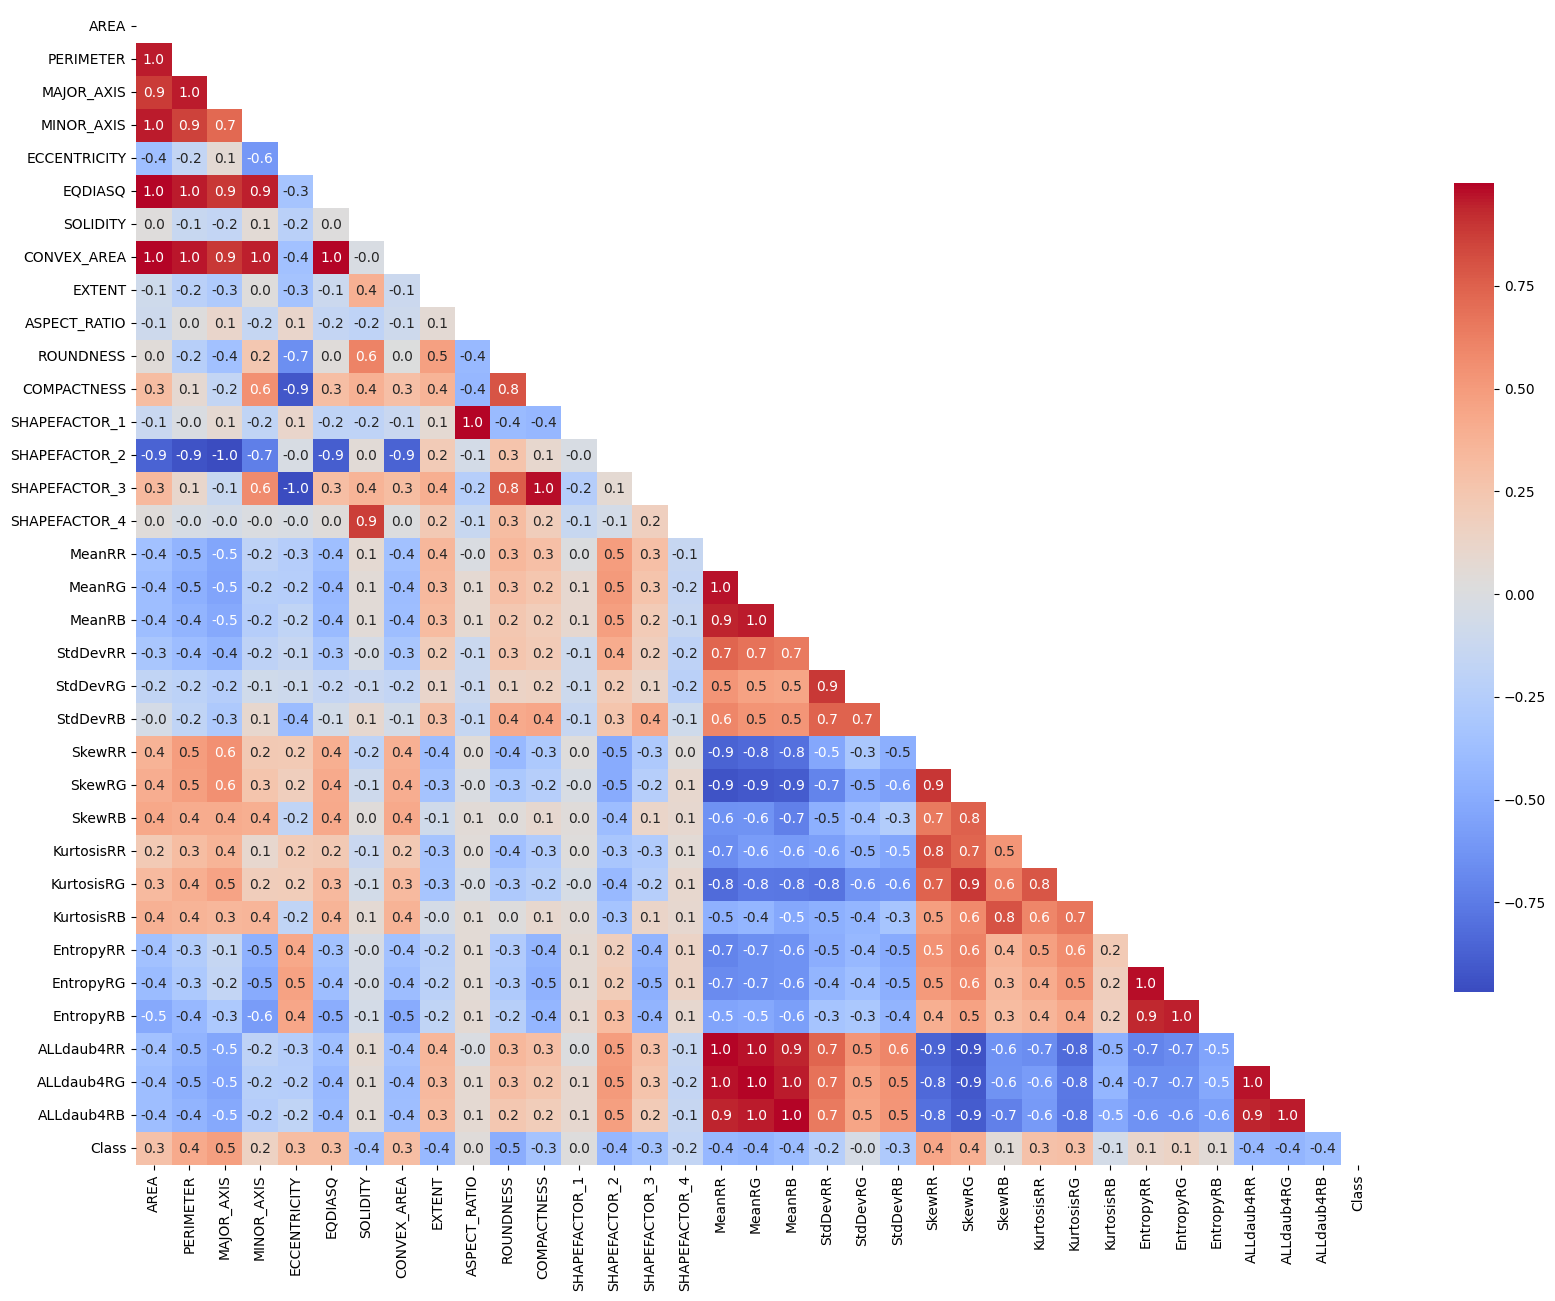

In [11]:
corr=date_fruit.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20, 15))
sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'shrink': .7})

plt.show()

In [12]:
date_fruit.describe().T

count          mean           std           min           25%  \
AREA           898.0  2.982952e+05  1.072452e+05  1.987000e+03  2.069480e+05   
PERIMETER      898.0  2.057661e+03  4.100125e+02  9.118280e+02  1.726091e+03   
MAJOR_AXIS     898.0  7.508120e+02  1.440593e+02  3.367227e+02  6.410686e+02   
MINOR_AXIS     898.0  4.958728e+02  1.142689e+02  2.283200e+00  4.046844e+02   
ECCENTRICITY   898.0  7.374678e-01  8.872739e-02  3.448000e-01  6.856250e-01   
EQDIASQ        898.0  6.045779e+02  1.195939e+02  5.029840e+01  5.133171e+02   
SOLIDITY       898.0  9.818403e-01  1.815742e-02  8.366000e-01  9.788250e-01   
CONVEX_AREA    898.0  3.038456e+05  1.088157e+05  2.257000e+03  2.100228e+05   
EXTENT         898.0  7.362671e-01  5.374518e-02  5.123000e-01  7.058750e-01   
ASPECT_RATIO   898.0  2.131102e+00  1.782078e+01  1.065300e+00  1.373725e+00   
ROUNDNESS      898.0  8.577200e-01  7.083882e-02  4.800000e-03  8.277500e-01   
COMPACTNESS    898.0  8.071903e-01  6.217535e-02  4.110000e-02  7.680500e-01   
SHAPEFACTOR_1  898.0  3.428396e-03  2.045601e-02  1.700000e-03  2.200000e-03   
SHAPEFACTOR_2  898.0  1.794432e-03  4.279168e-04  1.100000e-03  1.500000e-03   
SHAPEFACTOR_3  898.0  6.554197e-01  9.431447e-02  1.700000e-03  5.899750e-01   
SHAPEFACTOR_4  898.0  9.886796e-01  2.047314e-02  7.568000e-01  9.893000e-01   
MeanRR         898.0  1.001659e+02  3.212655e+01  3.038260e+01  7.644800e+01   
MeanRG         898.0  9.760940e+01  2.825180e+01  4.104800e+01  7.730613e+01   
MeanRB         898.0  9.619489e+01  2.162741e+01  4.425690e+01  7.850238e+01   
StdDevRR       898.0  2.904744e+01  6.306931e+00  7.303800e+00  2.490152e+01   
StdDevRG       898.0  2.638336e+01  5.462164e+00  8.655700e+00  2.228965e+01   
StdDevRB       898.0  2.614833e+01  4.905078e+00  5.148600e+00  2.289098e+01   
SkewRR         898.0  8.926615e-02  9.432854e-01 -1.724200e+00 -5.499000e-01   
SkewRG         898.0  5.641388e-01  1.039813e+00 -1.834400e+00 -2.302000e-01   
SkewRB         898.0  2.505179e-01  6.329178e-01 -1.029100e+00 -1.969500e-01   
KurtosisRR     898.0  4.247845e+00  2.892357e+00  1.708200e+00  2.536625e+00   
KurtosisRG     898.0  5.110894e+00  3.745463e+00  1.607600e+00  2.508850e+00   
KurtosisRB     898.0  3.780928e+00  2.049831e+00  1.767200e+00  2.577275e+00   
EntropyRR      898.0 -3.185021e+10  2.037241e+10 -1.091224e+11 -4.429444e+10   
EntropyRG      898.0 -2.901860e+10  1.712952e+10 -9.261697e+10 -3.894638e+10   
EntropyRB      898.0 -2.771876e+10  1.484137e+10 -8.747177e+10 -3.564534e+10   
ALLdaub4RR     898.0  5.008289e+01  1.606313e+01  1.519110e+01  3.822442e+01   
ALLdaub4RG     898.0  4.880568e+01  1.412591e+01  2.052470e+01  3.865452e+01   
ALLdaub4RB     898.0  4.809839e+01  1.081386e+01  2.213000e+01  3.925073e+01   
Class          898.0  3.279510e+00  1.803886e+00  0.000000e+00  2.000000e+00   

                        50%           75%           max  
AREA           3.198330e+05  3.825730e+05  5.460630e+05  
PERIMETER      2.196345e+03  2.389717e+03  2.811997e+03  
MAJOR_AXIS     7.913634e+02  8.586338e+02  1.222723e+03  
MINOR_AXIS     4.950548e+02  5.890317e+02  7.664536e+02  
ECCENTRICITY   7.547000e-01  8.021500e-01  1.000000e+00  
EQDIASQ        6.381409e+02  6.979305e+02  8.338279e+02  
SOLIDITY       9.873000e-01  9.918000e-01  9.974000e-01  
CONVEX_AREA    3.272070e+05  3.888040e+05  5.525980e+05  
EXTENT         7.469500e-01  7.758500e-01  8.562000e-01  
ASPECT_RATIO   1.524150e+00  1.674750e+00  5.355257e+02  
ROUNDNESS      8.677500e-01  8.995000e-01  9.773000e-01  
COMPACTNESS    8.049500e-01  8.488750e-01  9.681000e-01  
SHAPEFACTOR_1  2.600000e-03  3.200000e-03  6.154000e-01  
SHAPEFACTOR_2  1.600000e-03  2.075000e-03  4.300000e-03  
SHAPEFACTOR_3  6.479500e-01  7.206250e-01  9.373000e-01  
SHAPEFACTOR_4  9.936000e-01  9.964000e-01  9.995000e-01  
MeanRR         1.076825e+02  1.261275e+02  1.596494e+02  
MeanRG         1.006760e+02  1.191596e+02  1.661354e+02  
MeanRB         9.922560e+01  1.1

Area:-Accoridng to this description area has wide range 1987 to 5460630 ,this indicate standrad deviation is high.

In [13]:
mean_area = date_fruit['AREA'].mean()
median_area = date_fruit['AREA'].median()

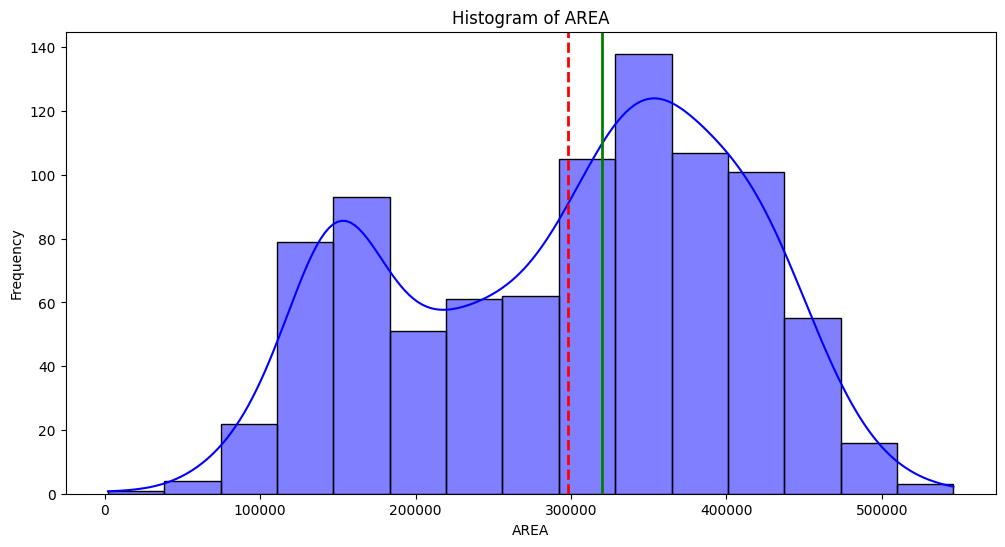

In [14]:

plt.figure(figsize=(12, 6))
sns.histplot(date_fruit['AREA'], kde=True, color='blue')
plt.title('Histogram of AREA')
plt.xlabel('AREA')
plt.ylabel('Frequency')
plt.axvline(mean_area, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_area:.2f}')
plt.axvline(median_area, color='g', linestyle='-', linewidth=2, label=f'Median: {median_area:.2f}')
plt.show()

Here mean < median so it is left-skewed distribution.


2.Shape Descriptor:-
1.ECCENTRICITY:- Has mean of 0.737, indicating generally elongated shapes.It means it has greater frequency in between 0.7 to 0.8 range

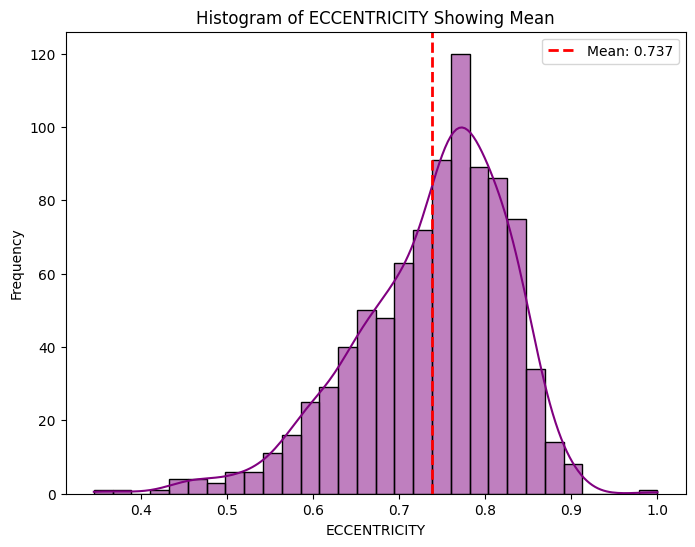

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(date_fruit['ECCENTRICITY'], kde=True, color='purple', bins=30)
plt.title('Histogram of ECCENTRICITY Showing Mean')
plt.xlabel('ECCENTRICITY')
plt.ylabel('Frequency')
mean_eccentricity = date_fruit['ECCENTRICITY'].mean()
plt.axvline(mean_eccentricity, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_eccentricity:.3f}')

plt.legend()

plt.show()

2.Shape Descriptor:-
2.ASPECT RATIO:- high maximum value of 535.5257 for the ASPECT_RATIO Feature suggests the presence of outliers or errors in the data. An aspect ratio measures the ratio of an object's width to its height, and such a high value is highly unusual, especially when compared to the values within the 75th percentile, which is only 1.67475.

3.SKewness & Kurtosis

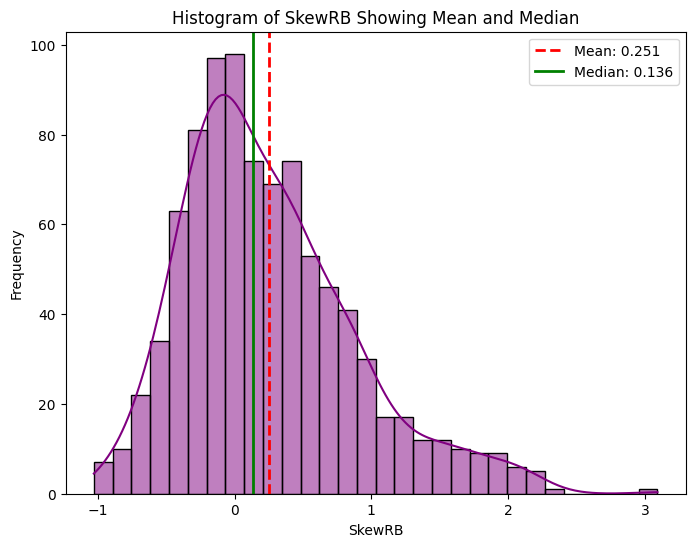

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(date_fruit['SkewRB'], kde=True, color='purple', bins=30)
plt.title('Histogram of SkewRB Showing Mean and Median')
plt.xlabel('SkewRB')
plt.ylabel('Frequency')
mean_skewRB = date_fruit['SkewRB'].mean()
median_skewRB = date_fruit['SkewRB'].median()
plt.axvline(mean_skewRB, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_skewRB:.3f}')
plt.axvline(median_skewRB, color='g', linestyle='-', linewidth=2, label=f'Median: {median_skewRB:.3f}')
plt.legend()

plt.show()

SKewRB is right or positive skewed

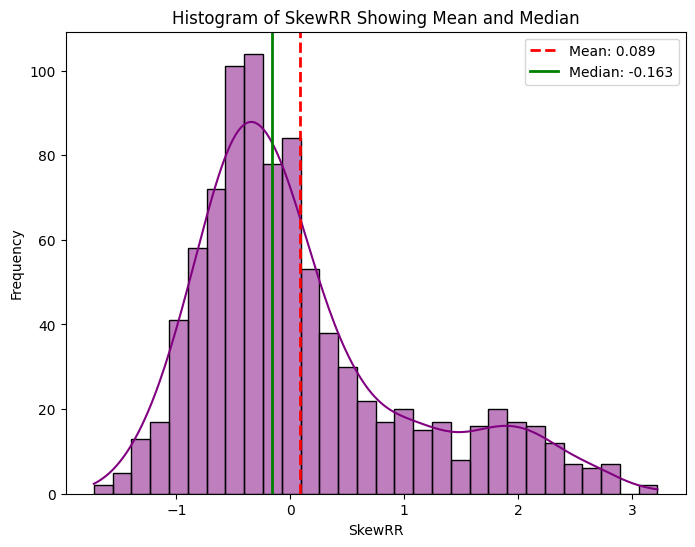

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(date_fruit['SkewRR'], kde=True, color='purple', bins=30)
plt.title('Histogram of SkewRR Showing Mean and Median')
plt.xlabel('SkewRR')
plt.ylabel('Frequency')
mean_skewRR = date_fruit['SkewRR'].mean()
median_skewRR = date_fruit['SkewRR'].median()
plt.axvline(mean_skewRR, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_skewRR:.3f}')
plt.axvline(median_skewRR, color='g', linestyle='-', linewidth=2, label=f'Median: {median_skewRR:.3f}')
plt.legend()

plt.show()

skewrr is also positive skewed

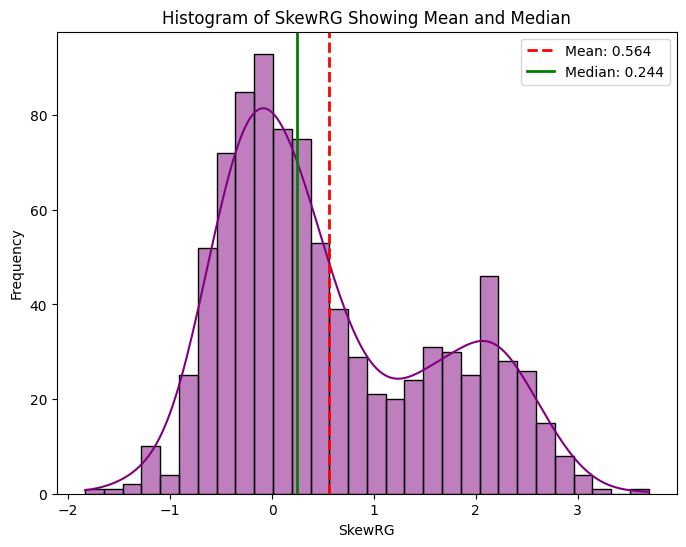

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(date_fruit['SkewRG'], kde=True, color='purple', bins=30)
plt.title('Histogram of SkewRG Showing Mean and Median')
plt.xlabel('SkewRG')
plt.ylabel('Frequency')
mean_skewRG = date_fruit['SkewRG'].mean()
median_skewRG = date_fruit['SkewRG'].median()
plt.axvline(mean_skewRG, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_skewRG:.3f}')
plt.axvline(median_skewRG, color='g', linestyle='-', linewidth=2, label=f'Median: {median_skewRG:.3f}')
plt.legend()

plt.show()

skewRG is too positive skewed

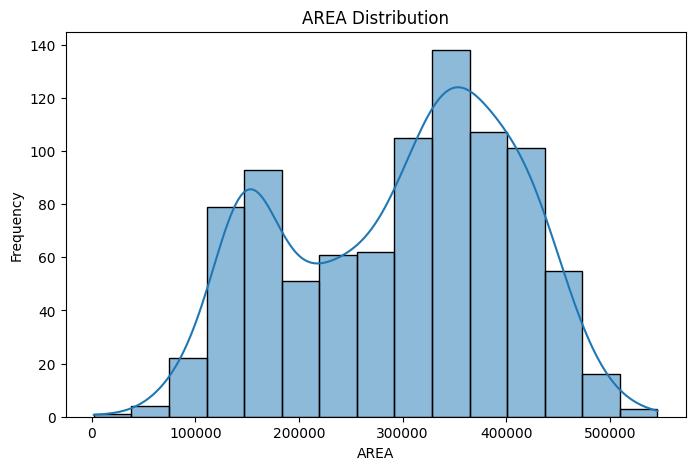

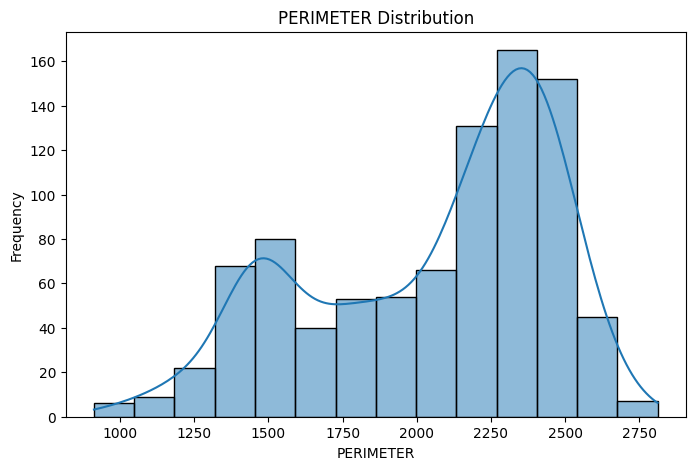

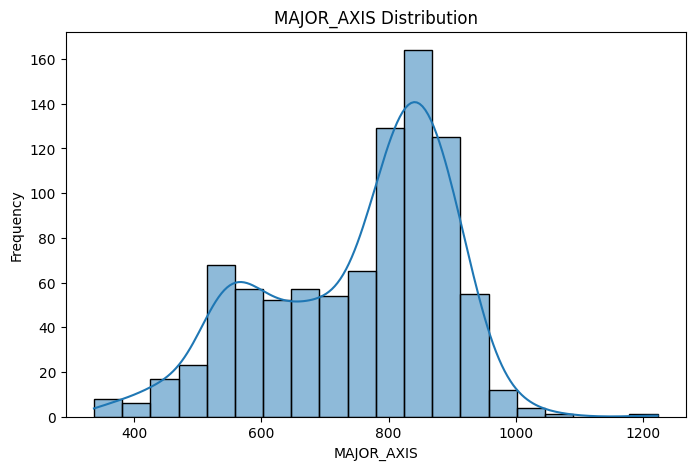

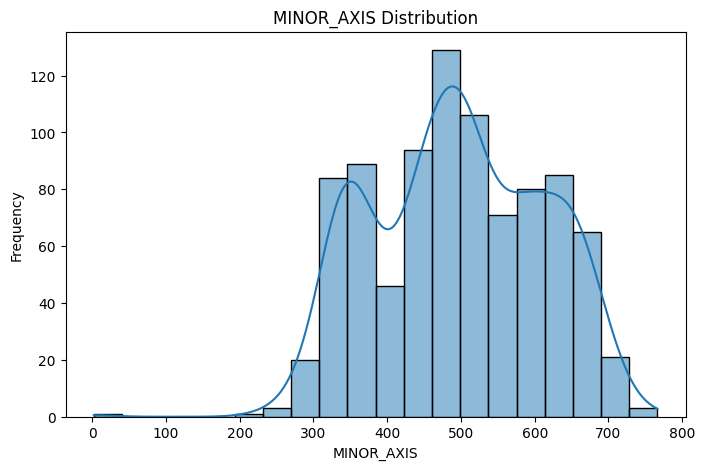

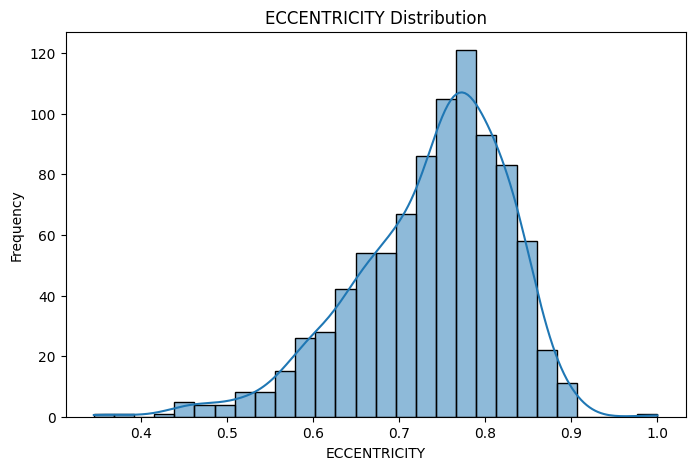

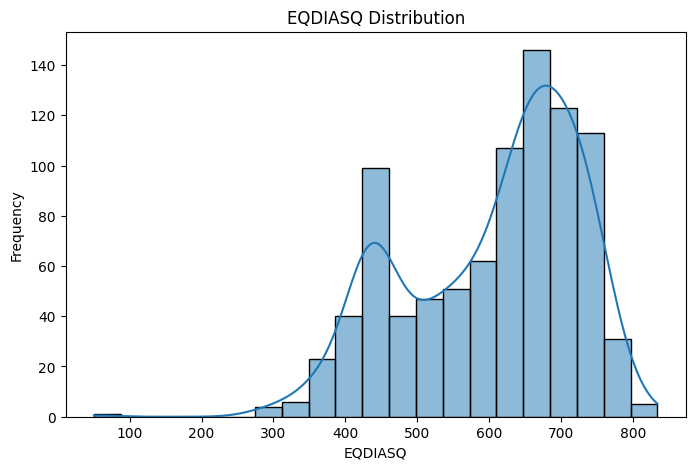

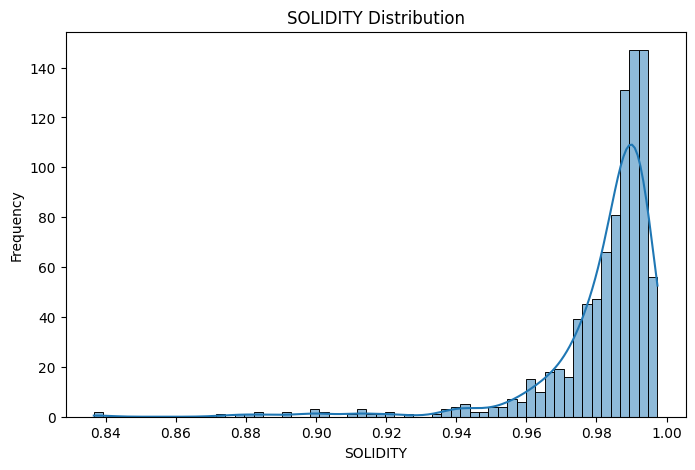

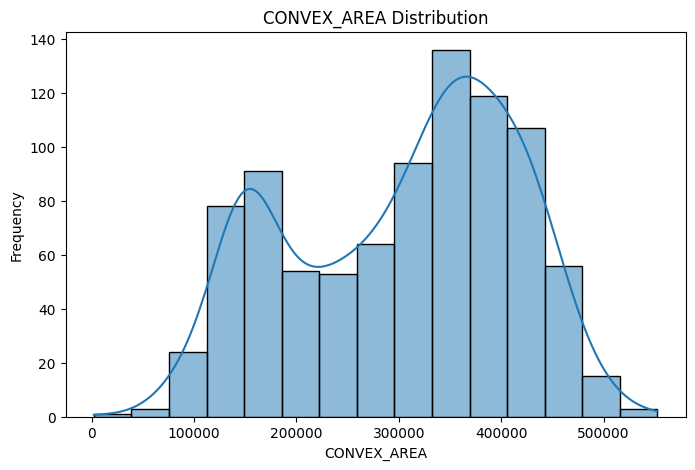

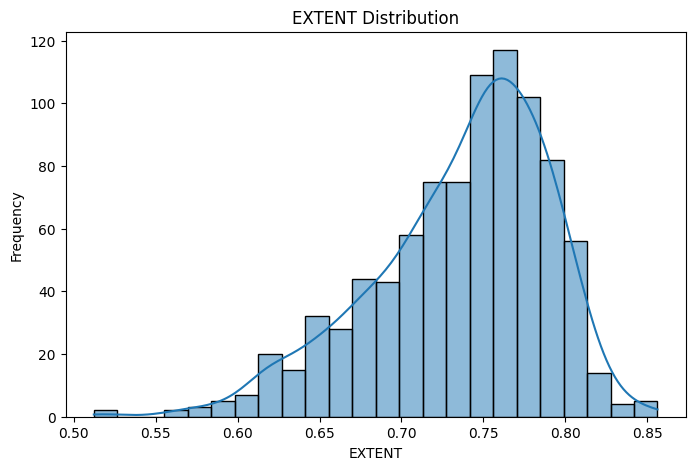

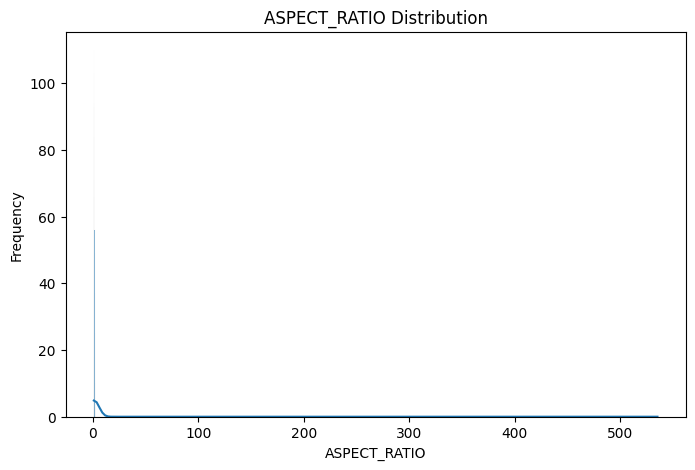

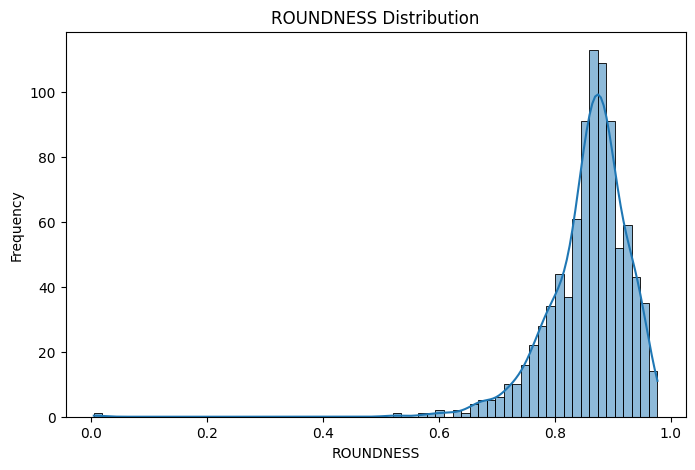

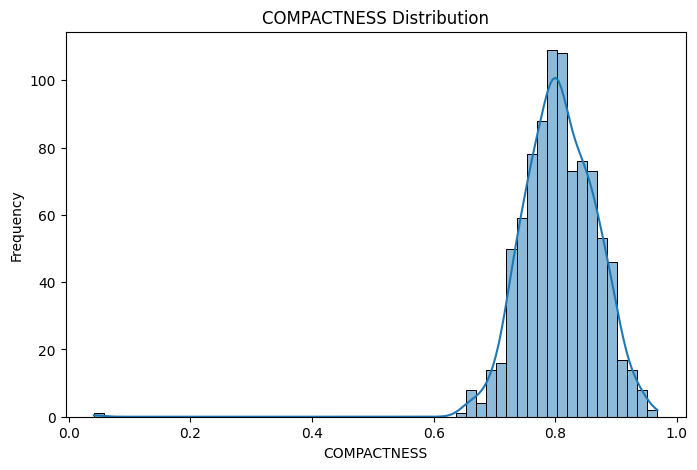

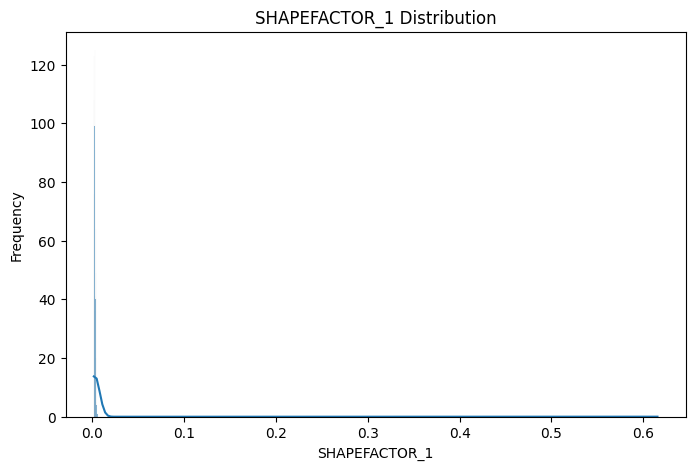

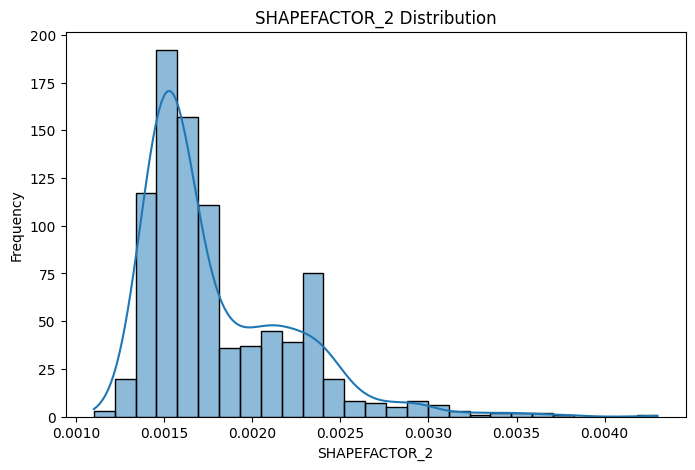

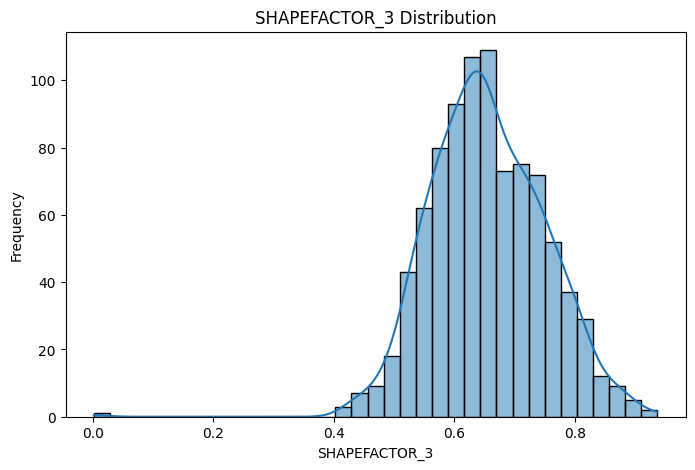

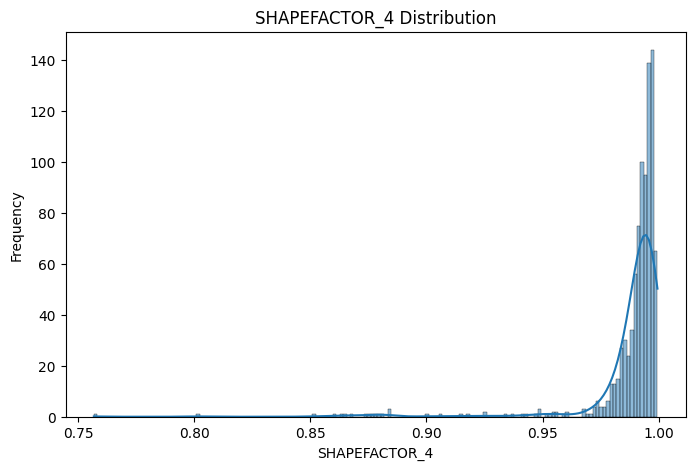

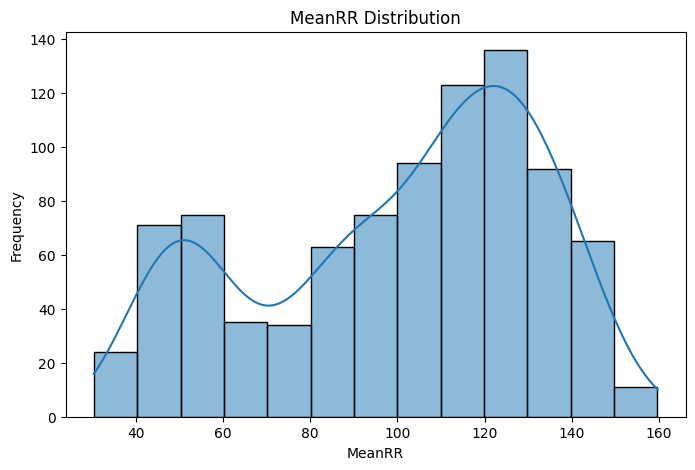

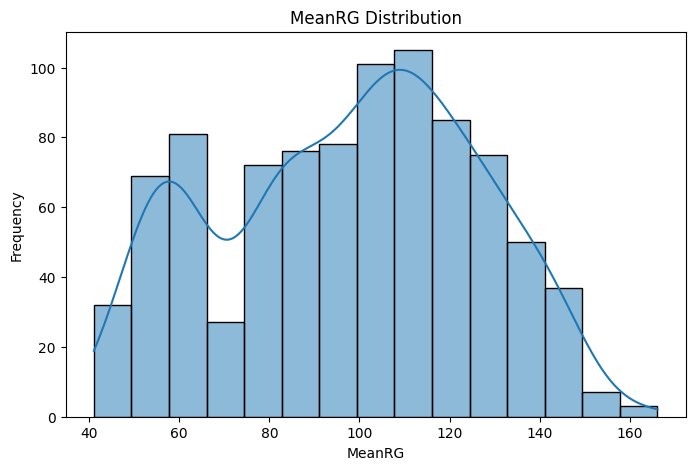

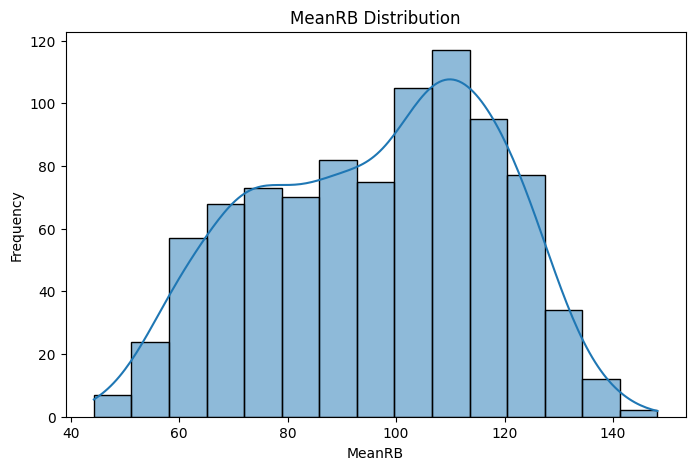

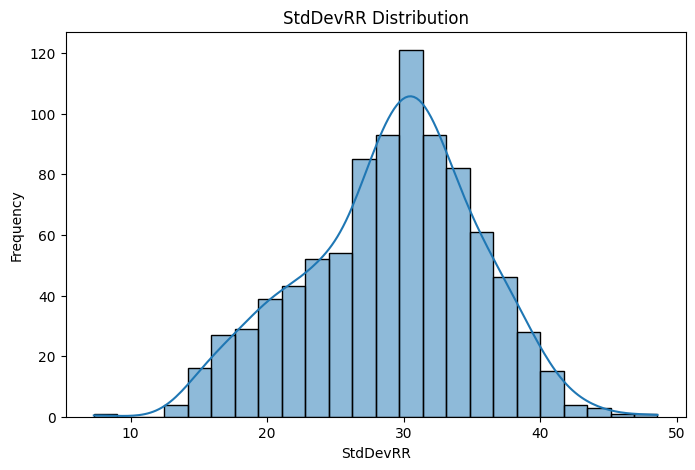

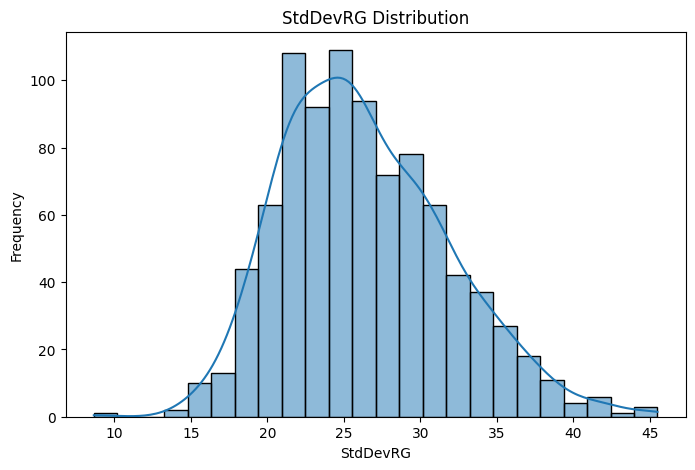

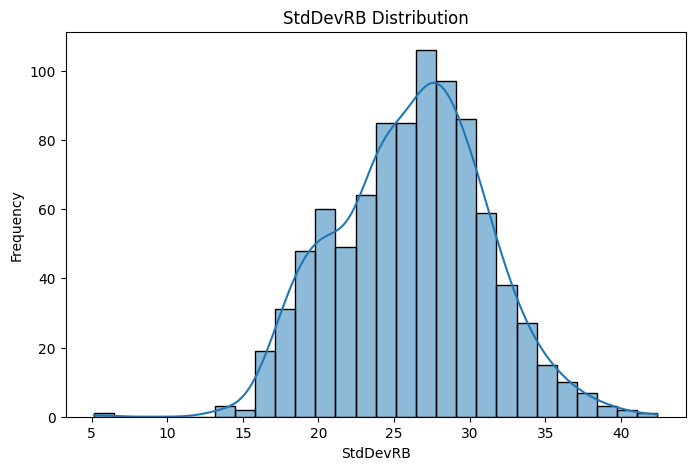

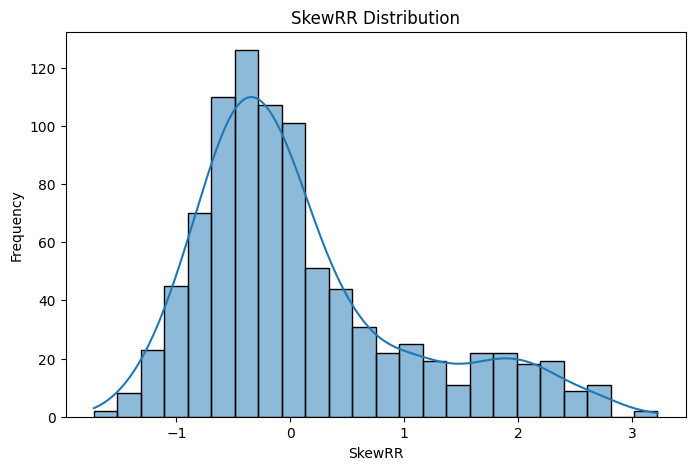

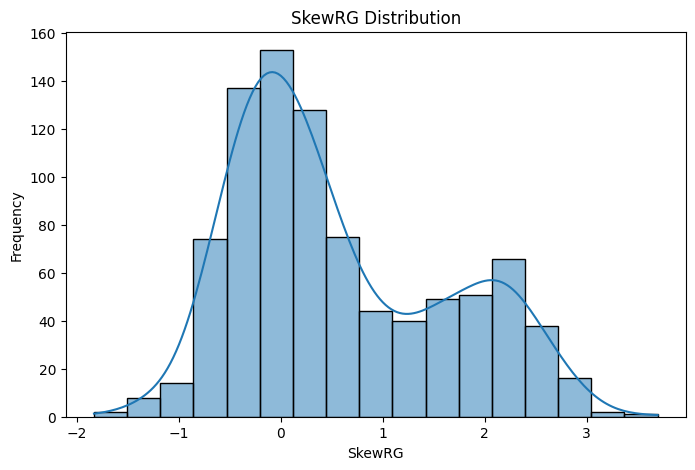

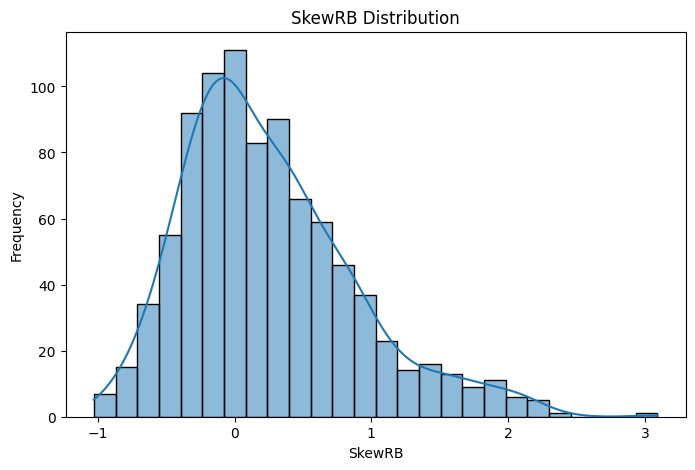

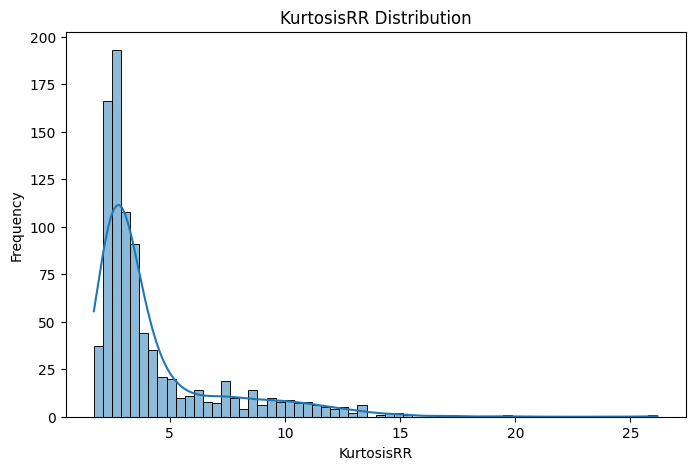

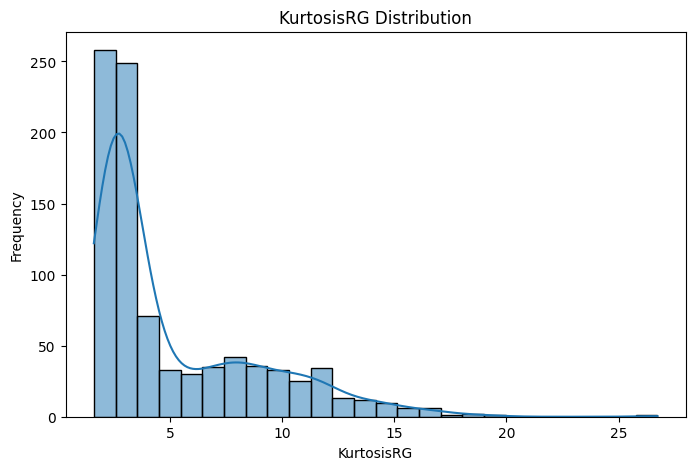

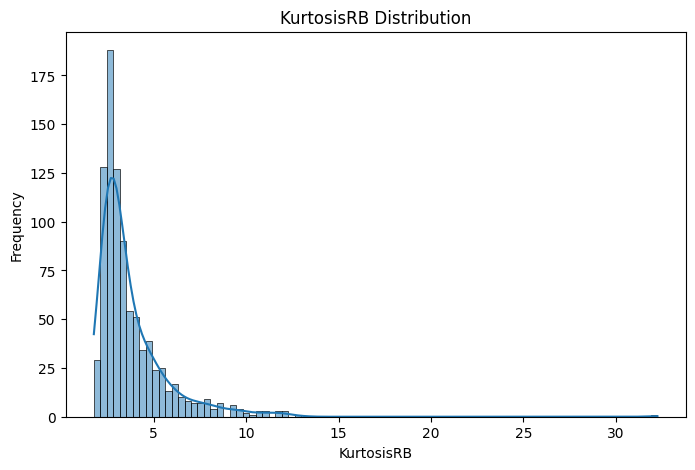

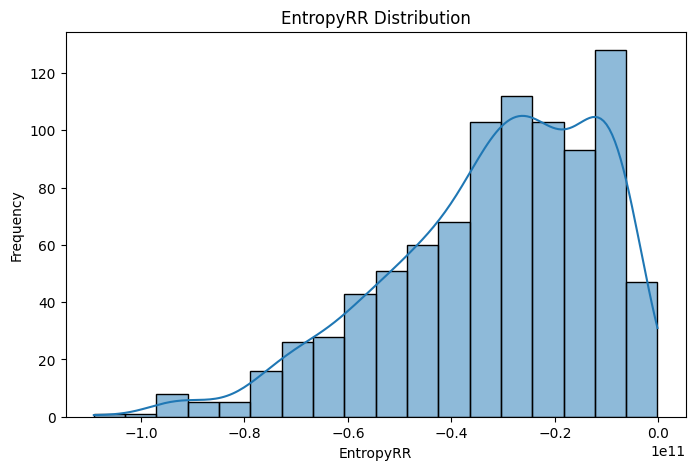

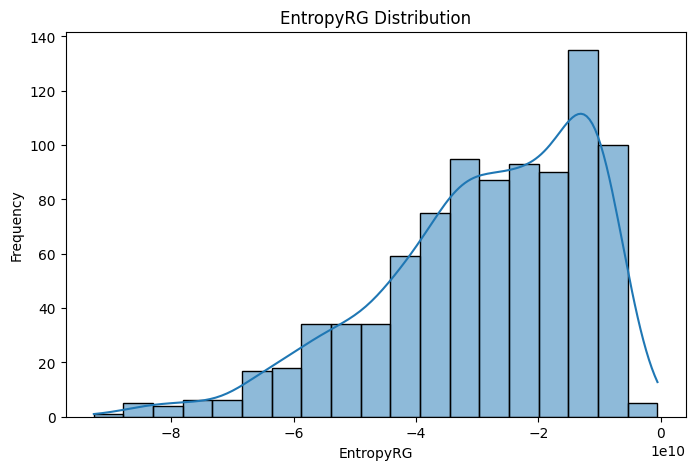

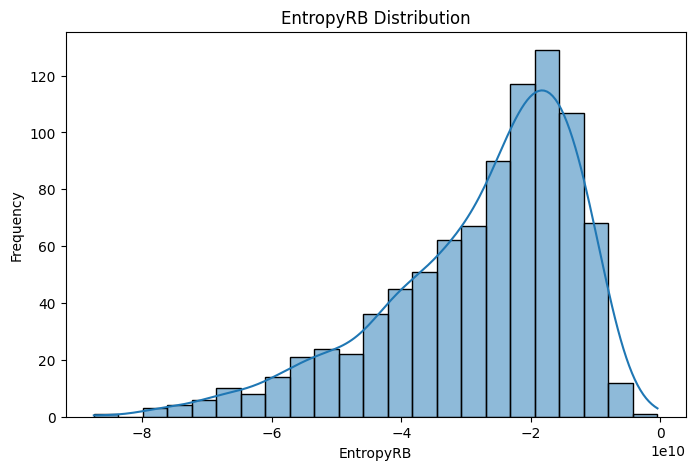

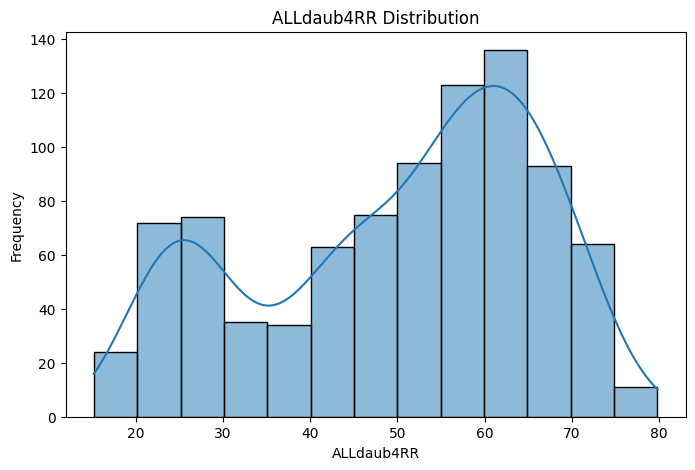

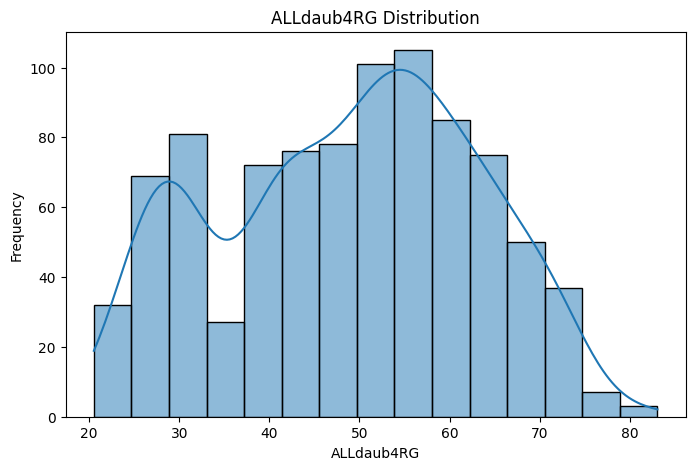

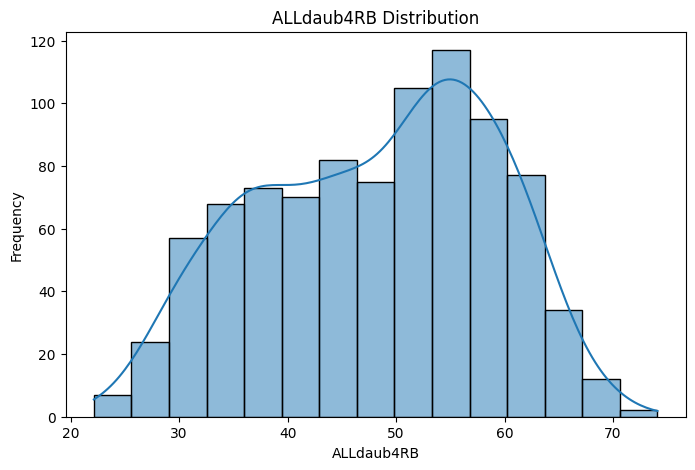

In [19]:
def draw_distribution(feature, column):
    plt.figure(figsize=(8, 5))
    plt.title(f'{column} Distribution')
    sns.histplot(feature, kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
for column in date_fruit.columns[:-1]:
  draw_distribution(date_fruit[column].to_numpy(), column)

IN this dataset none of the value is normly distributed
distributions experience outliers: extreme values on one or both sides.

lets have a look over feature with respect to target

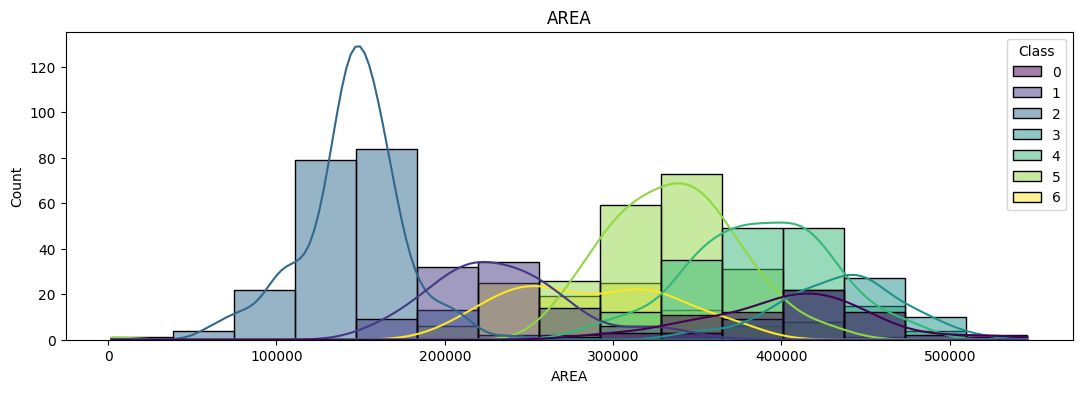

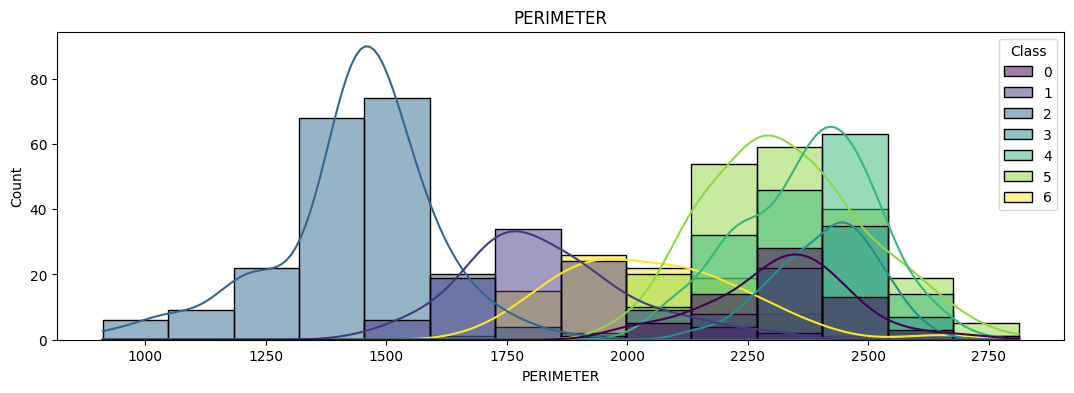

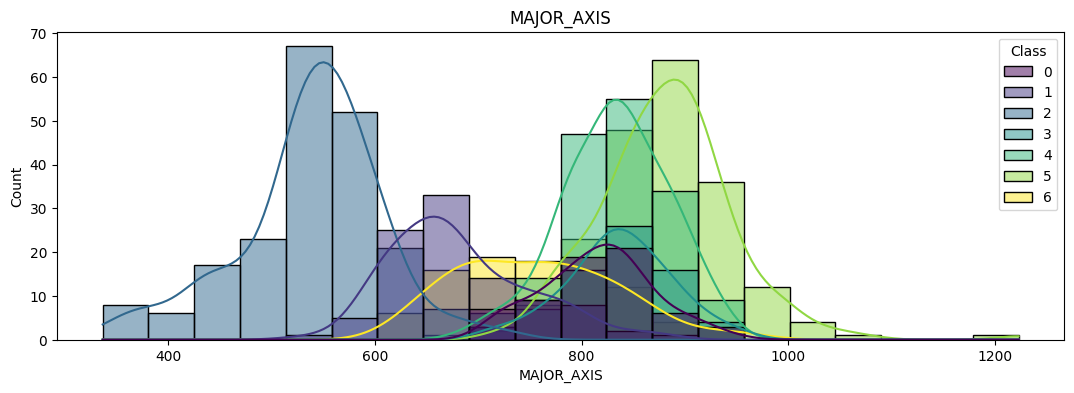

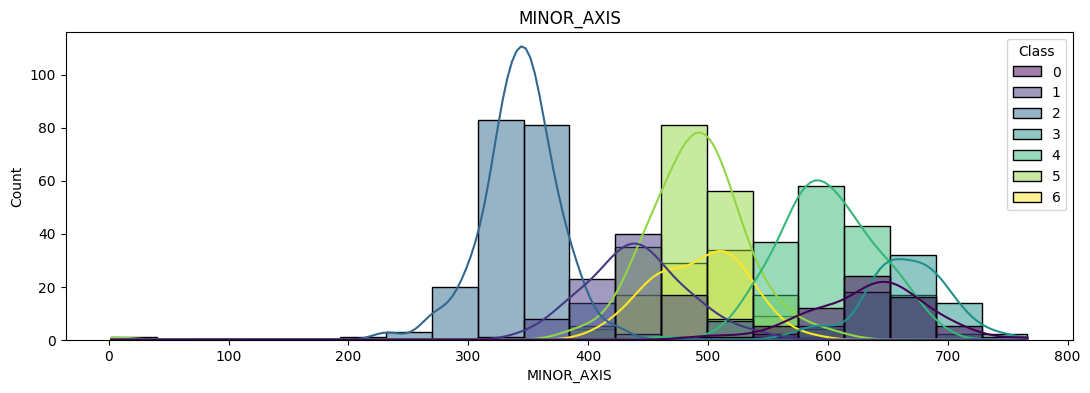

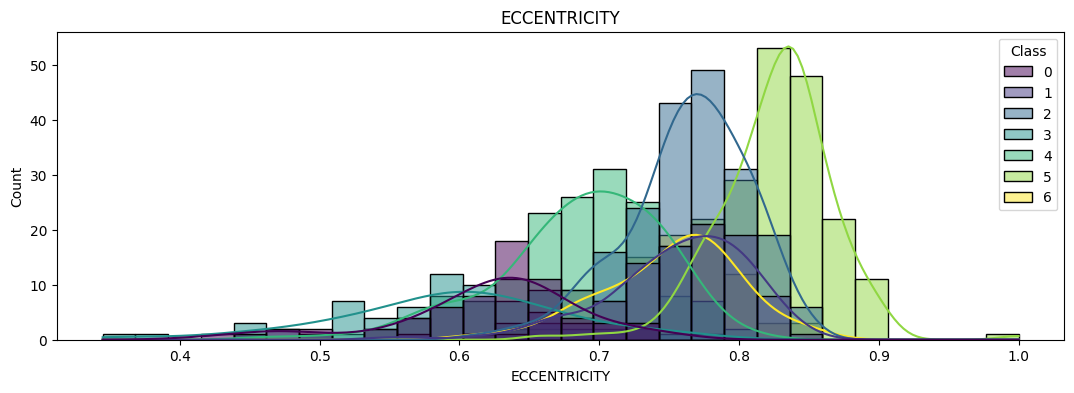

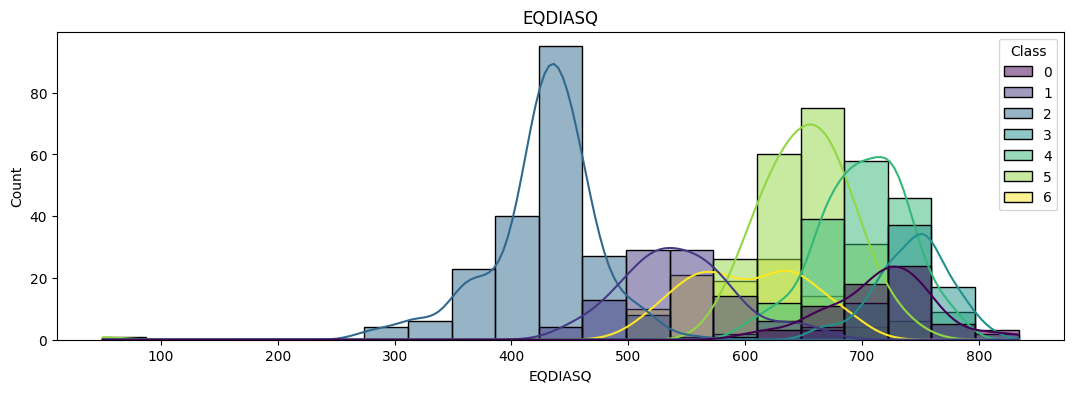

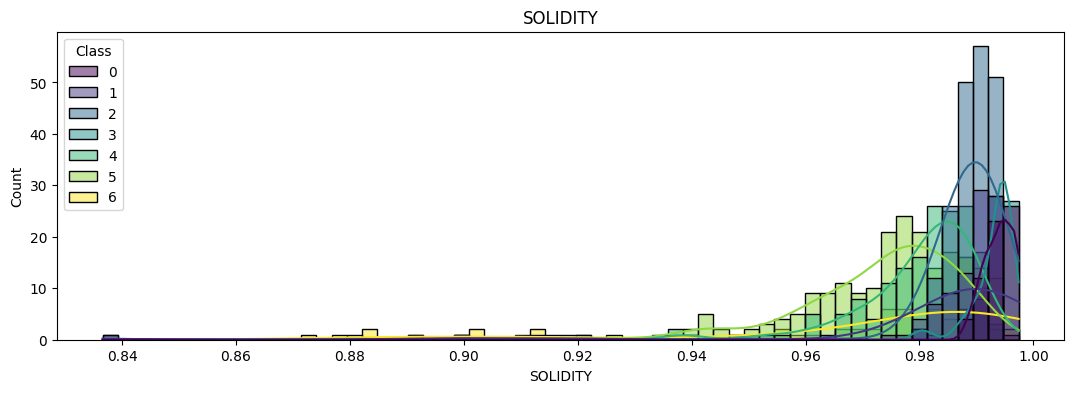

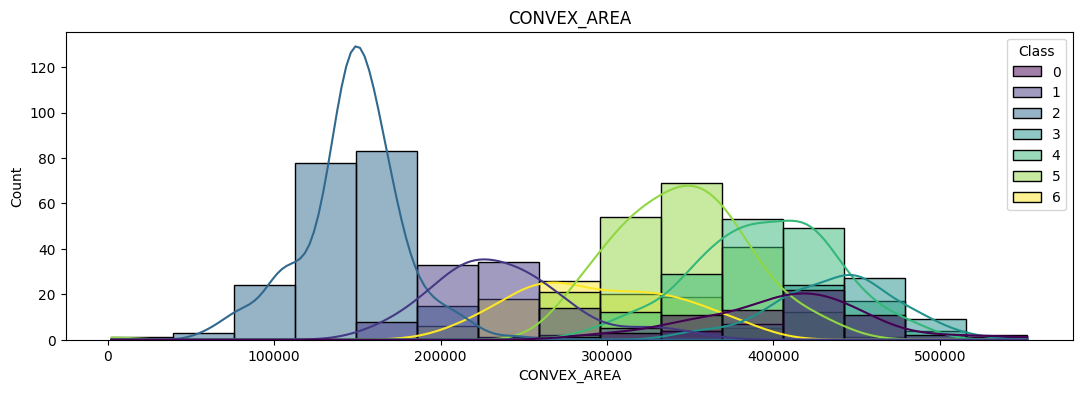

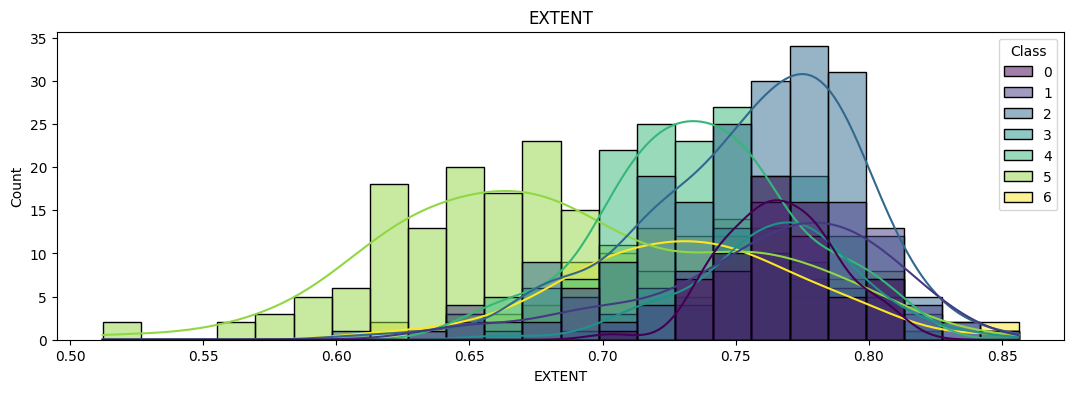

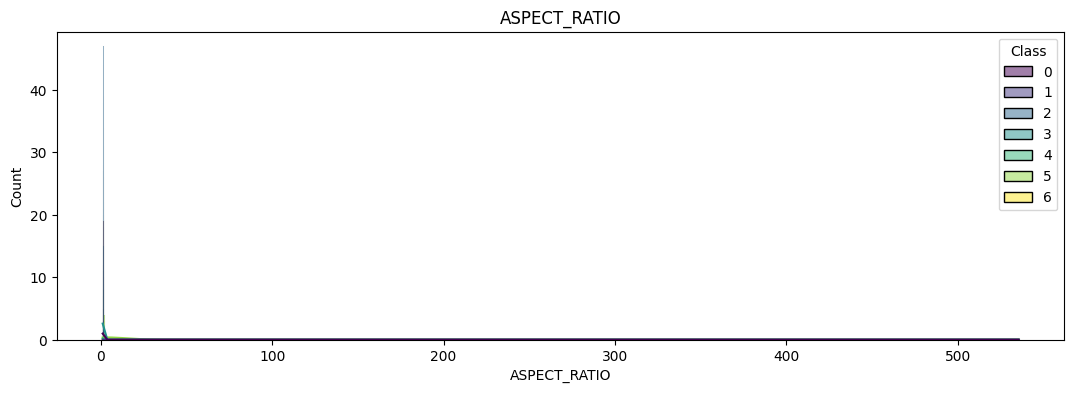

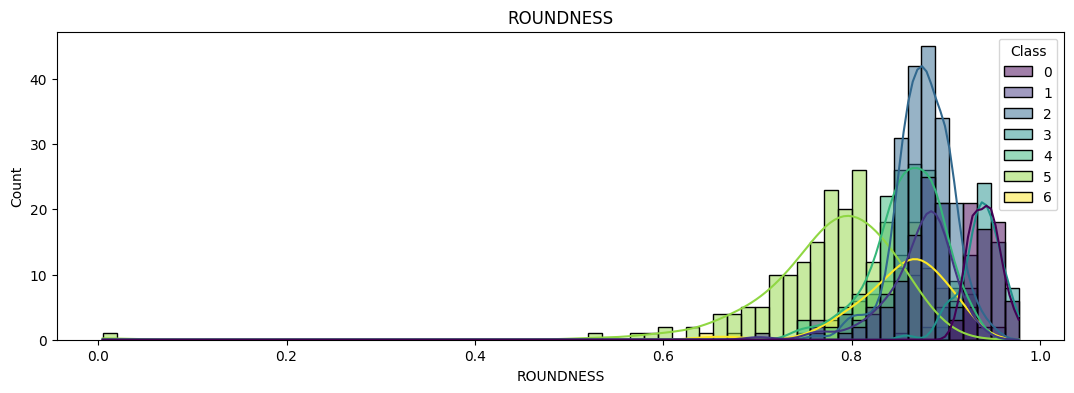

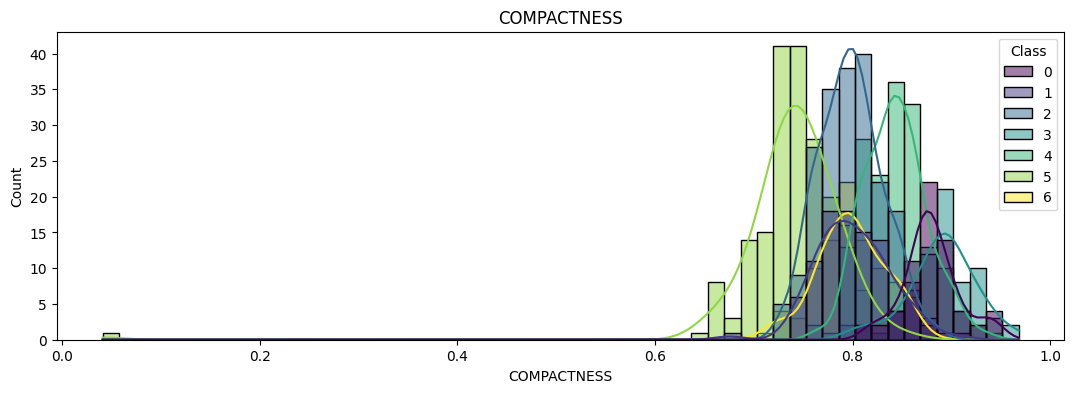

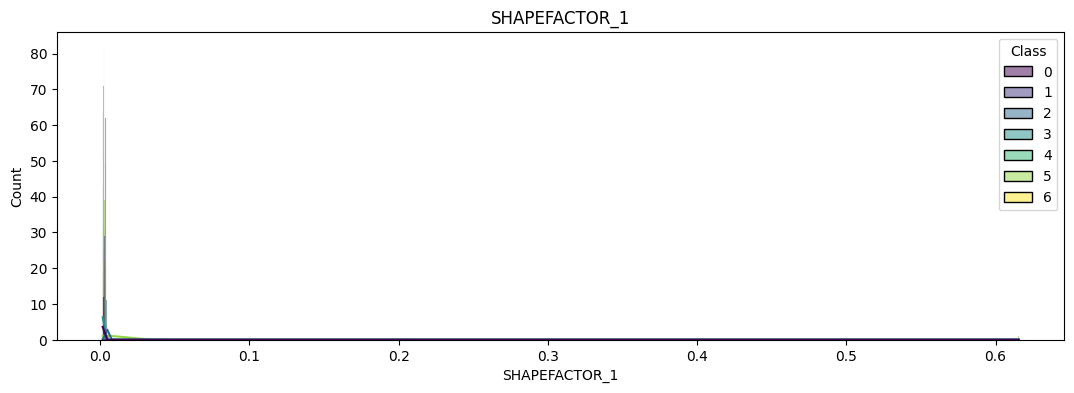

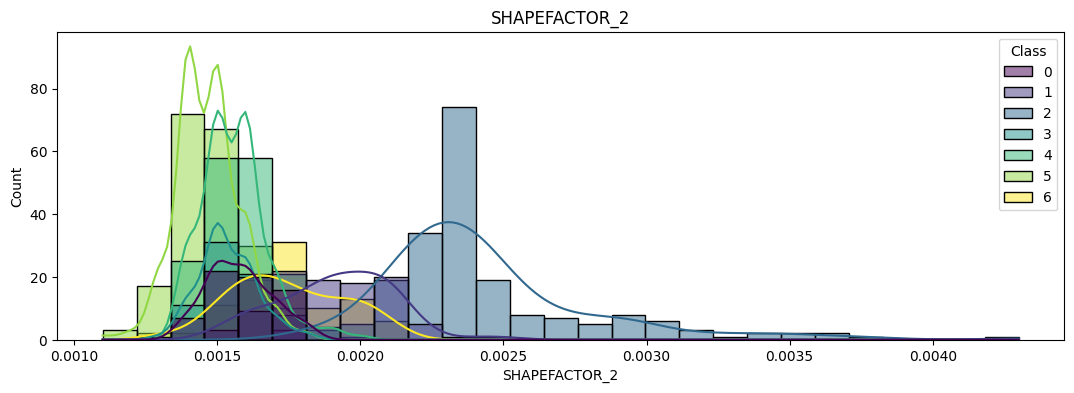

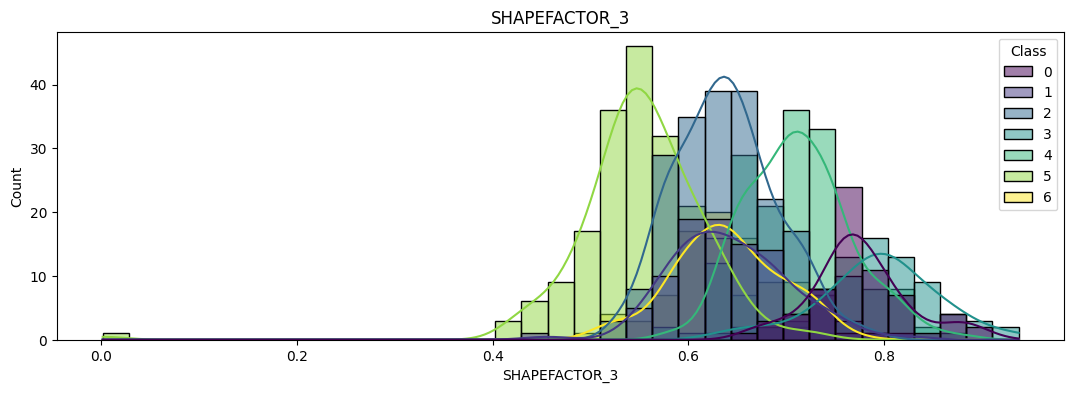

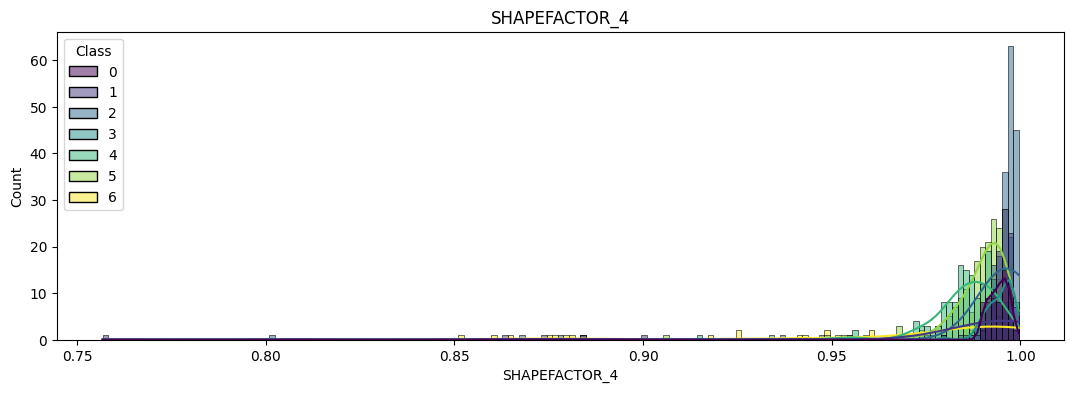

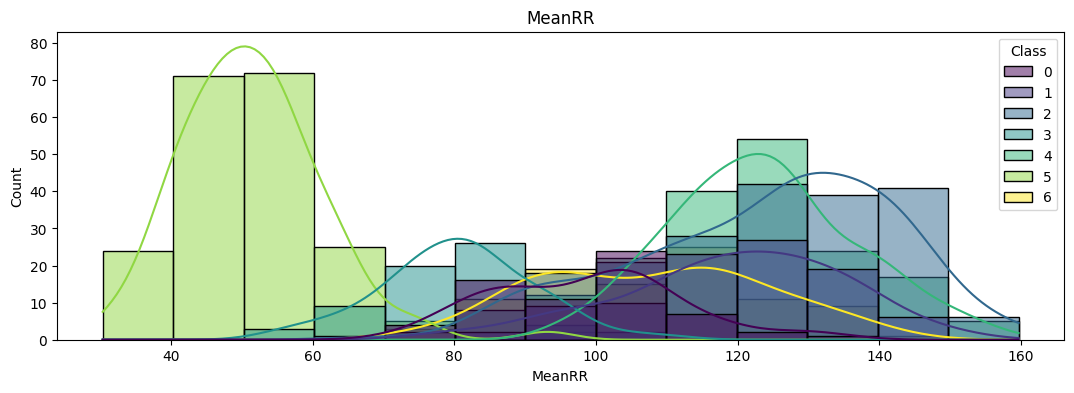

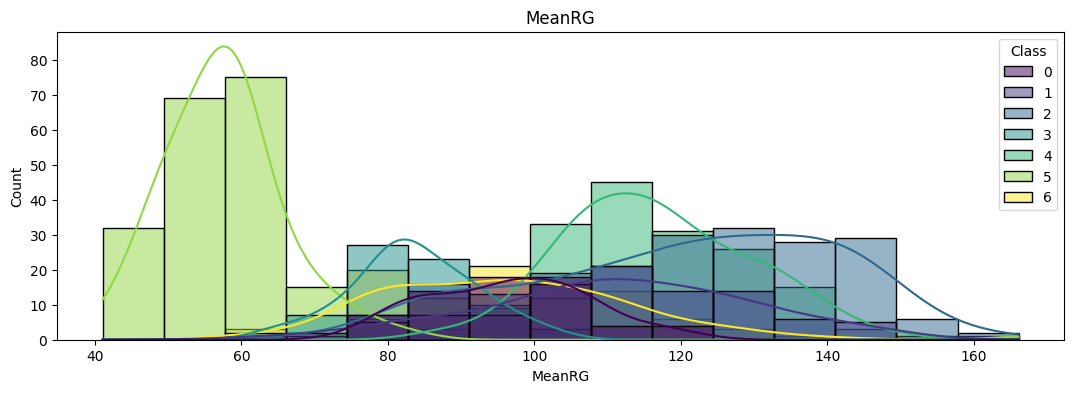

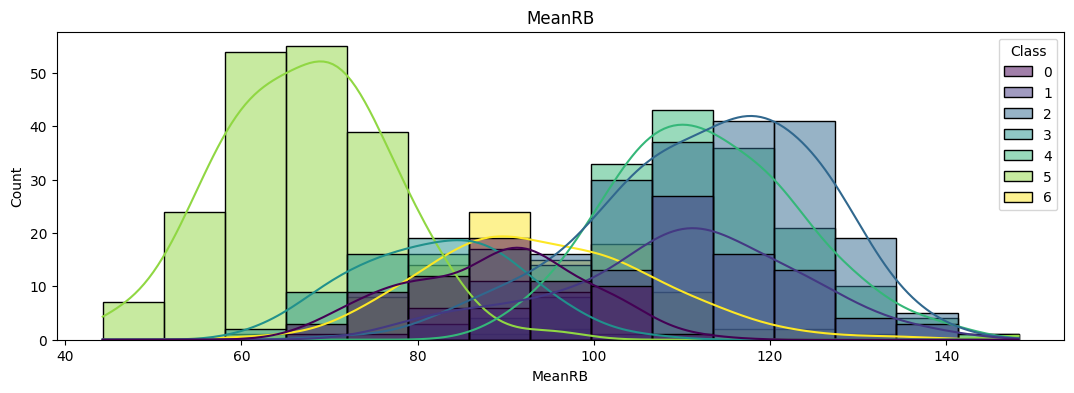

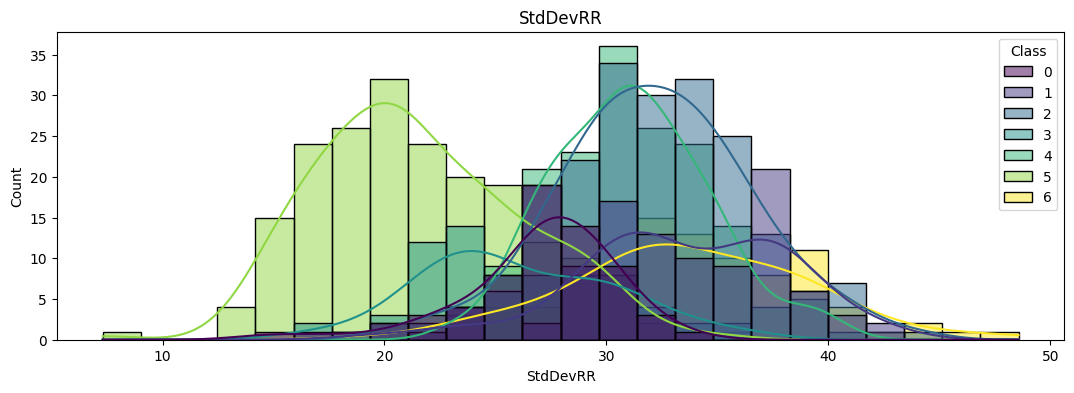

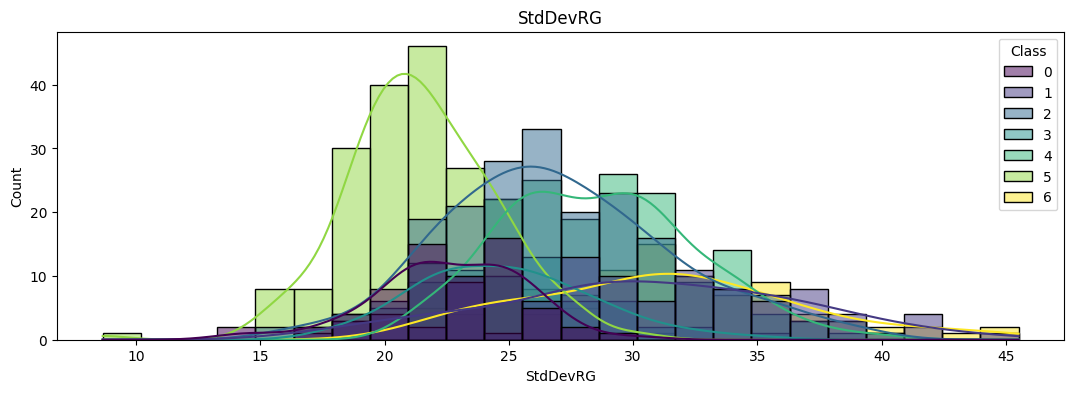

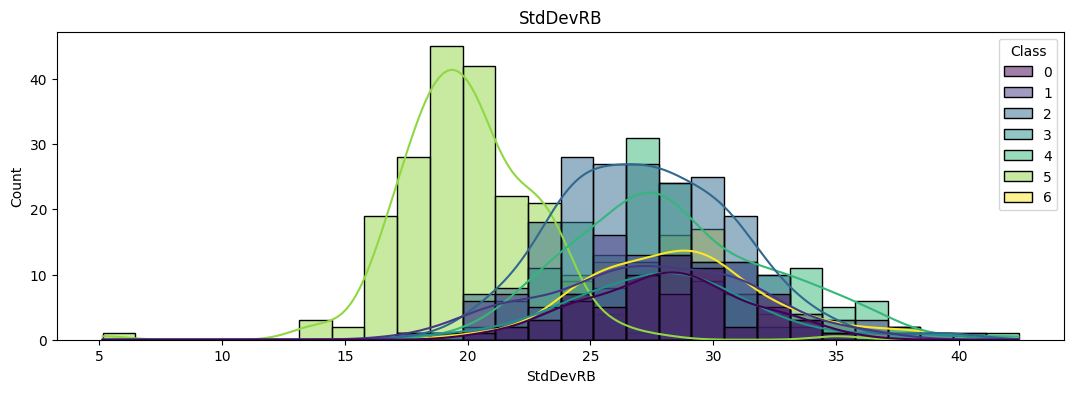

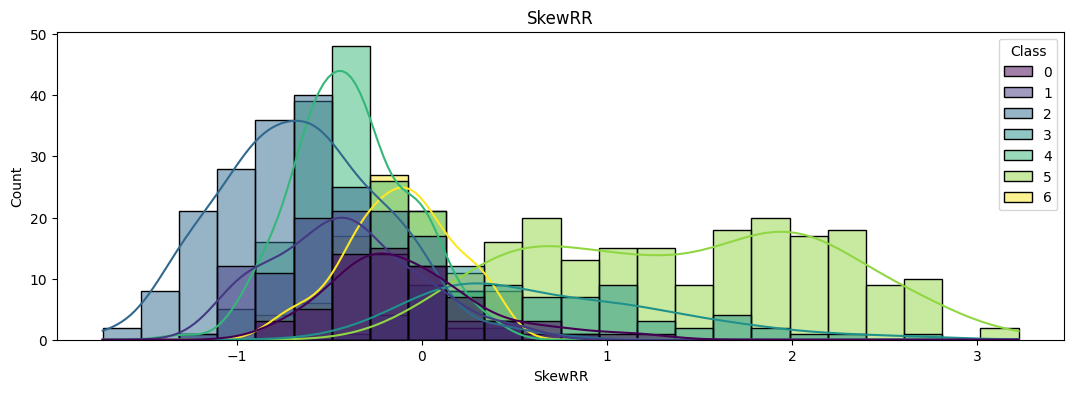

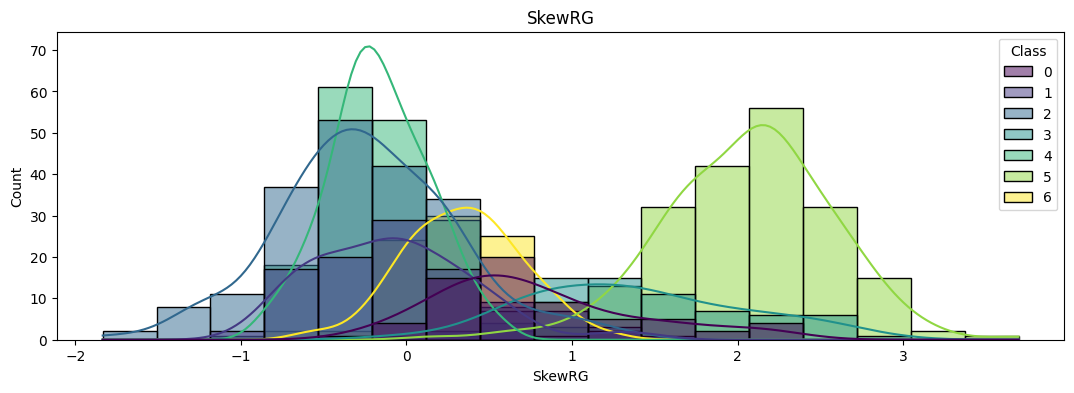

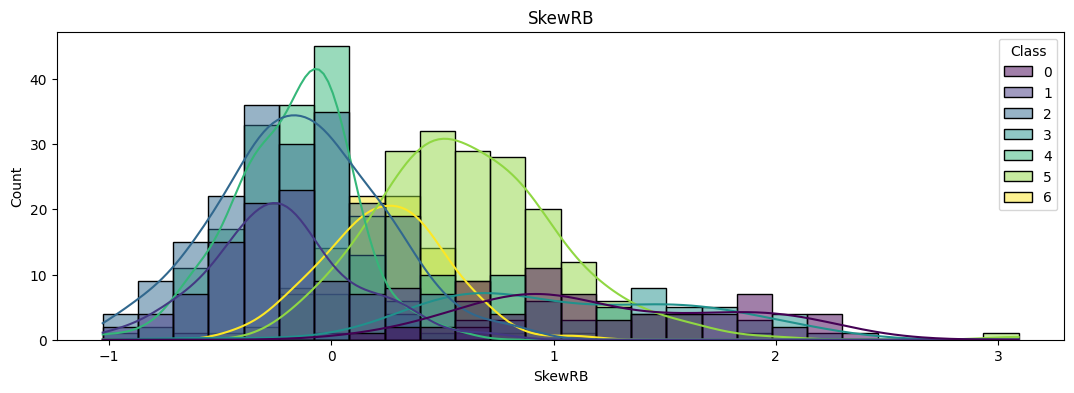

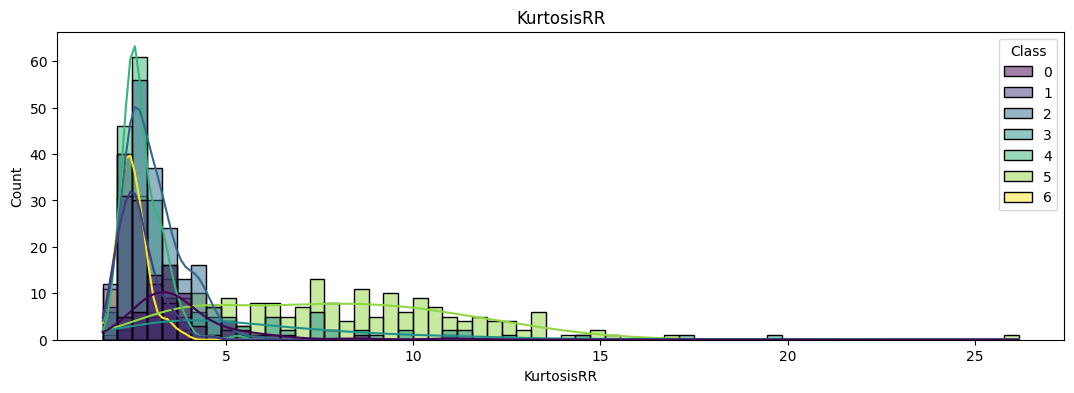

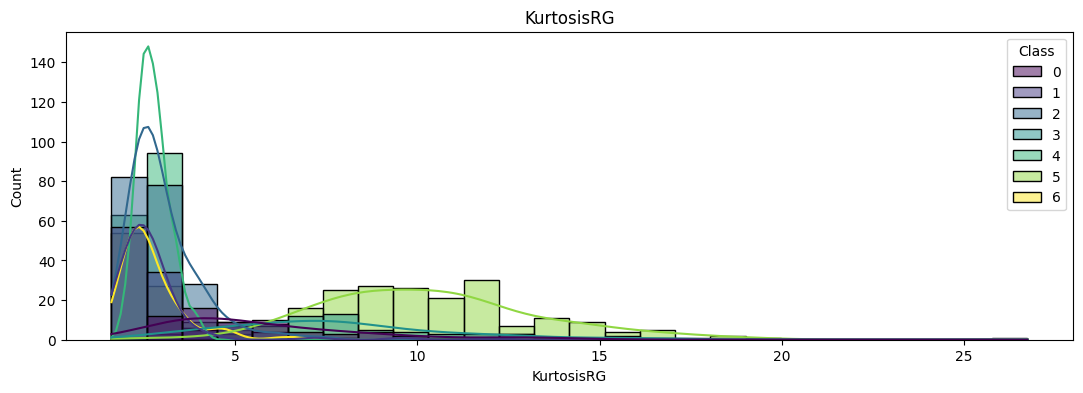

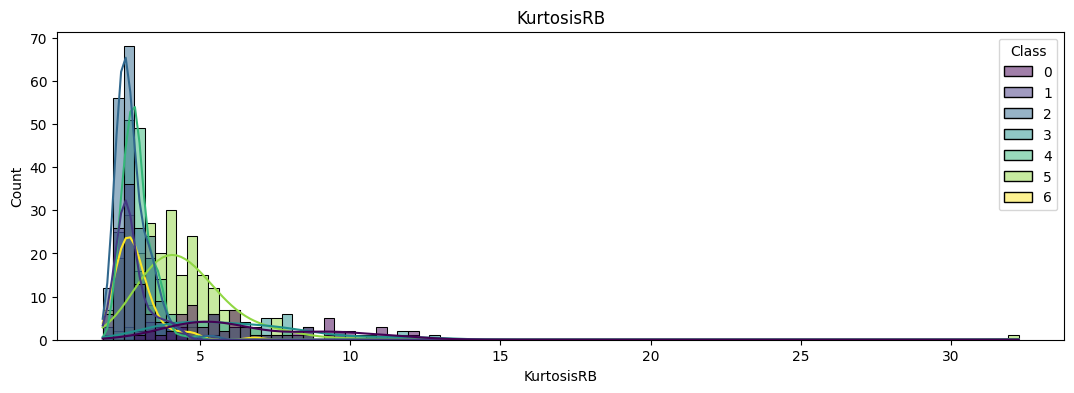

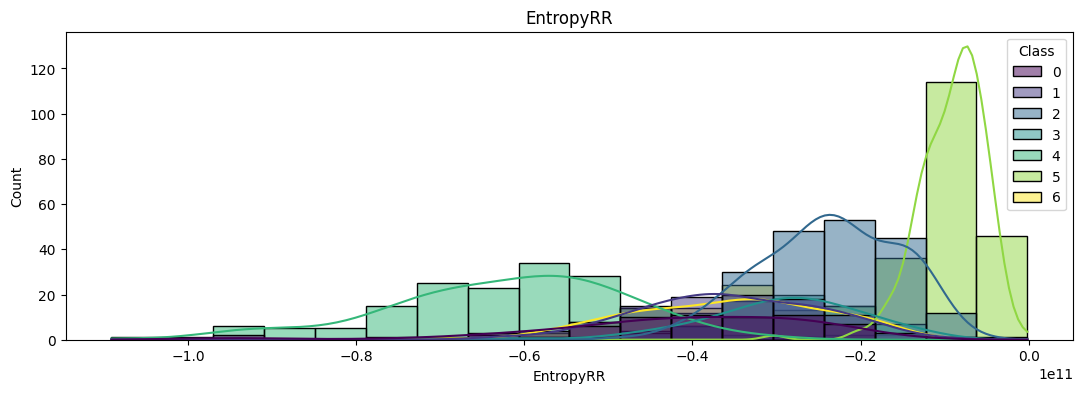

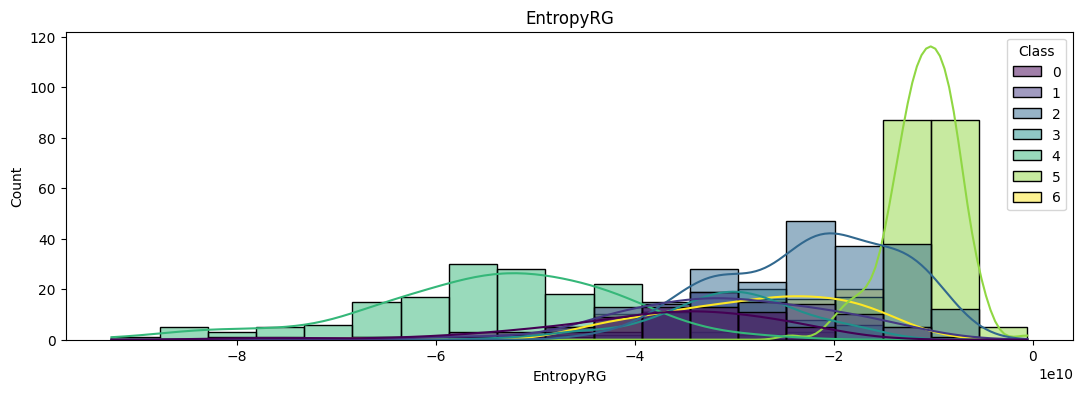

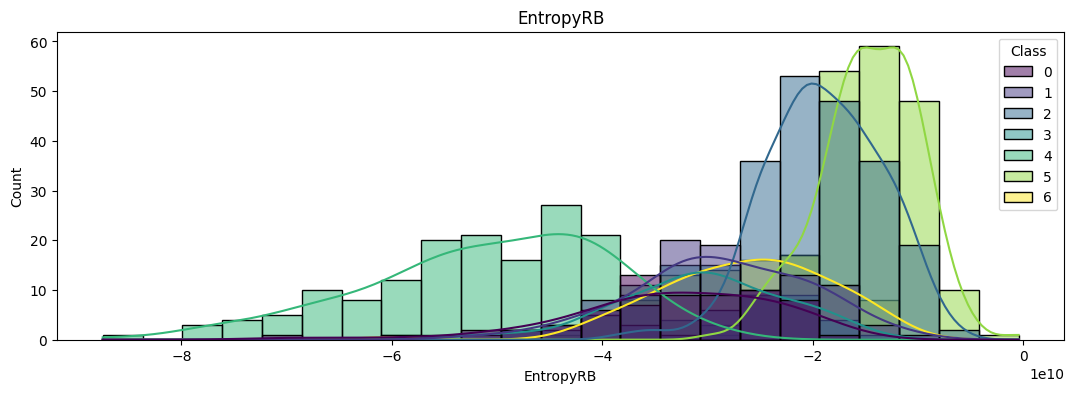

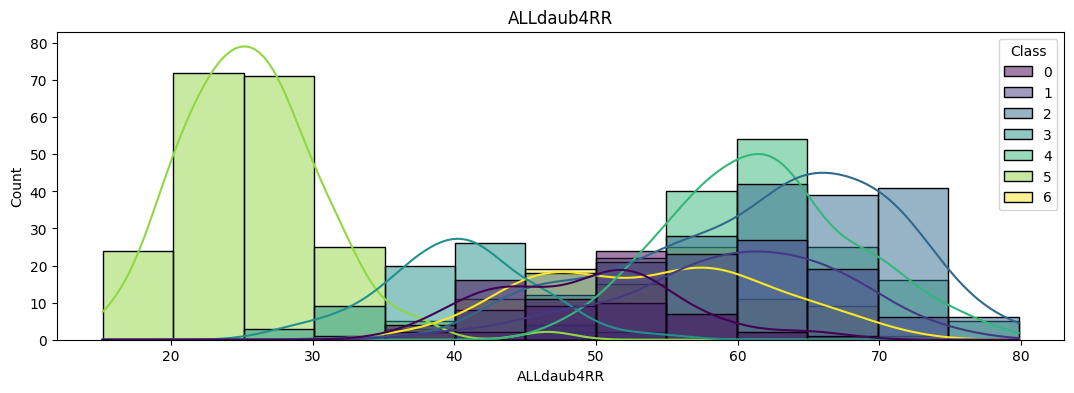

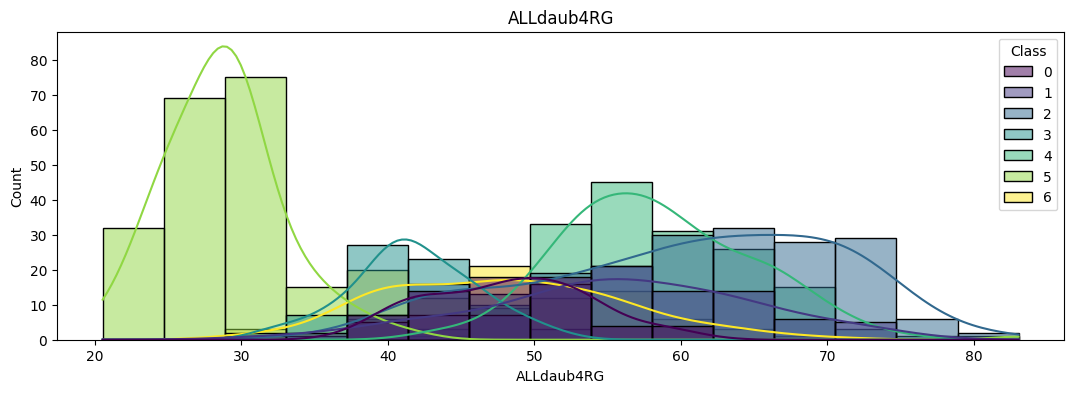

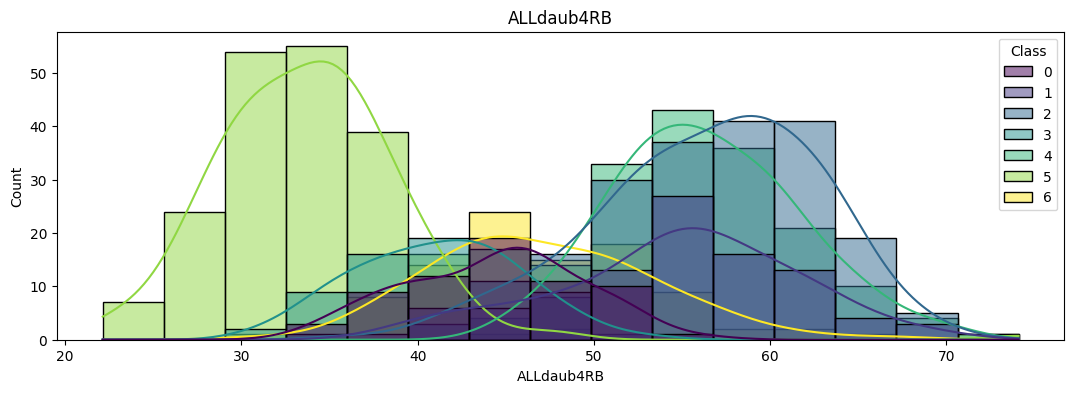

In [20]:
def draw_distributions(features, column):
    plt.figure(figsize=(13, 4))
    plt.title(f'{column}')
    sns.histplot(data=features, x=column, kde=True, hue='Class', palette='viridis')
    plt.show()

for column in date_fruit.columns[:-1]:  
    draw_distributions(date_fruit, column)

1.there is no equal varaince in all tha features
2.some outlier are too far in few features

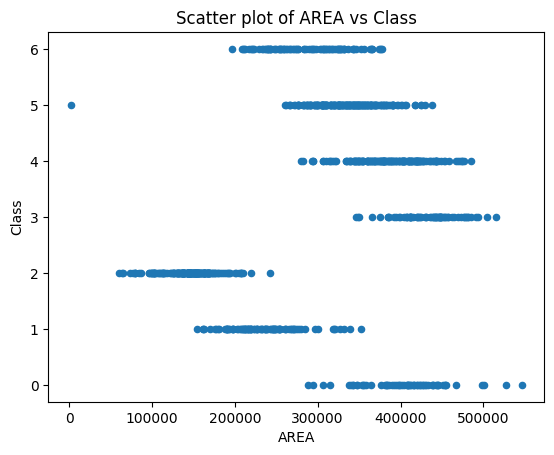

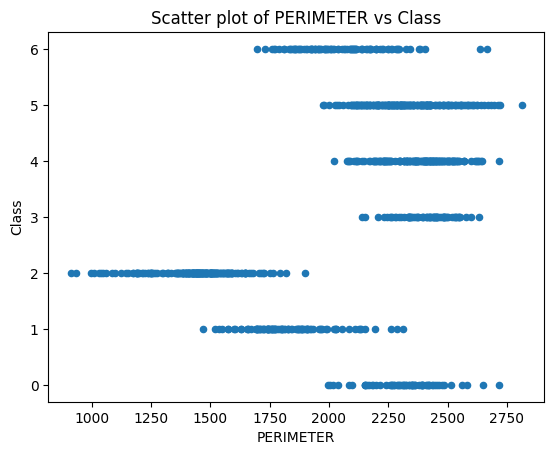

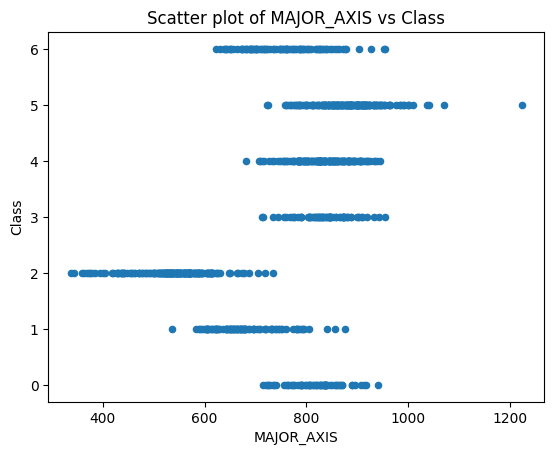

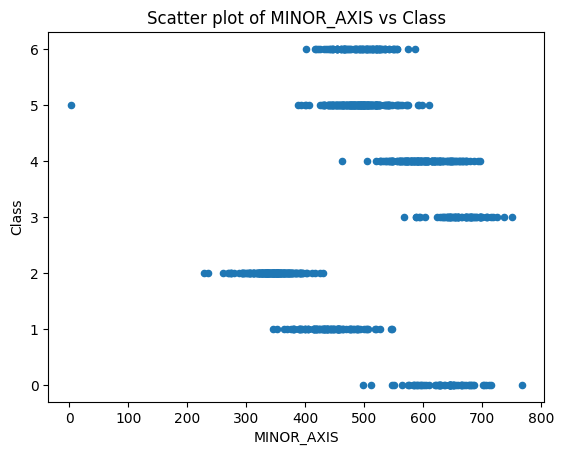

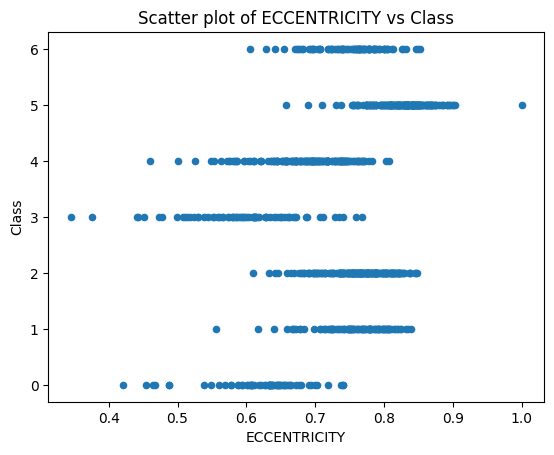

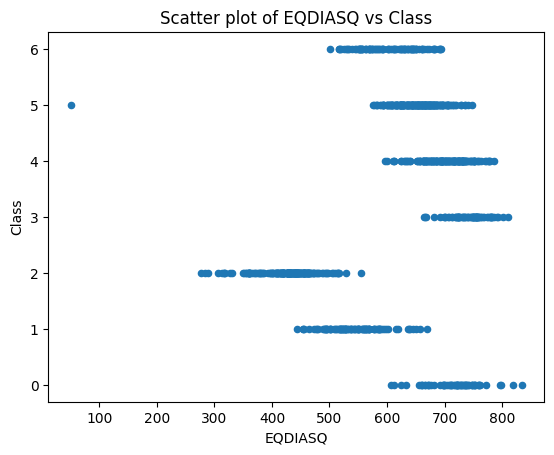

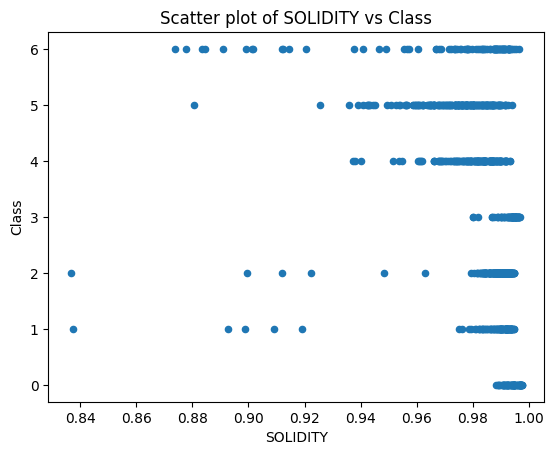

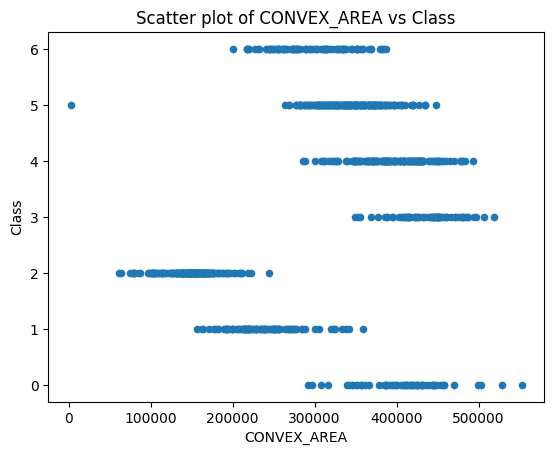

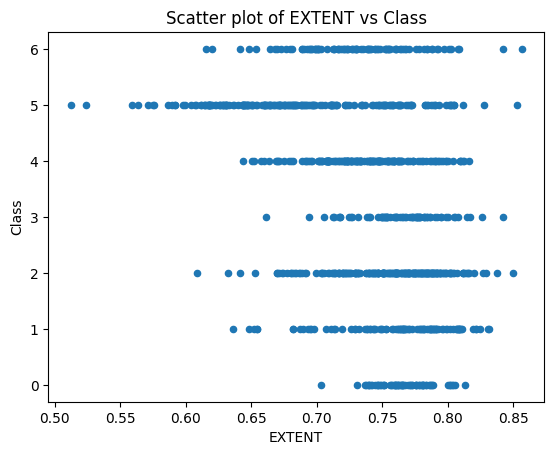

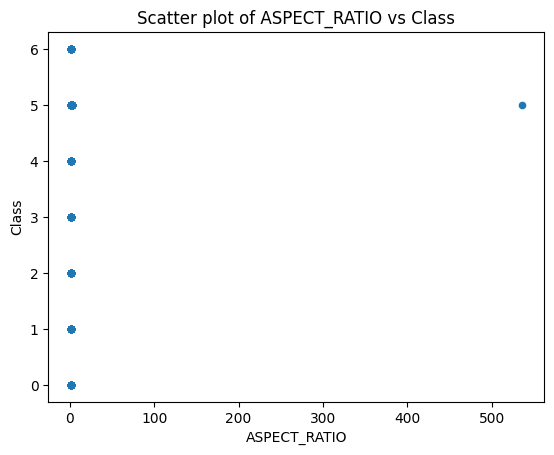

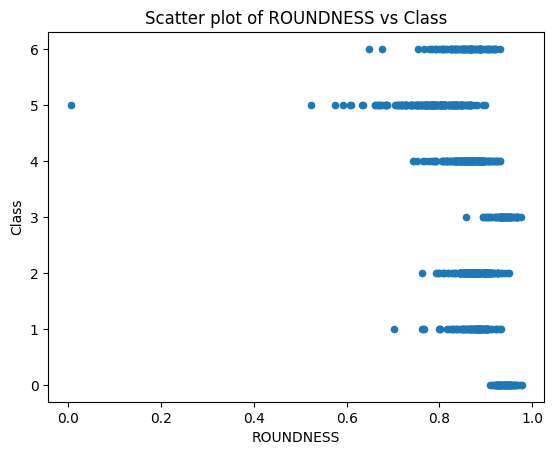

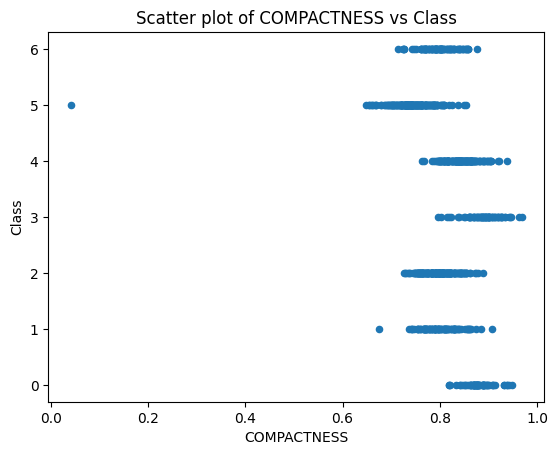

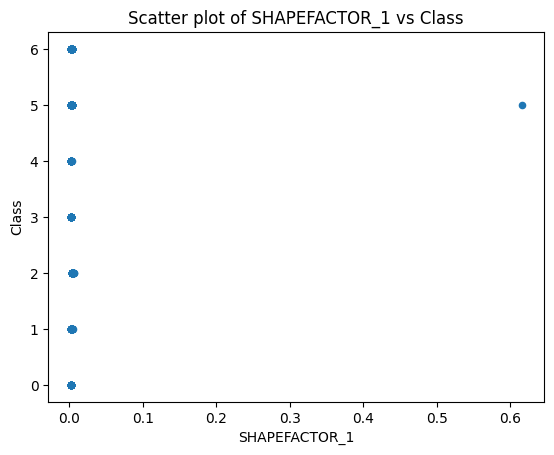

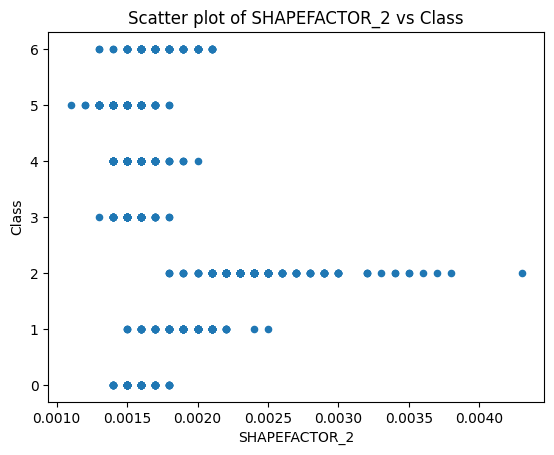

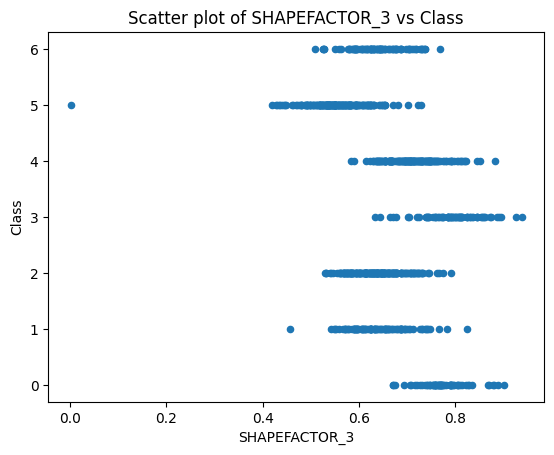

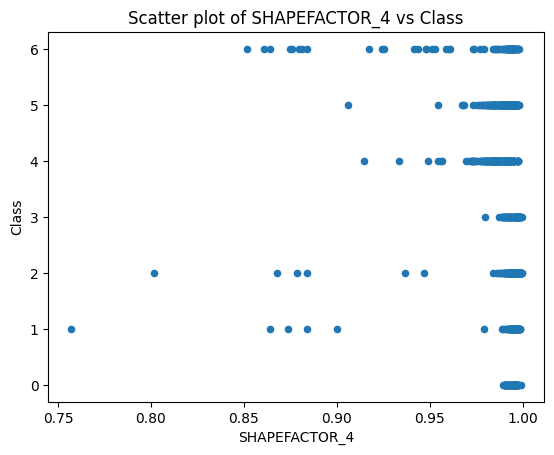

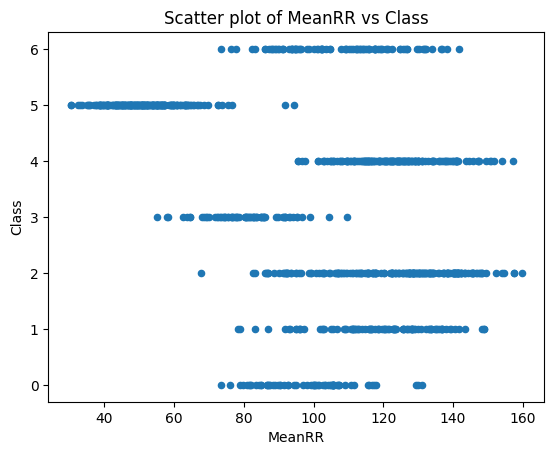

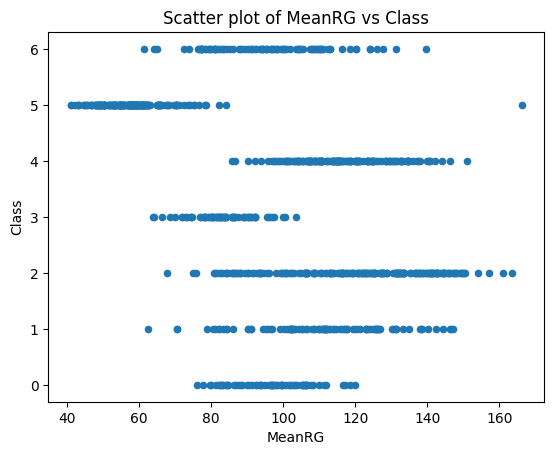

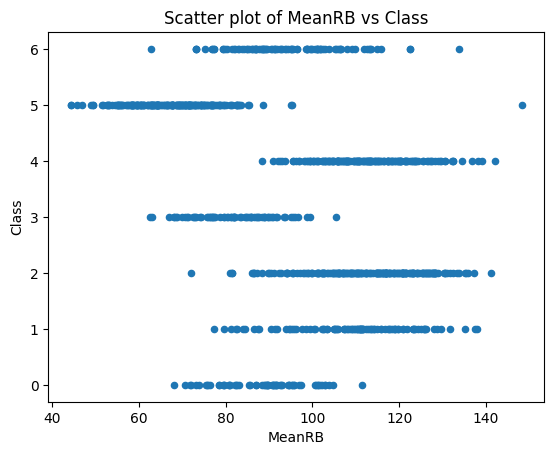

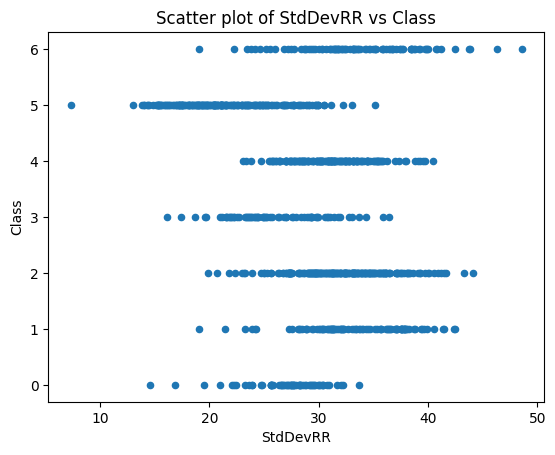

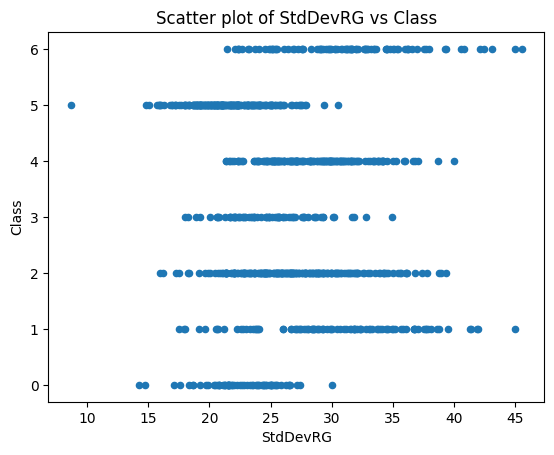

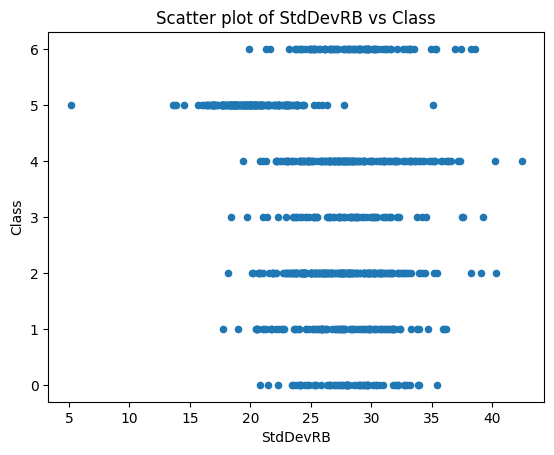

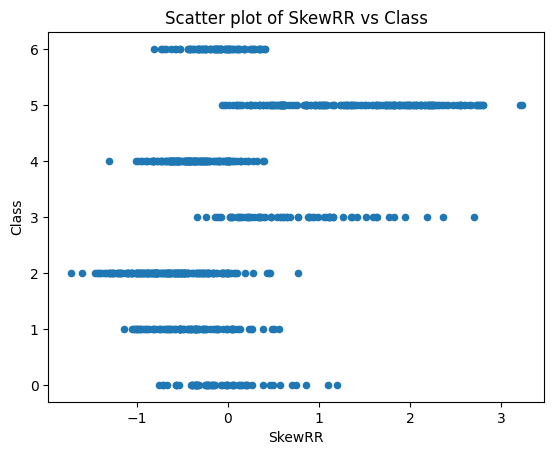

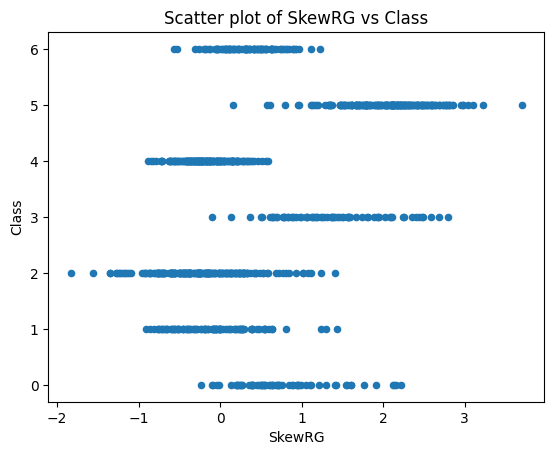

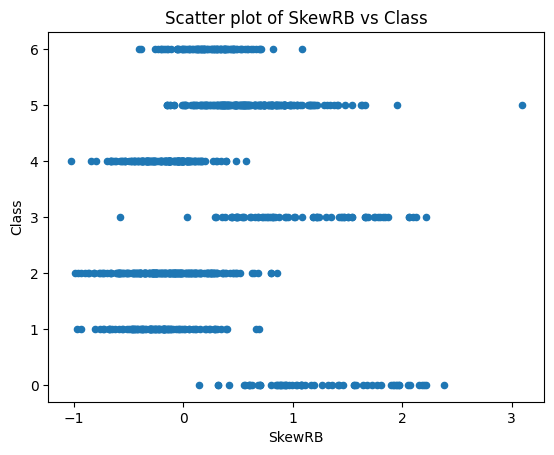

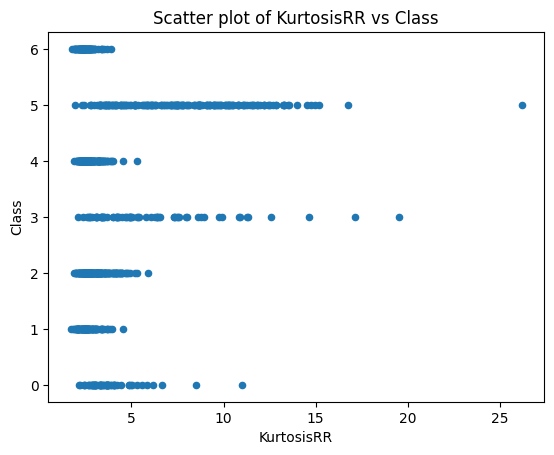

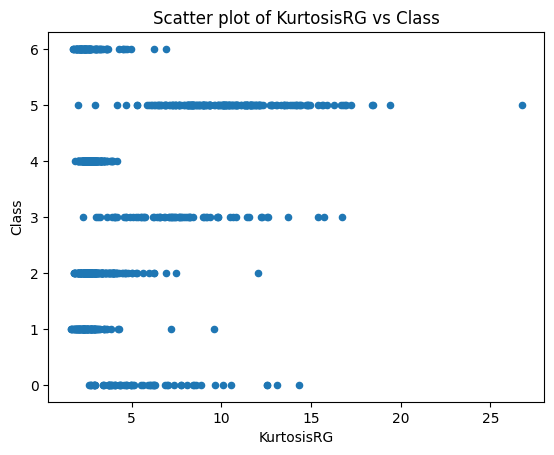

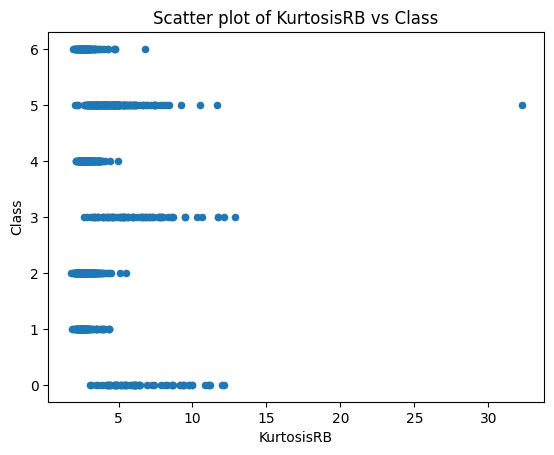

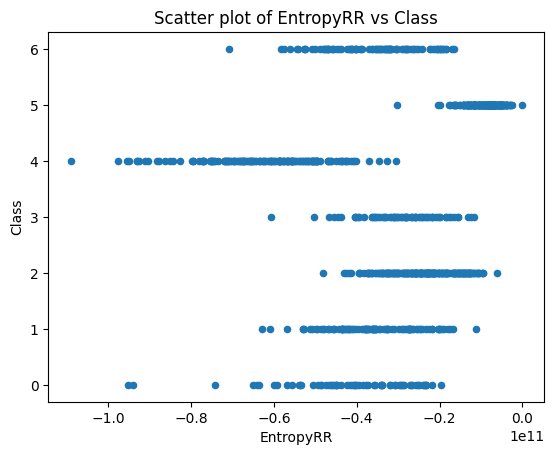

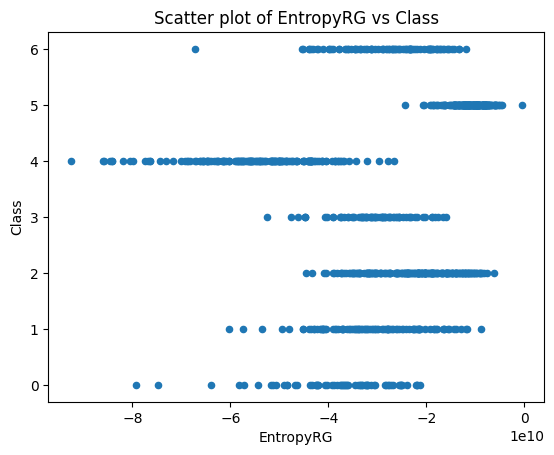

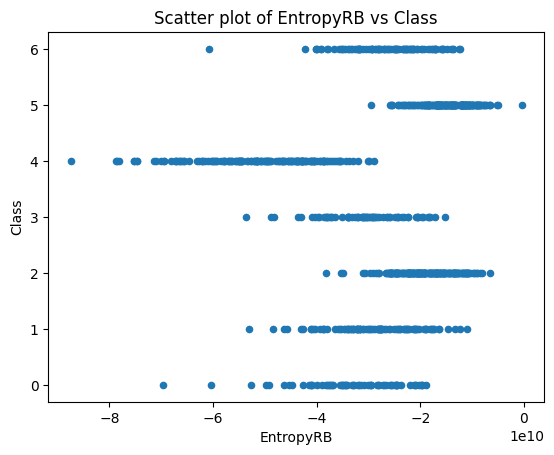

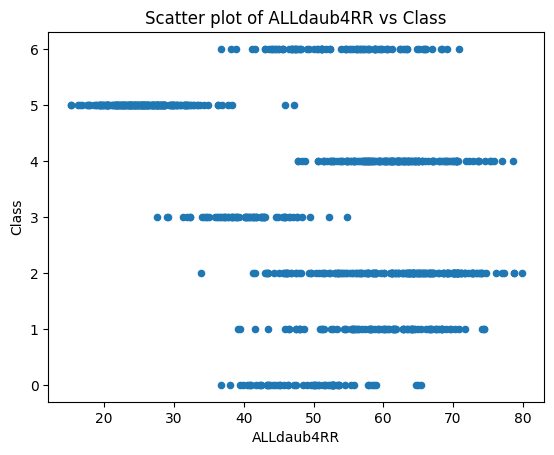

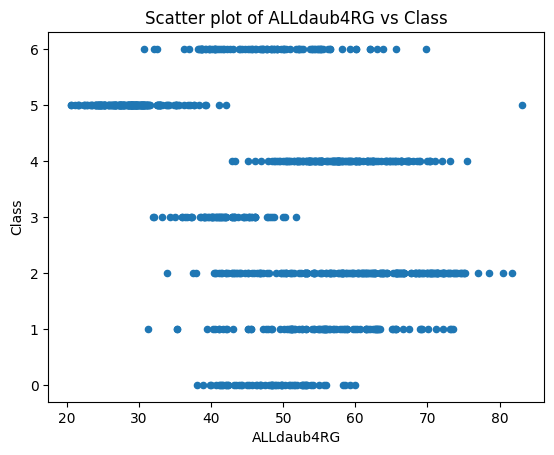

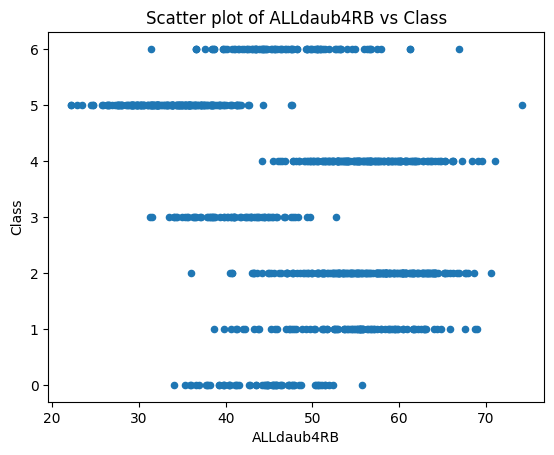

In [21]:
for i, col in enumerate(date_fruit.columns[0:-1], start=1):
    date_fruit.plot(kind='scatter', x=col, y=date_fruit.columns[-1])
    plt.title(f'Scatter plot of {col} vs {date_fruit.columns[-1]}')
    plt.xlabel(col)
    plt.ylabel(date_fruit.columns[-1])
    filename = f'scatter{i}.png'
    plt.savefig(filename)
    plt.show()

4.find out the correlation between :
                                    1.(meanrr,meanrb,meanrg),
                                    2.(Kurtosisrg,kurtosisrr,kurtosisrb),
                                    3.(Allduabrr,Allduabrg,Allduabrb).

In [22]:
corr_group_mean = date_fruit[['MeanRR', 'MeanRB', 'MeanRG']].corr()
print("Correlation Matrix for MeanRR, MeanRB, MeanRG:\n", corr_group_mean)

Correlation Matrix for MeanRR, MeanRB, MeanRG:
           MeanRR    MeanRB    MeanRG
MeanRR  1.000000  0.941831  0.973355
MeanRB  0.941831  1.000000  0.954568
MeanRG  0.973355  0.954568  1.000000


In [23]:
#date_fruit['MeanCombined'] = date_fruit[['MeanRR', 'MeanRB', 'MeanRG']].mean(axis=1)


In [24]:

corr_group_kurtosis = date_fruit[['KurtosisRG', 'KurtosisRR', 'KurtosisRB']].corr()
print("Correlation Matrix for KurtosisRG, KurtosisRR, KurtosisRB:\n", corr_group_kurtosis)


Correlation Matrix for KurtosisRG, KurtosisRR, KurtosisRB:
             KurtosisRG  KurtosisRR  KurtosisRB
KurtosisRG    1.000000    0.791051    0.666257
KurtosisRR    0.791051    1.000000    0.595030
KurtosisRB    0.666257    0.595030    1.000000


In [25]:
#date_fruit['KurtosisCombined'] = date_fruit[['KurtosisRR', 'KurtosisRB', 'KurtosisRG']].mean(axis=1)


In [26]:

corr_group_ALLdaub = date_fruit[['ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB']].corr()
print("Correlation Matrix for ALLdaubRR, ALLdaubRG, ALLdaubRB:\n", corr_group_ALLdaub)


Correlation Matrix for ALLdaubRR, ALLdaubRG, ALLdaubRB:
             ALLdaub4RR  ALLdaub4RG  ALLdaub4RB
ALLdaub4RR    1.000000    0.973357    0.941838
ALLdaub4RG    0.973357    1.000000    0.954572
ALLdaub4RB    0.941838    0.954572    1.000000


In [27]:
#date_fruit['ALLdaub4Combined'] = date_fruit[['ALLdaub4RR', 'ALLdaub4RB', 'ALLdaub4RG']].mean(axis=1)


In [28]:
corr_group_entropy = date_fruit[['EntropyRR', 'EntropyRG', 'EntropyRB']].corr()
print("Correlation Matrix for EntropyRR, EntropyRG, EntropyRB:\n", corr_group_entropy)

Correlation Matrix for EntropyRR, EntropyRG, EntropyRB:
            EntropyRR  EntropyRG  EntropyRB
EntropyRR   1.000000   0.981412   0.937108
EntropyRG   0.981412   1.000000   0.950605
EntropyRB   0.937108   0.950605   1.000000


In [29]:
#date_fruit['EntropyCombined'] = date_fruit[['EntropyRR', 'EntropyRG', 'EntropyRB']].mean(axis=1)


In [30]:
corr_group_Shapefactor = date_fruit[['SHAPEFACTOR_1', 'SHAPEFACTOR_2', 'SHAPEFACTOR_3','SHAPEFACTOR_4']].corr()
print("Correlation Matrix for 'SHAPEFACTOR_1', 'SHAPEFACTOR_2', 'SHAPEFACTOR_3','SHAPEFACTOR_4':\n", corr_group_Shapefactor)

Correlation Matrix for 'SHAPEFACTOR_1', 'SHAPEFACTOR_2', 'SHAPEFACTOR_3','SHAPEFACTOR_4':
                SHAPEFACTOR_1  SHAPEFACTOR_2  SHAPEFACTOR_3  SHAPEFACTOR_4
SHAPEFACTOR_1       1.000000      -0.025354      -0.245419      -0.136144
SHAPEFACTOR_2      -0.025354       1.000000       0.075128      -0.057377
SHAPEFACTOR_3      -0.245419       0.075128       1.000000       0.170575
SHAPEFACTOR_4      -0.136144      -0.057377       0.170575       1.000000


so shape factor is not highly corelated it is negatively corelated that is why se will not going to combine this.

In [31]:
corr_group_stdDev = date_fruit[['StdDevRB', 'StdDevRG', 'StdDevRR']].corr()
print("Correlation Matrix for StdDevRB', 'StdDevRG', 'StdDevRR:\n", corr_group_stdDev)

Correlation Matrix for StdDevRB', 'StdDevRG', 'StdDevRR:
           StdDevRB  StdDevRG  StdDevRR
StdDevRB  1.000000  0.744889  0.743259
StdDevRG  0.744889  1.000000  0.886635
StdDevRR  0.743259  0.886635  1.000000


In [32]:
#date_fruit['StdDevCombined'] = date_fruit[['StdDevRB', 'StdDevRG', 'StdDevRR']].mean(axis=1)


In [33]:
date_fruit.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')

/var/folders/ds/6kfbb9qd0mx8352l0y59g3tr0000gn/T/ipykernel_4084/3906387898.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


<Figure size 1200x800 with 0 Axes>

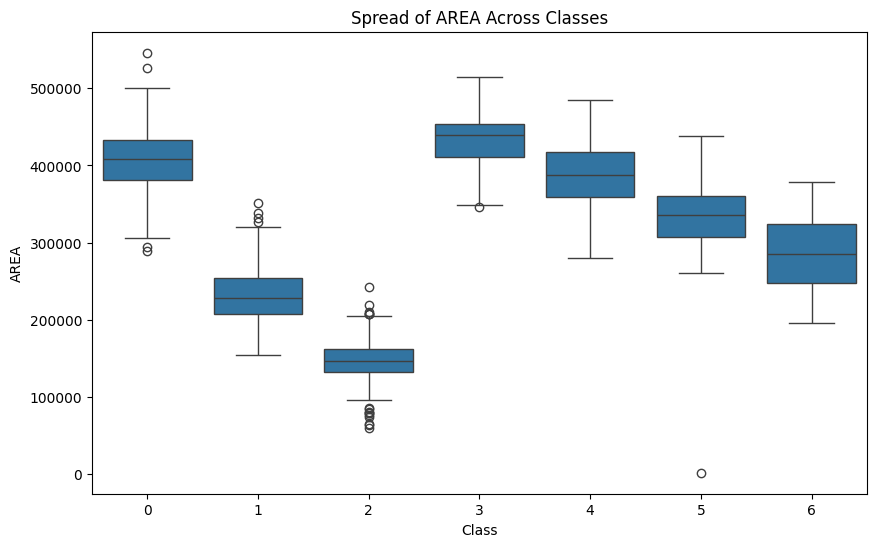

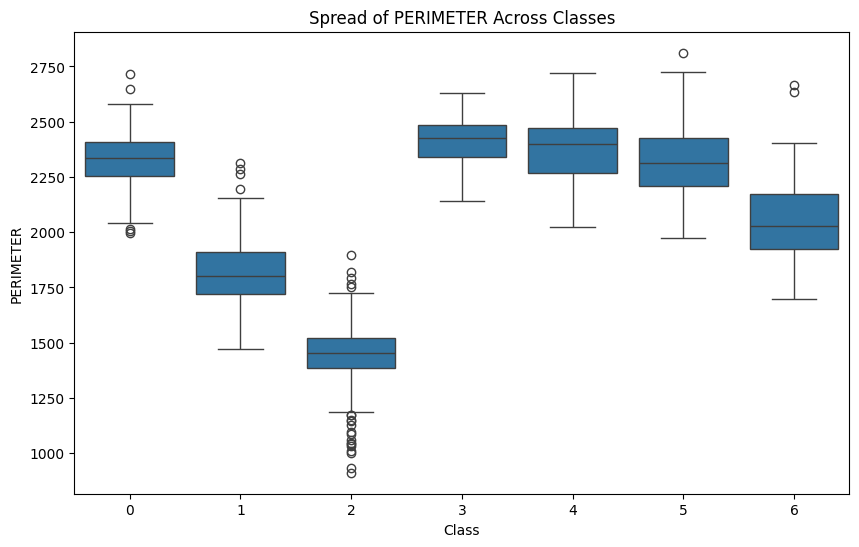

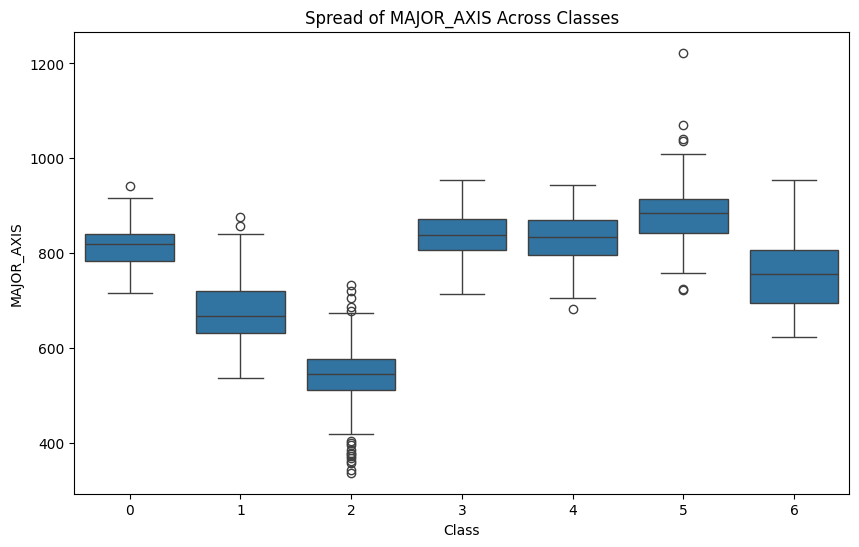

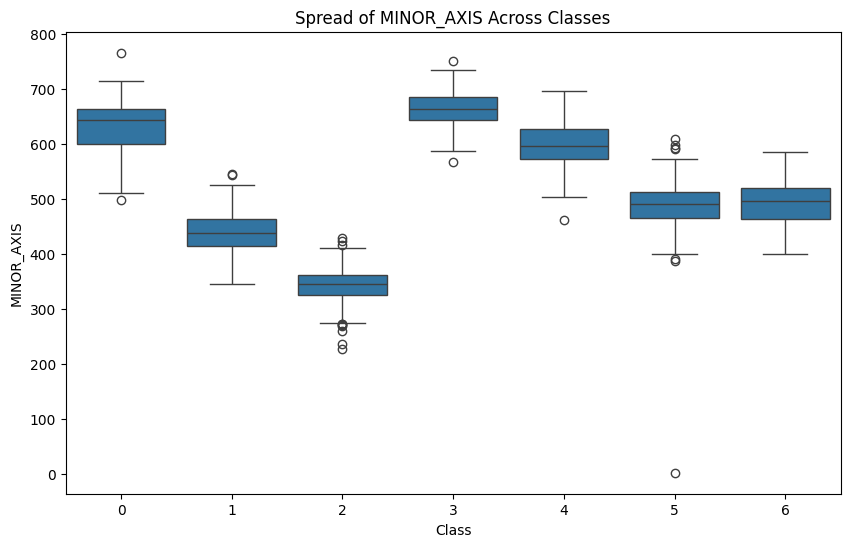

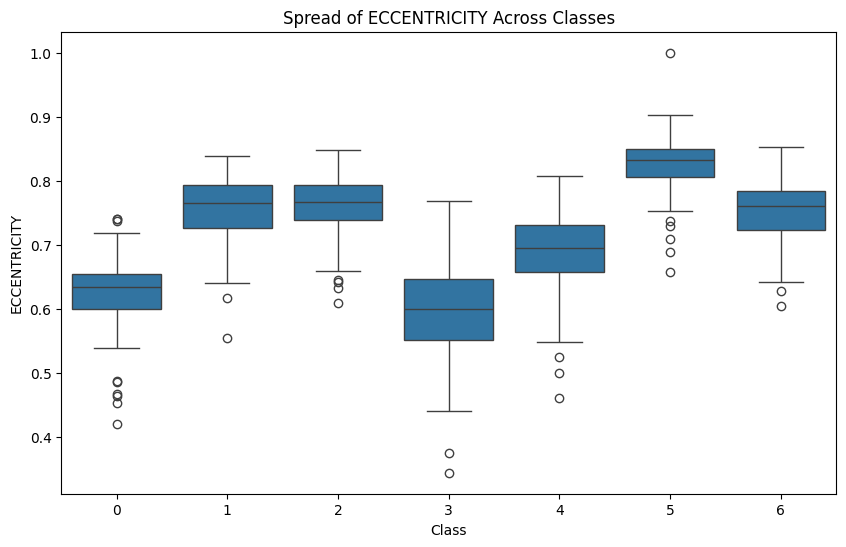

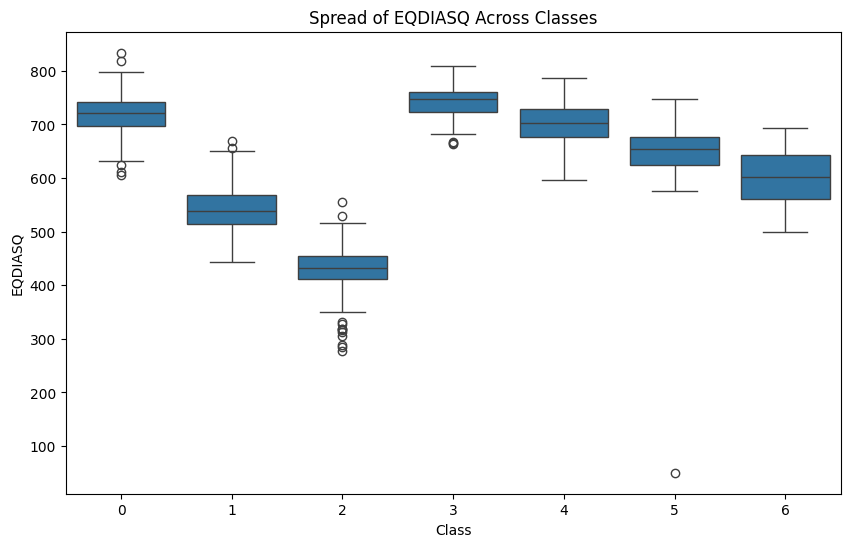

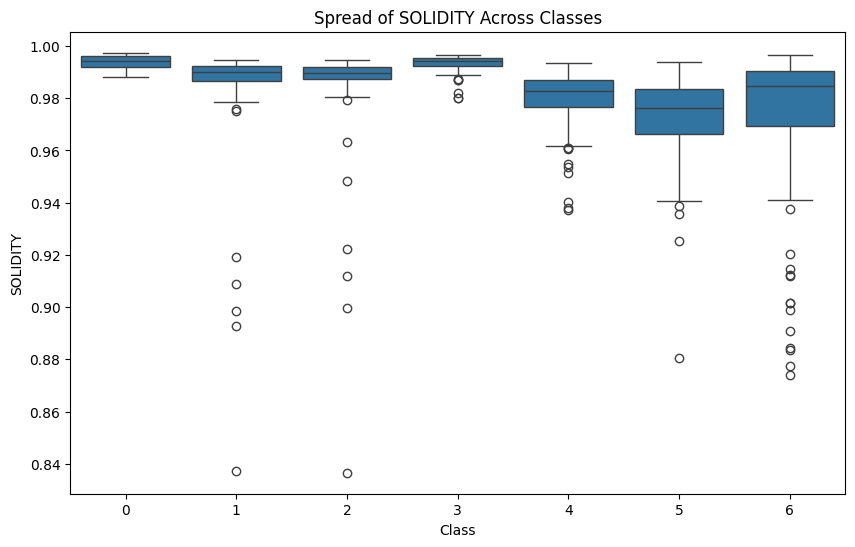

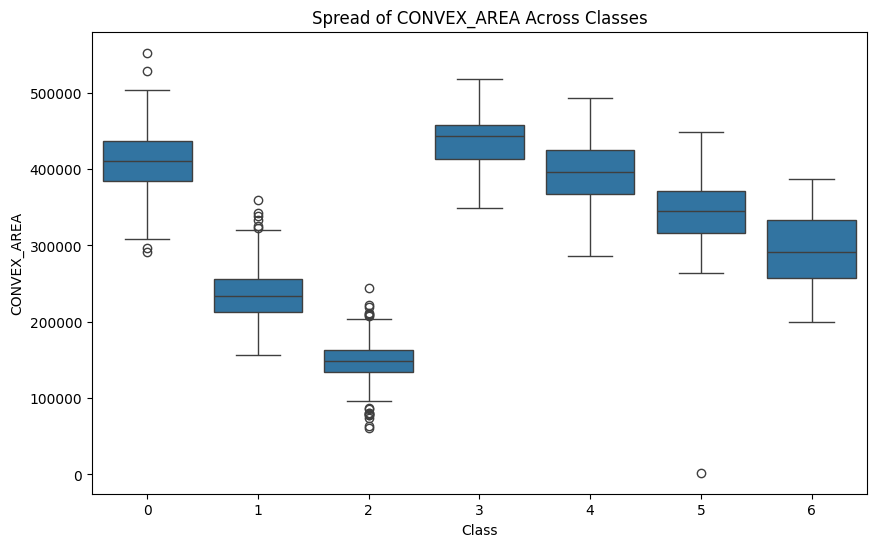

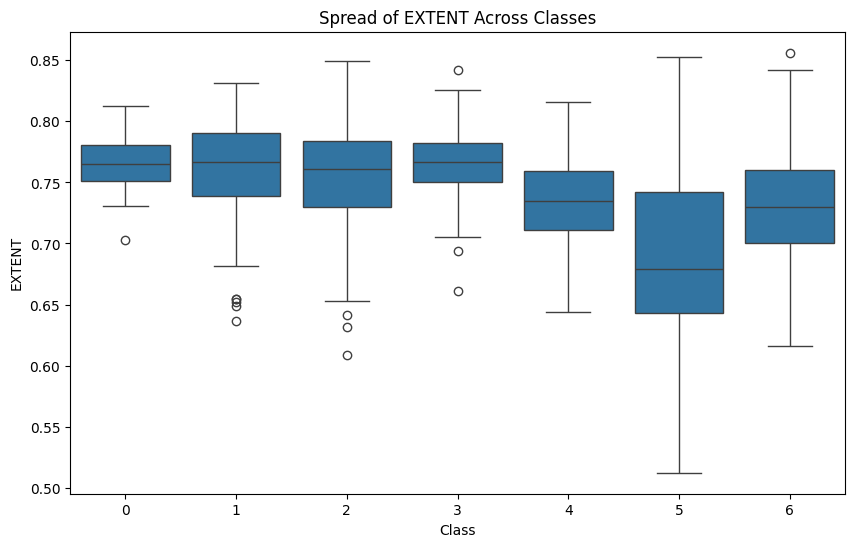

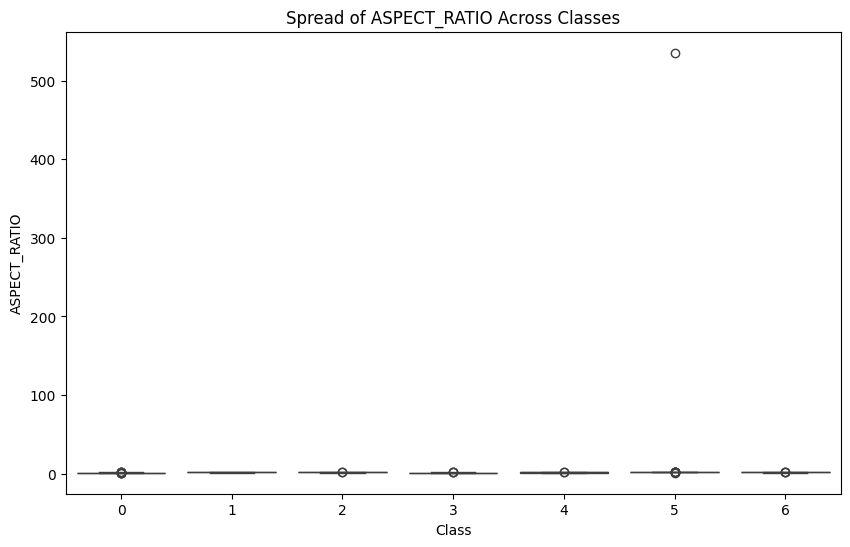

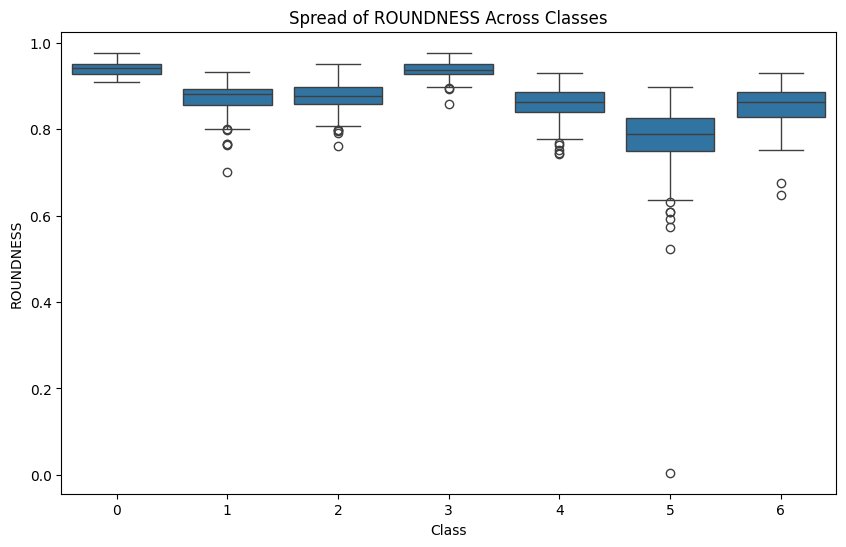

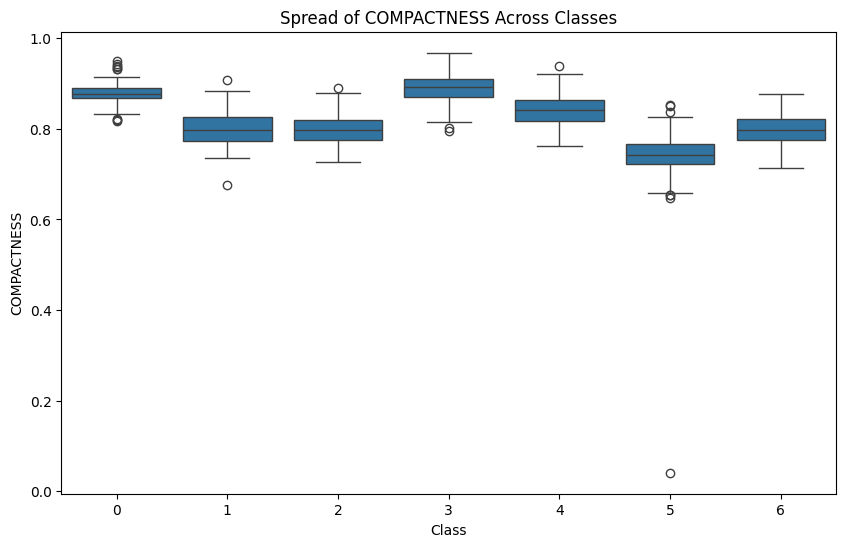

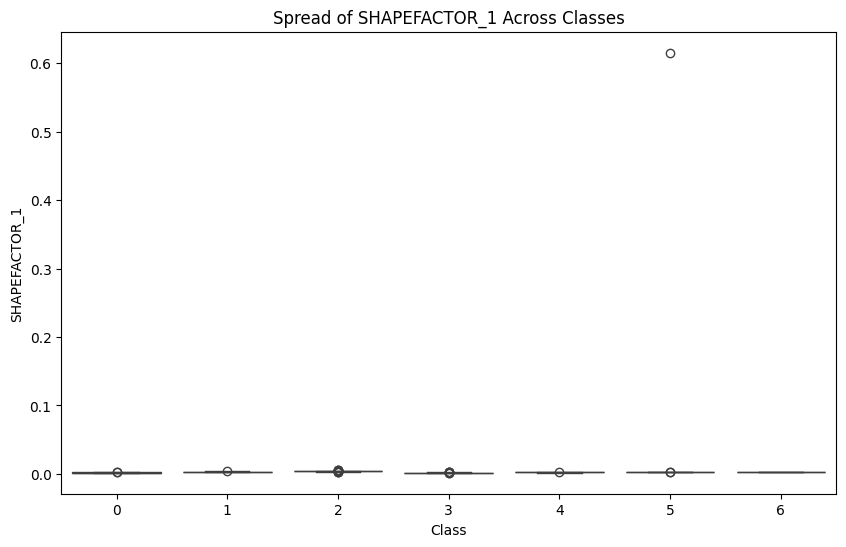

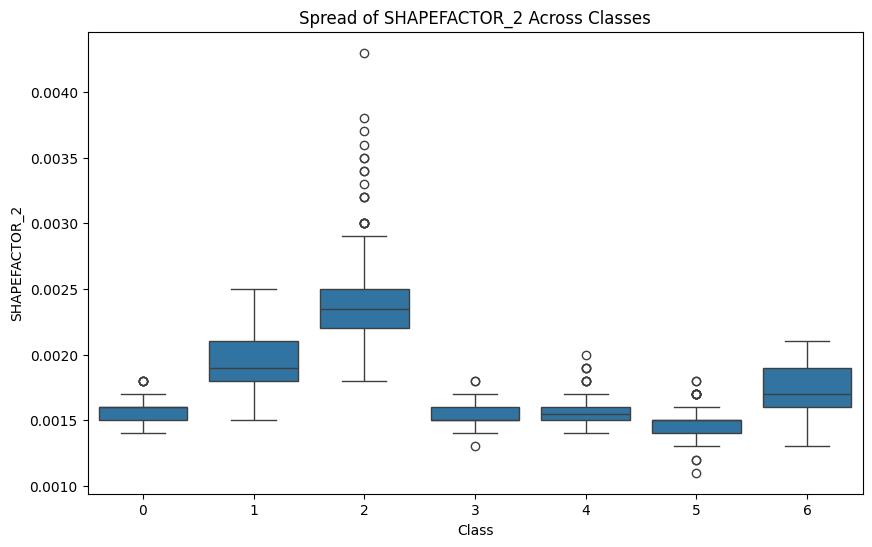

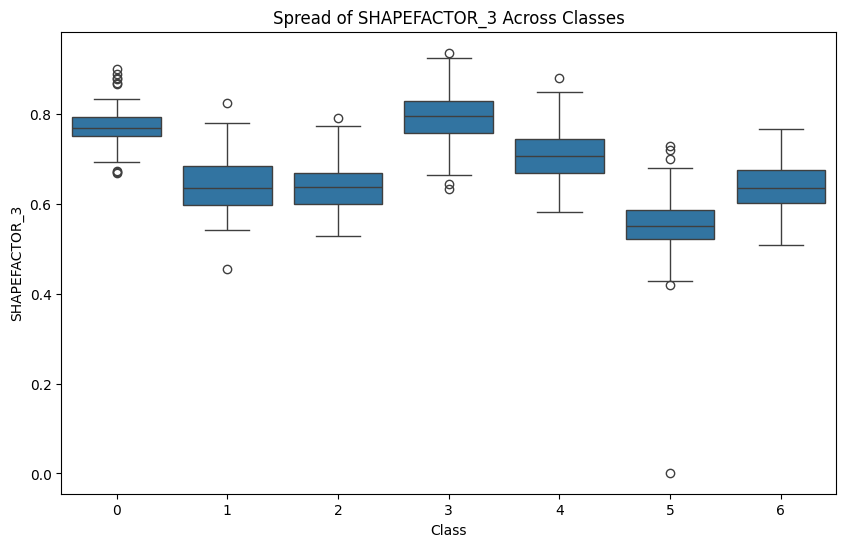

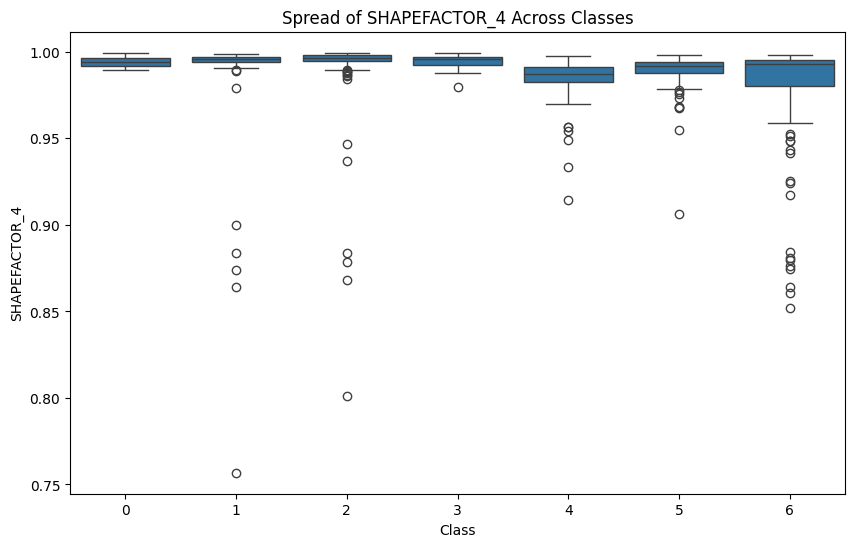

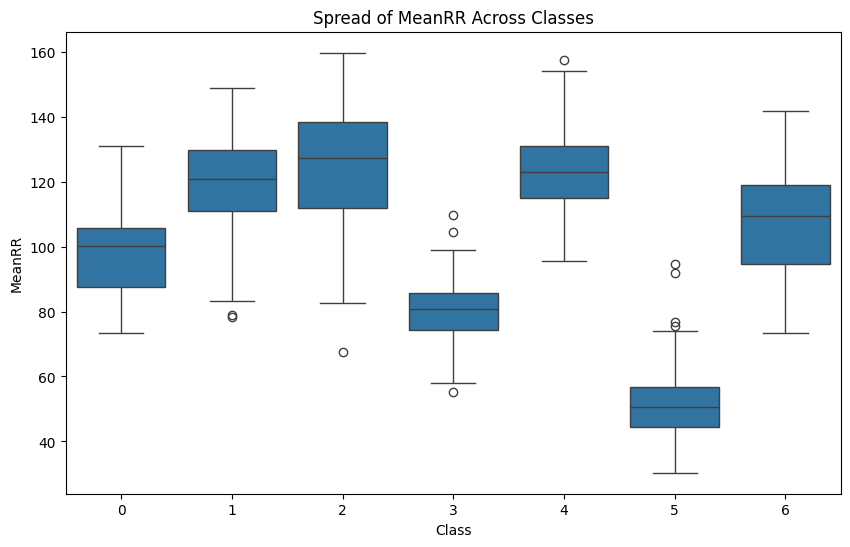

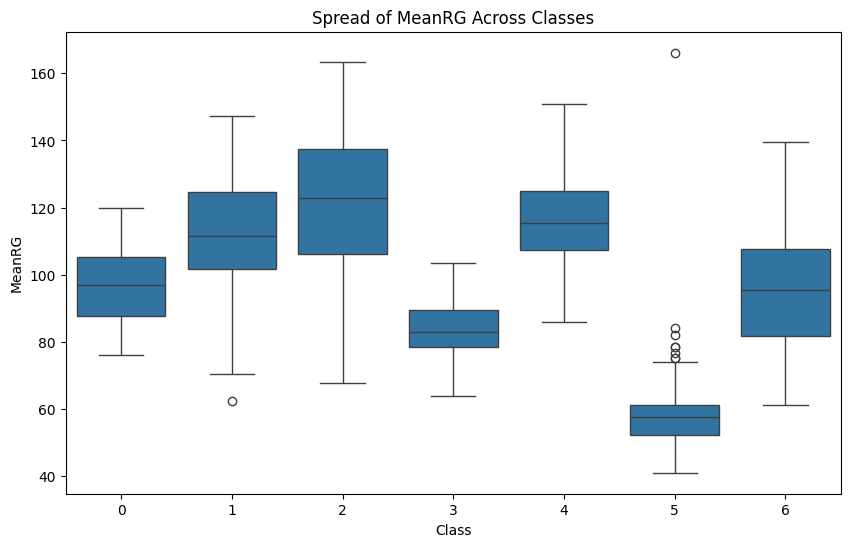

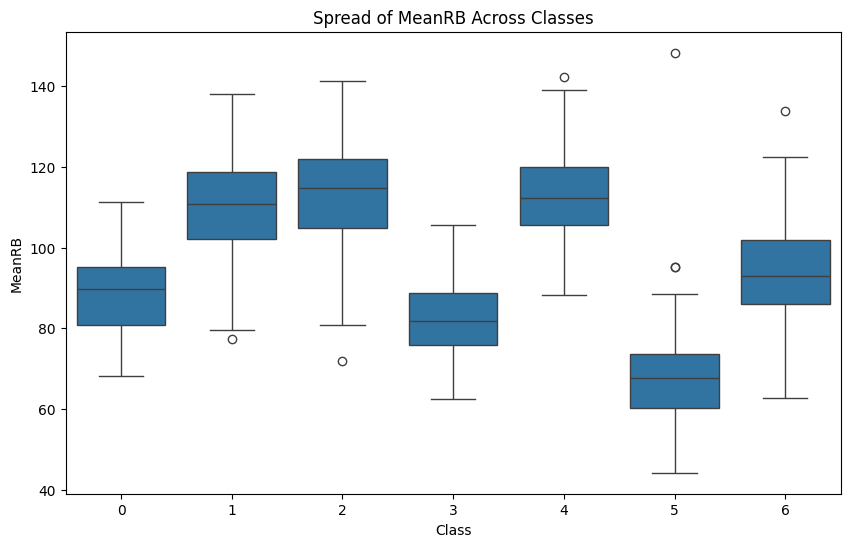

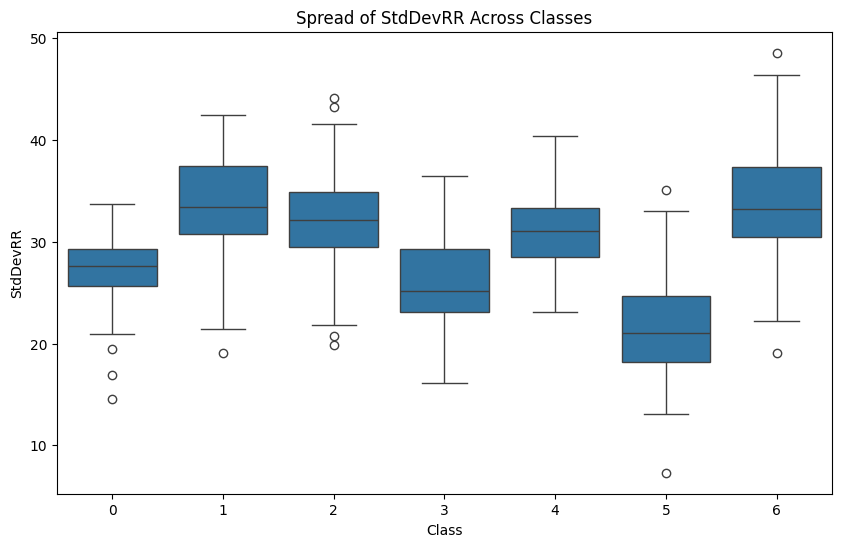

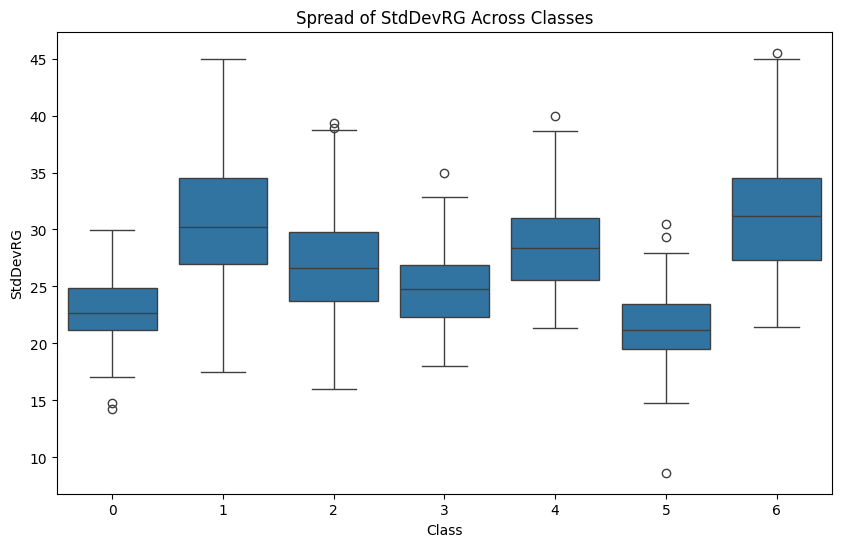

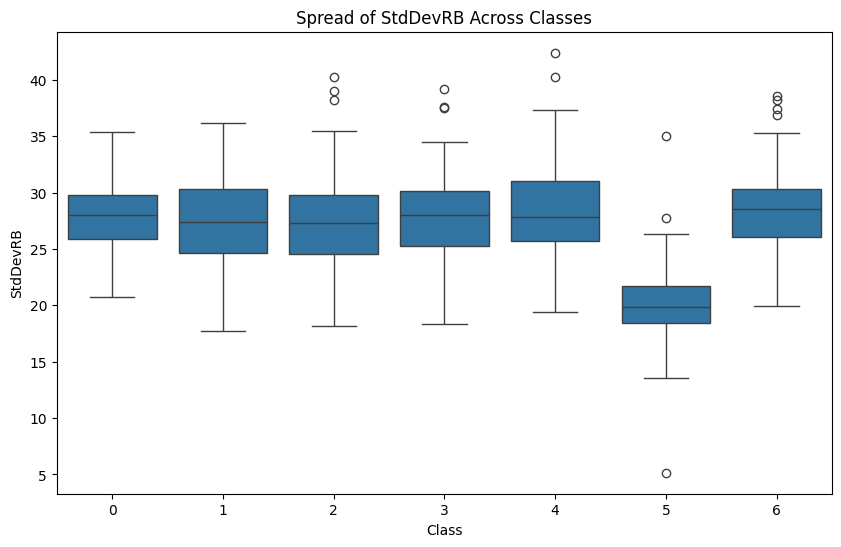

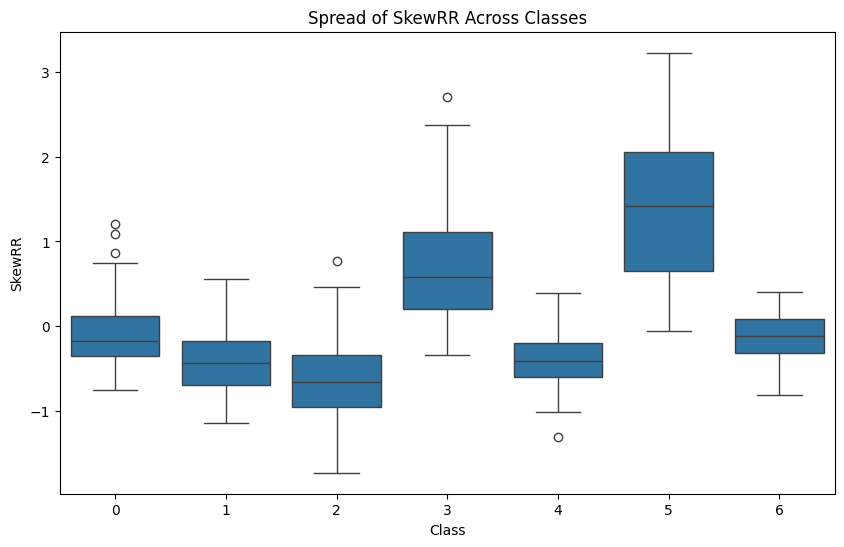

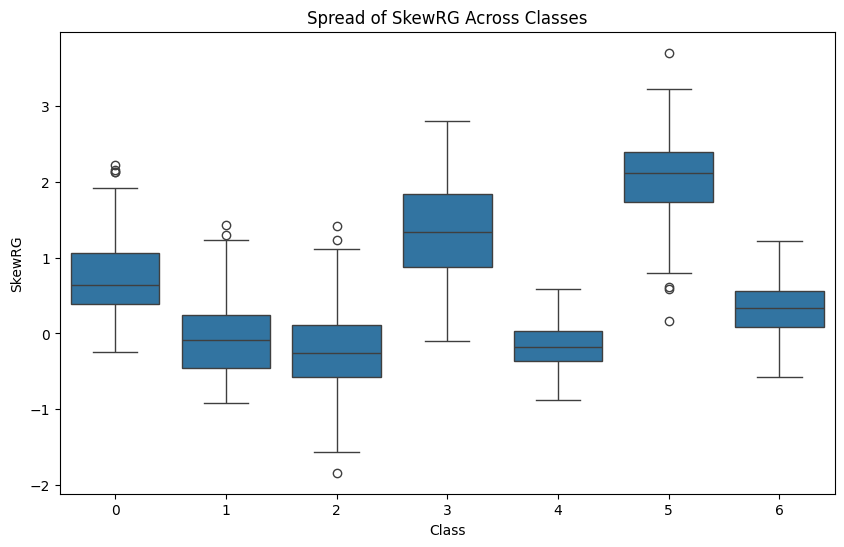

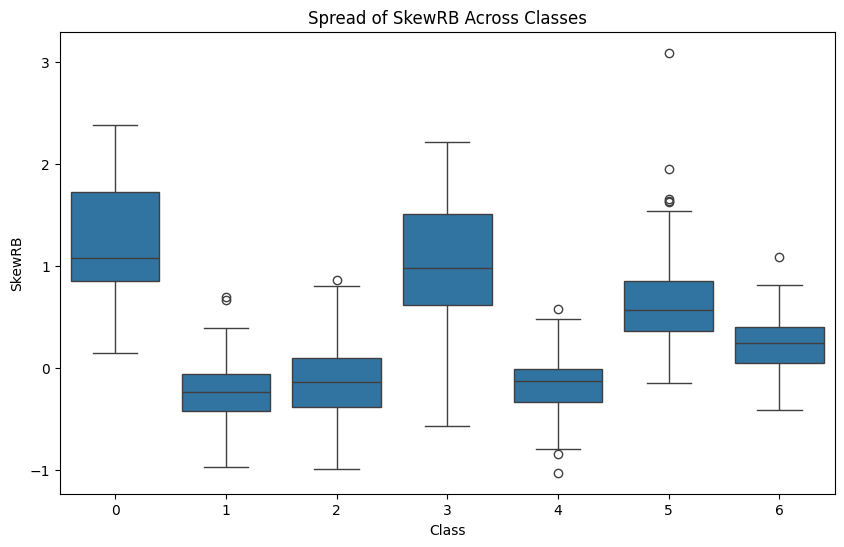

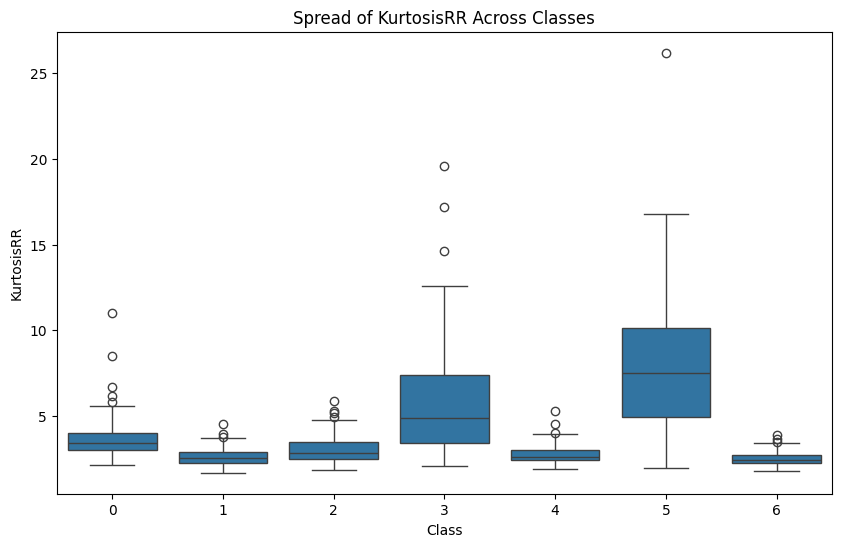

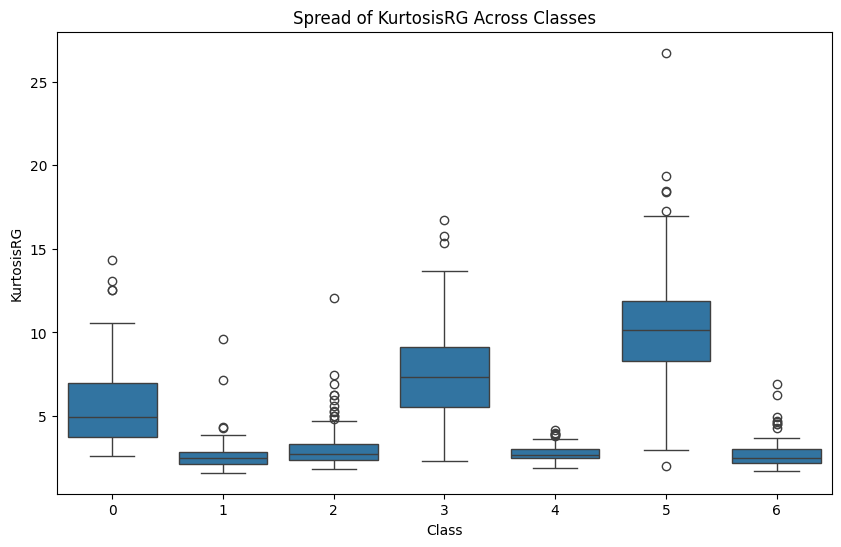

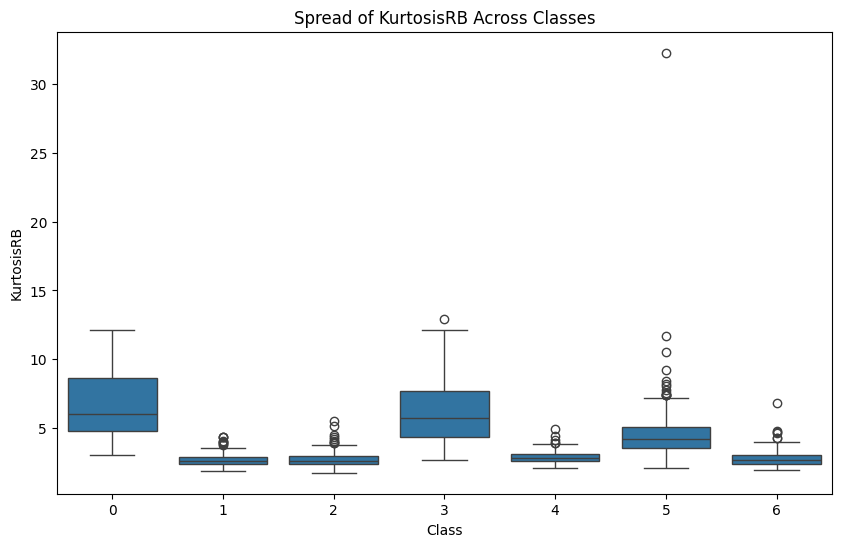

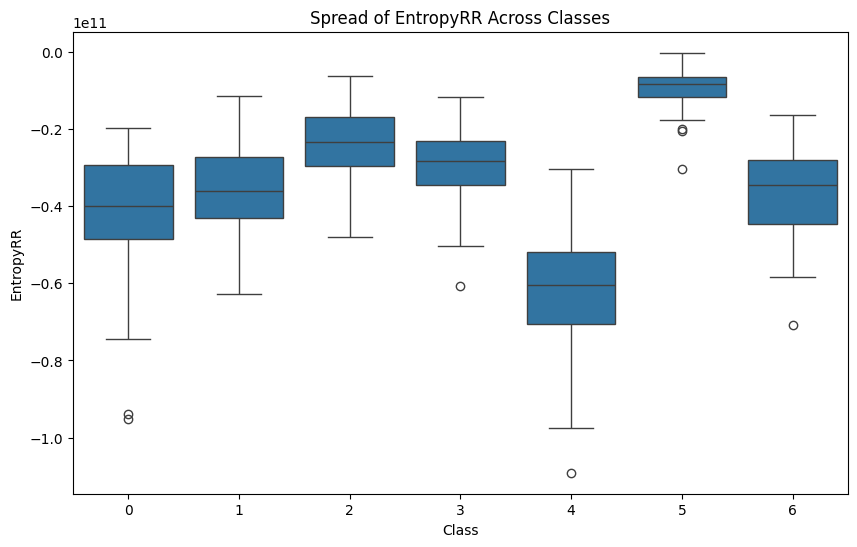

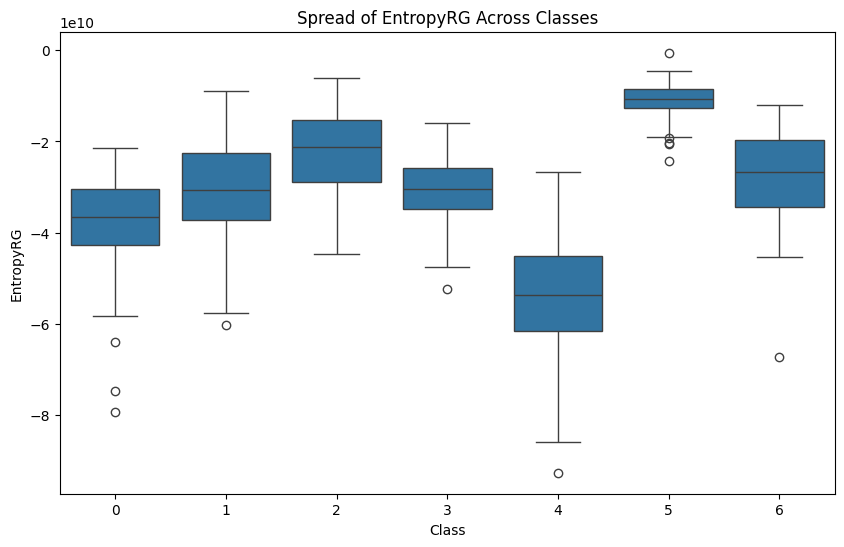

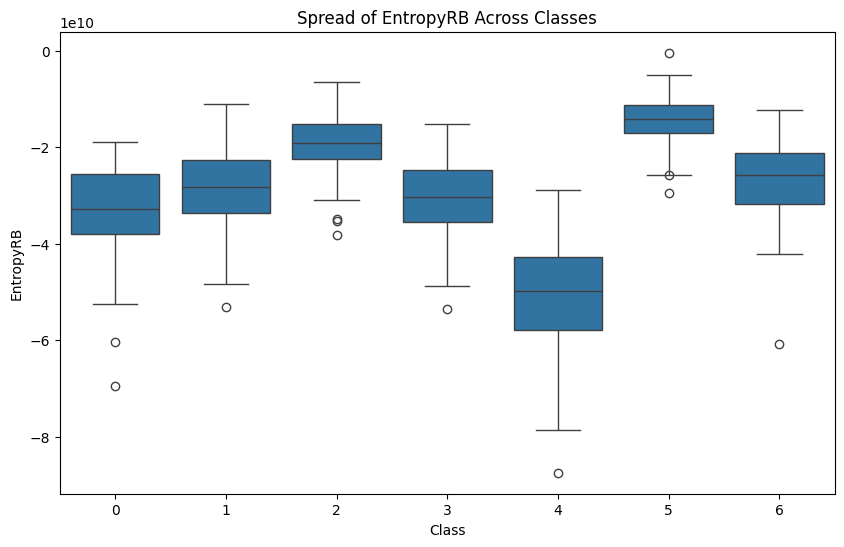

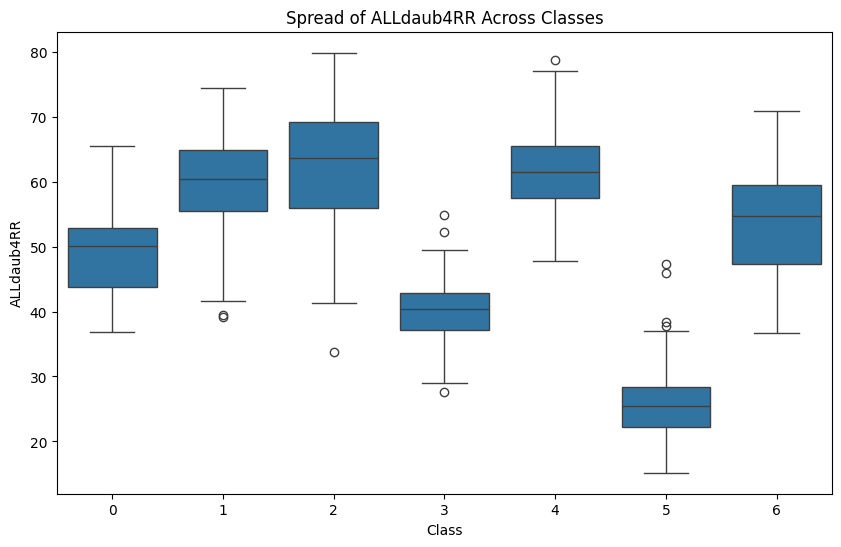

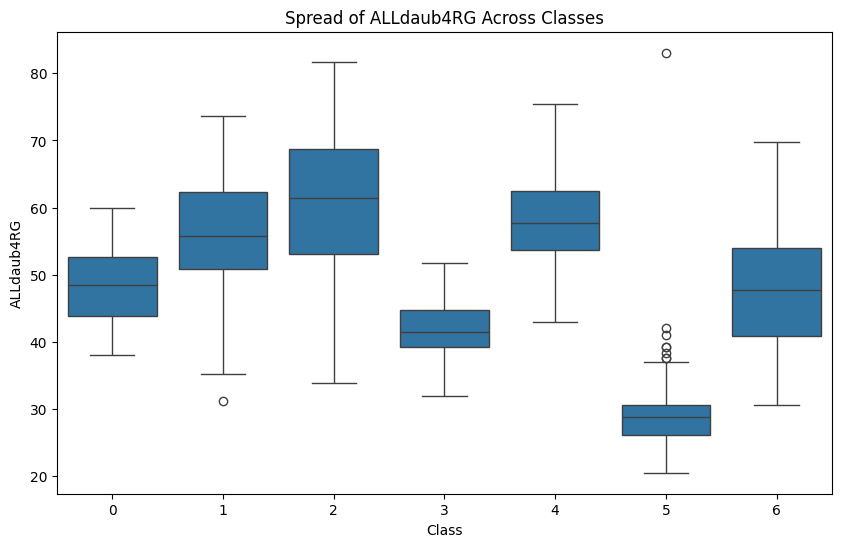

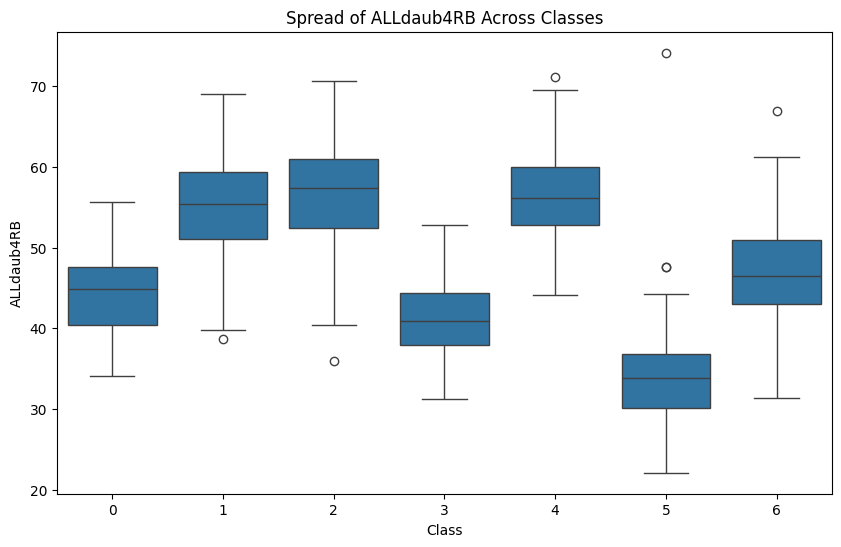

In [34]:
features = ['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB']

plt.figure(figsize=(12, 8))
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Class', y=feature, data=date_fruit)
    plt.title(f'Spread of {feature} Across Classes')
    plt.xlabel('Class')
    plt.ylabel(feature)
    filename = f'Boxplot_{feature}.png'
    plt.savefig(filename)
   

In [35]:

# Calculate Z-scores for each column
z_scores = (date_fruit - date_fruit.mean()) / date_fruit.std()

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers using the Z-score method
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Count the number of outliers in each column
outlier_counts = outliers.sum()

print("Count of outliers for each column:")
print(outlier_counts)

columns_to_remove_outliers = ['MAJOR_AXIS','MINOR_AXIS','EQDIASQ','SOLIDITY','CONVEX_AREA','ROUNDNESS','COMPACTNESS','SHAPEFACTOR_4','StdDevRR','StdDevRG','StdDevRB','SkewRB','KurtosisRR','KurtosisRG','KurtosisRB','EXTENT',"SHAPEFACTOR_1"] 

# Remove outliers from specific columns directly in the DataFrame
date_fruit[columns_to_remove_outliers] = date_fruit[columns_to_remove_outliers][~outliers[columns_to_remove_outliers].any(axis=1)]



Count of outliers for each column:
AREA              0
PERIMETER         0
MAJOR_AXIS        1
MINOR_AXIS        1
ECCENTRICITY     10
EQDIASQ           1
SOLIDITY         23
CONVEX_AREA       0
EXTENT            5
ASPECT_RATIO      1
ROUNDNESS         8
COMPACTNESS       1
SHAPEFACTOR_1     1
SHAPEFACTOR_2    12
SHAPEFACTOR_3     1
SHAPEFACTOR_4    22
MeanRR            0
MeanRG            0
MeanRB            0
StdDevRR          2
StdDevRG          5
StdDevRB          2
SkewRR            2
SkewRG            1
SkewRB            7
KurtosisRR       16
KurtosisRG       10
KurtosisRB       17
EntropyRR         8
EntropyRG         8
EntropyRB         8
ALLdaub4RR        0
ALLdaub4RG        0
ALLdaub4RB        0
Class             0
dtype: int64


In [80]:
date_fruit.shape

(898, 35)

In [36]:
date_fruit.isna().sum()

AREA              0
PERIMETER         0
MAJOR_AXIS       73
MINOR_AXIS       73
ECCENTRICITY      0
EQDIASQ          73
SOLIDITY         73
CONVEX_AREA      73
EXTENT           73
ASPECT_RATIO      0
ROUNDNESS        73
COMPACTNESS      73
SHAPEFACTOR_1    73
SHAPEFACTOR_2     0
SHAPEFACTOR_3     0
SHAPEFACTOR_4    73
MeanRR            0
MeanRG            0
MeanRB            0
StdDevRR         73
StdDevRG         73
StdDevRB         73
SkewRR            0
SkewRG            0
SkewRB           73
KurtosisRR       73
KurtosisRG       73
KurtosisRB       73
EntropyRR         0
EntropyRG         0
EntropyRB         0
ALLdaub4RR        0
ALLdaub4RG        0
ALLdaub4RB        0
Class             0
dtype: int64

In [82]:
date_fruit.dropna(inplace=True)

In [38]:
corr = date_fruit.corr()

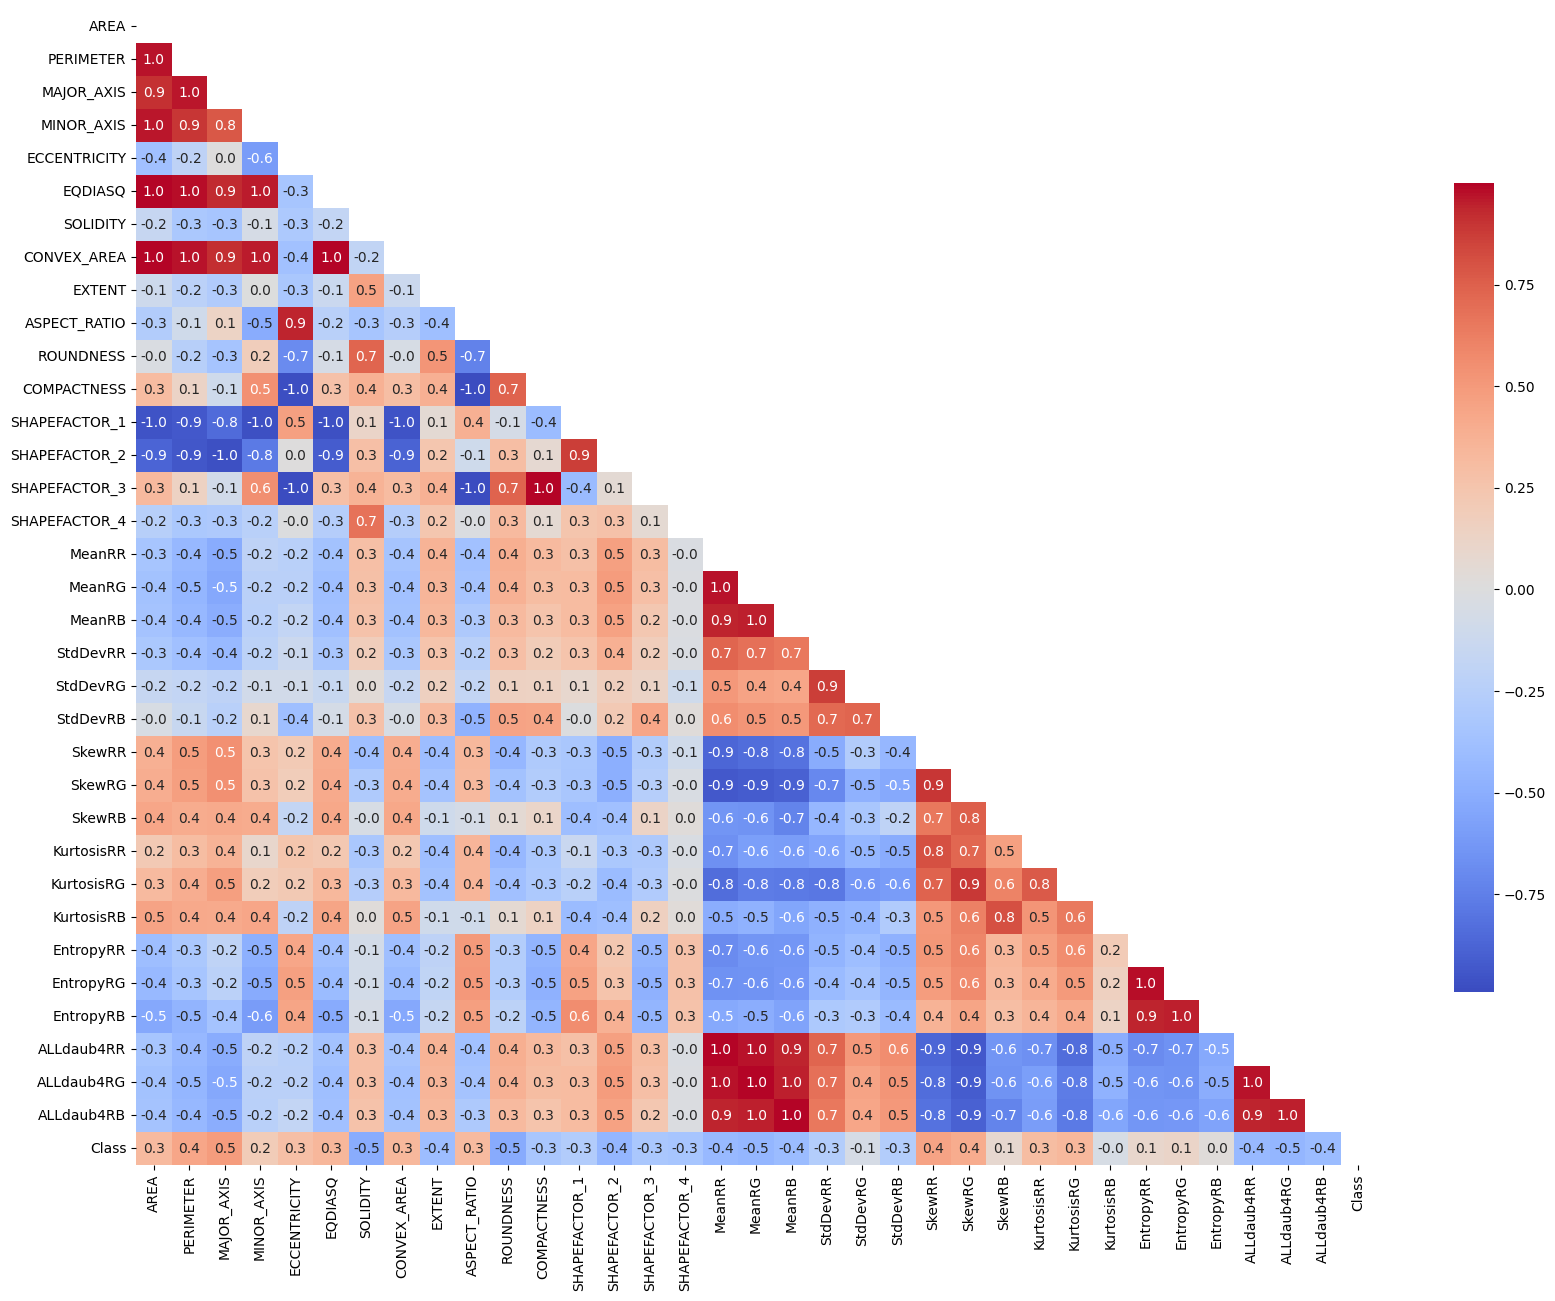

In [39]:
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20, 15))
sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'shrink': .7})

plt.show()

In [40]:
corrvalue=date_fruit.corr()["Class"]

In [41]:
corrvalue

AREA             0.317112
PERIMETER        0.435228
MAJOR_AXIS       0.492365
MINOR_AXIS       0.195062
ECCENTRICITY     0.291400
EQDIASQ          0.345305
SOLIDITY        -0.508982
CONVEX_AREA      0.332381
EXTENT          -0.405536
ASPECT_RATIO     0.322869
ROUNDNESS       -0.523405
COMPACTNESS     -0.332767
SHAPEFACTOR_1   -0.279065
SHAPEFACTOR_2   -0.446086
SHAPEFACTOR_3   -0.328713
SHAPEFACTOR_4   -0.338941
MeanRR          -0.422802
MeanRG          -0.453454
MeanRB          -0.408471
StdDevRR        -0.267453
StdDevRG        -0.055445
StdDevRB        -0.274080
SkewRR           0.448733
SkewRG           0.403547
SkewRB           0.077355
KurtosisRR       0.307817
KurtosisRG       0.333346
KurtosisRB      -0.043619
EntropyRR        0.092527
EntropyRG        0.114361
EntropyRB        0.025772
ALLdaub4RR      -0.422800
ALLdaub4RG      -0.453463
ALLdaub4RB      -0.408492
Class            1.000000
Name: Class, dtype: float64

StdDevRG: -0.055445.
KurtosisRB: -0.043619.
EntropyRB: 0.025772

This values are close to 0 and also impacting the accuracy so we will remove this feature.

AREA vs perimeter 

<Axes: xlabel='AREA', ylabel='PERIMETER'>

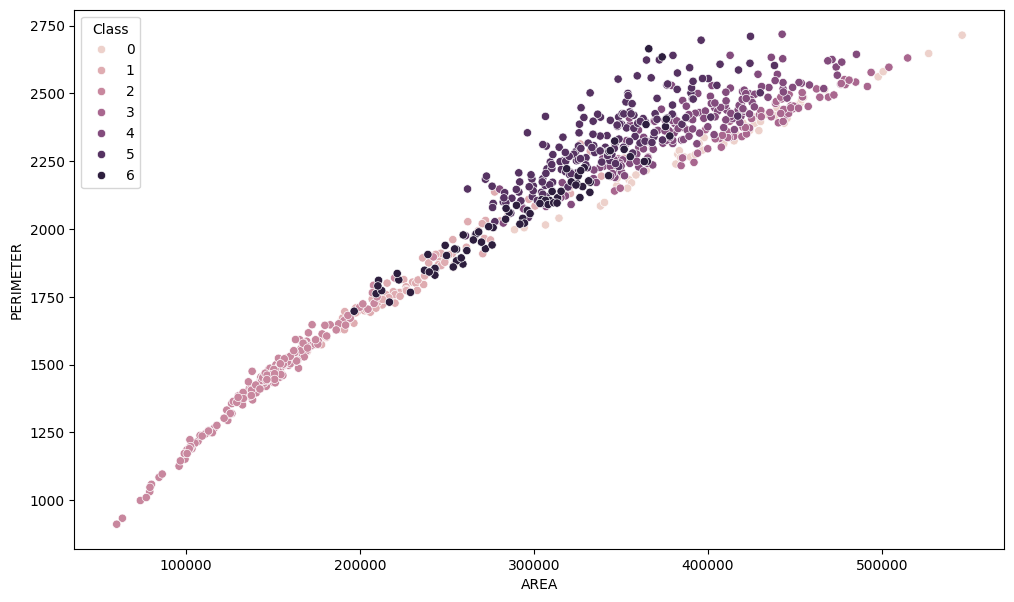

In [42]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="AREA" , y="PERIMETER", hue='Class', data= date_fruit)

Area vs convex Area

<Axes: xlabel='AREA', ylabel='CONVEX_AREA'>

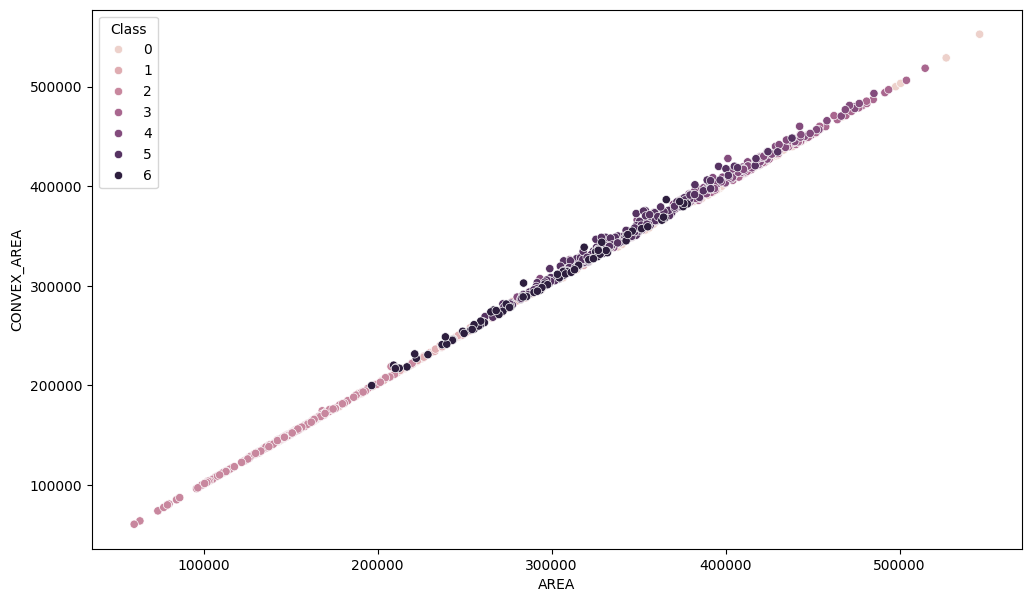

In [43]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="AREA" , y="CONVEX_AREA", hue='Class', data= date_fruit)

Area vs major axis

<Axes: xlabel='AREA', ylabel='MAJOR_AXIS'>

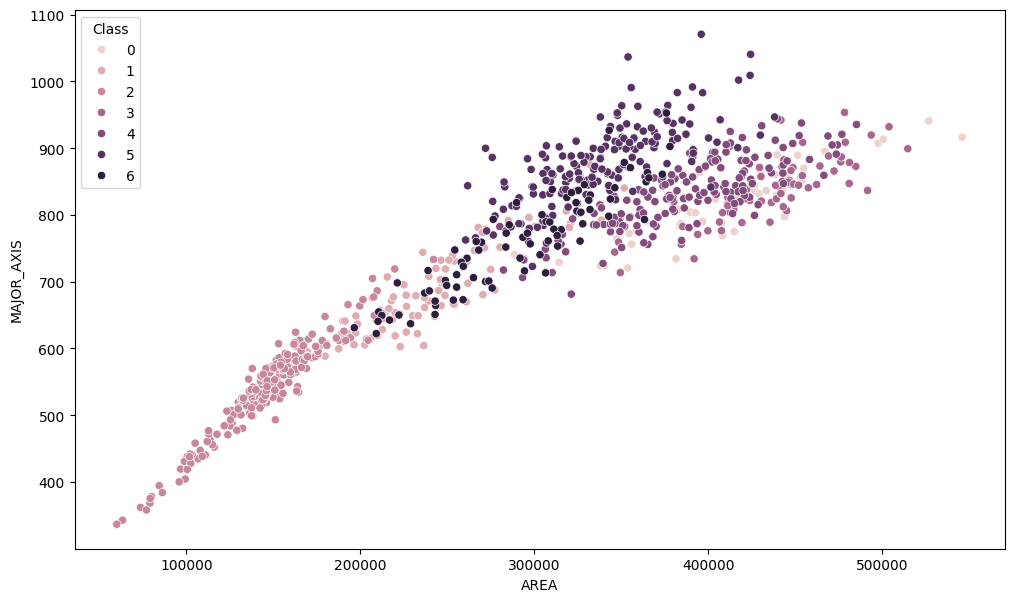

In [44]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="AREA" , y="MAJOR_AXIS", hue='Class', data= date_fruit)

Area vs Minor axis

<Axes: xlabel='AREA', ylabel='MINOR_AXIS'>

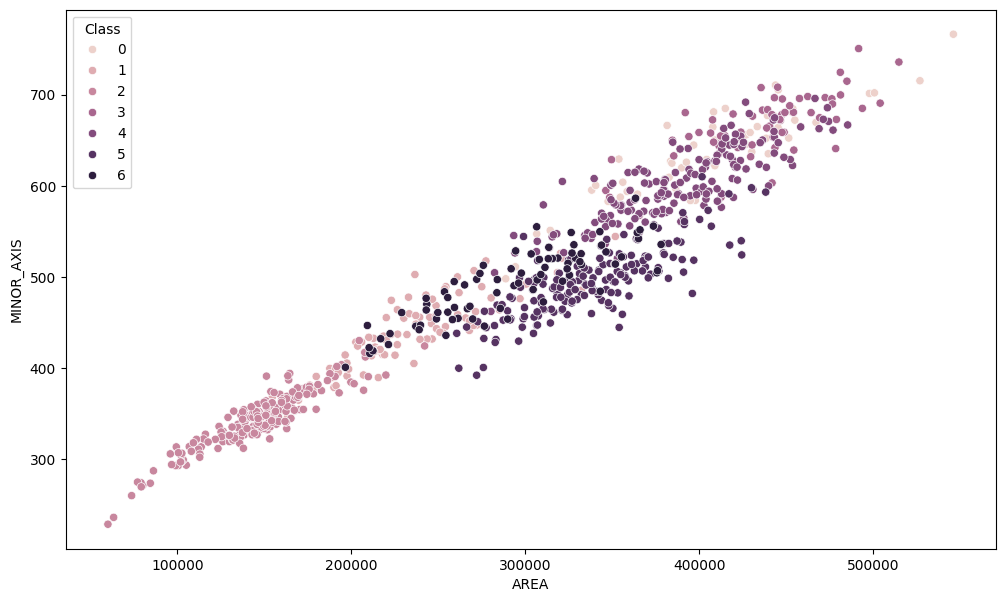

In [45]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="AREA" , y="MINOR_AXIS", hue='Class', data= date_fruit)

Area vs EQDIASQ

<Axes: xlabel='AREA', ylabel='EQDIASQ'>

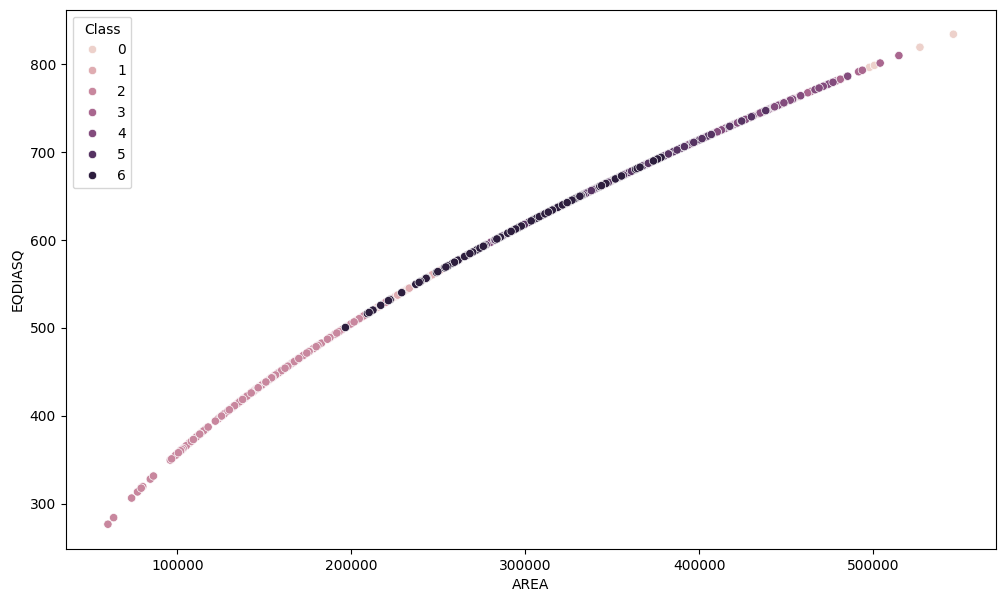

In [46]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="AREA" , y="EQDIASQ", hue='Class', data= date_fruit)

SHAPEFACTOR 4 vs SOLIDITY

<Axes: xlabel='SHAPEFACTOR_4', ylabel='SOLIDITY'>

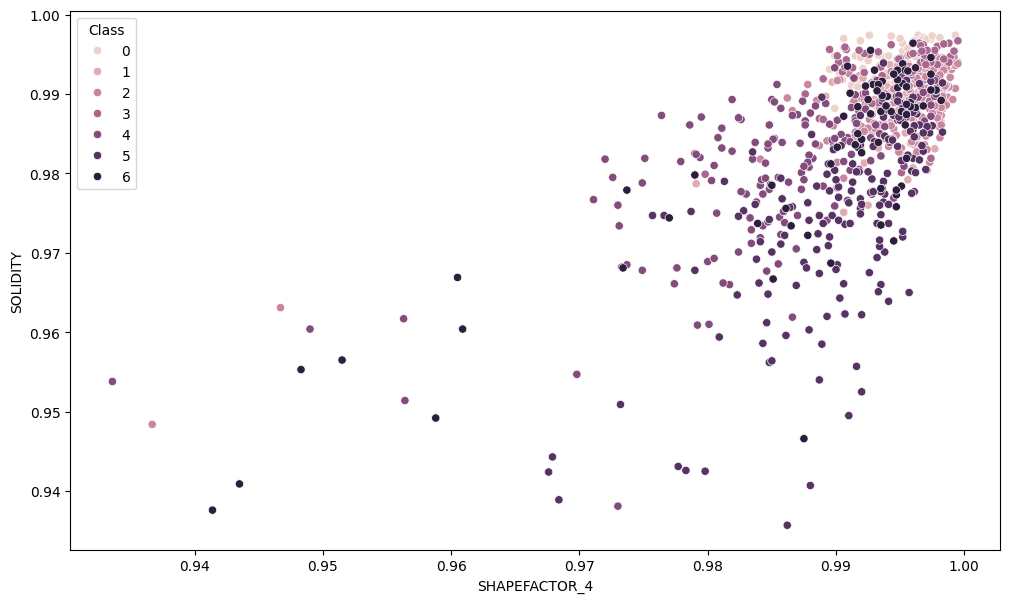

In [47]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="SHAPEFACTOR_4" , y="SOLIDITY", hue='Class', data= date_fruit)

Shapefactor1 vs compactness

<Axes: xlabel='SHAPEFACTOR_1', ylabel='COMPACTNESS'>

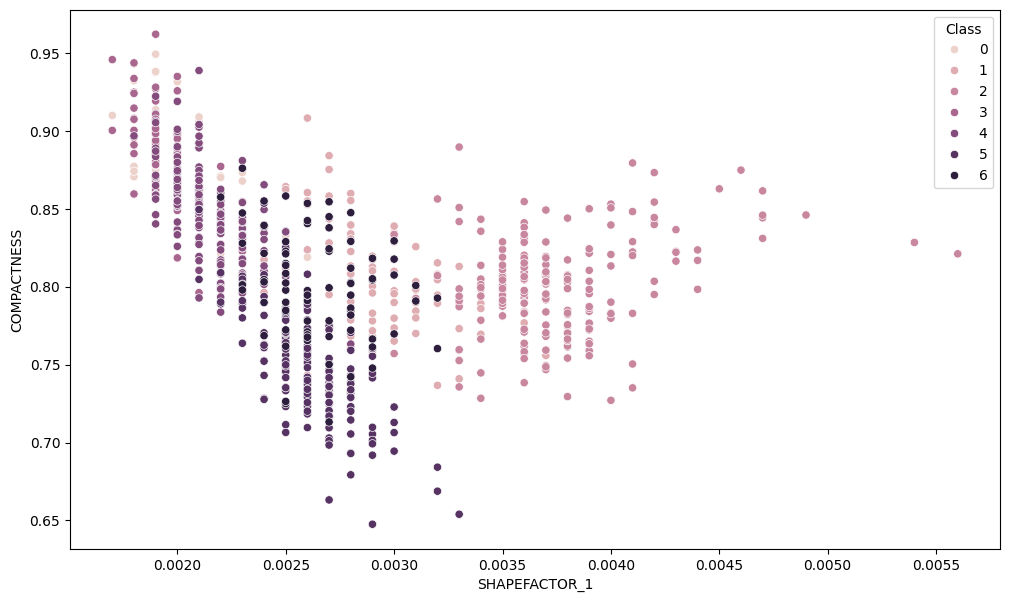

In [48]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="SHAPEFACTOR_1" , y="COMPACTNESS", hue='Class', data= date_fruit)

convexarea vs minor axis

<Axes: xlabel='CONVEX_AREA', ylabel='MINOR_AXIS'>

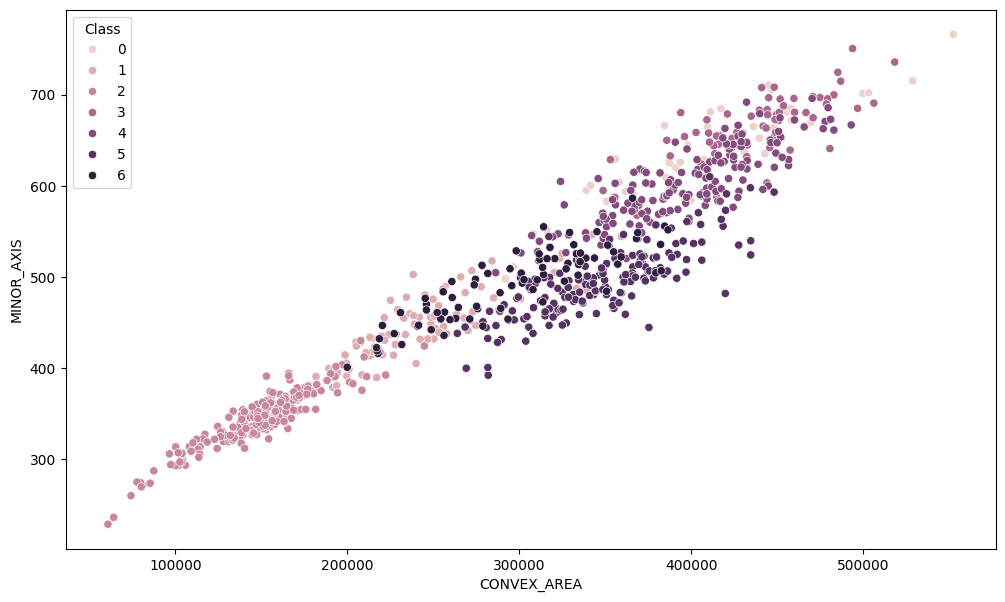

In [49]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="CONVEX_AREA" , y="MINOR_AXIS", hue='Class', data= date_fruit)

convex area vs major axis

<Axes: xlabel='CONVEX_AREA', ylabel='MAJOR_AXIS'>

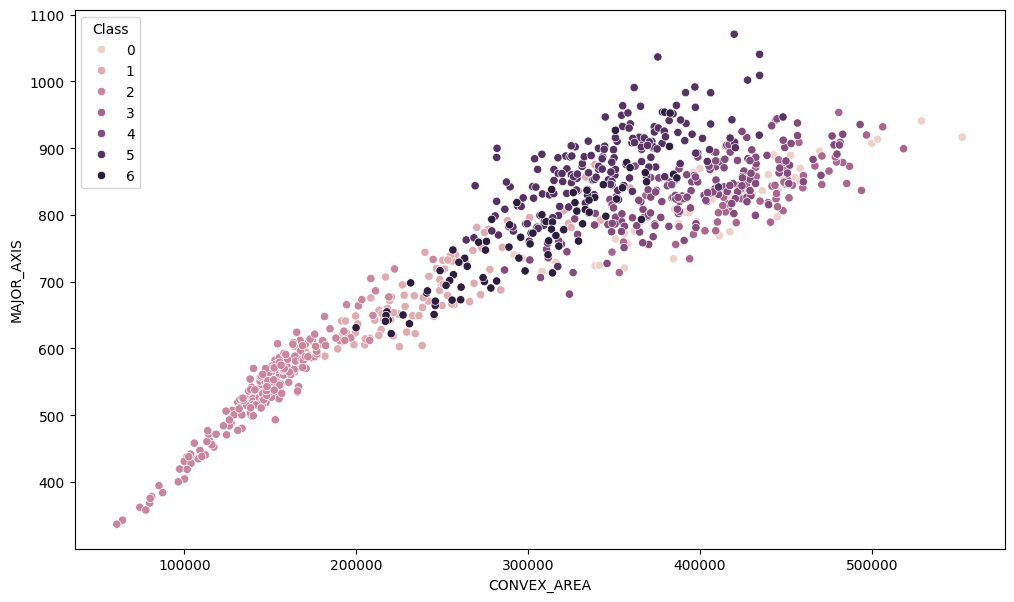

In [50]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="CONVEX_AREA" , y="MAJOR_AXIS", hue='Class', data= date_fruit)

convex area vs perimeter

<Axes: xlabel='CONVEX_AREA', ylabel='PERIMETER'>

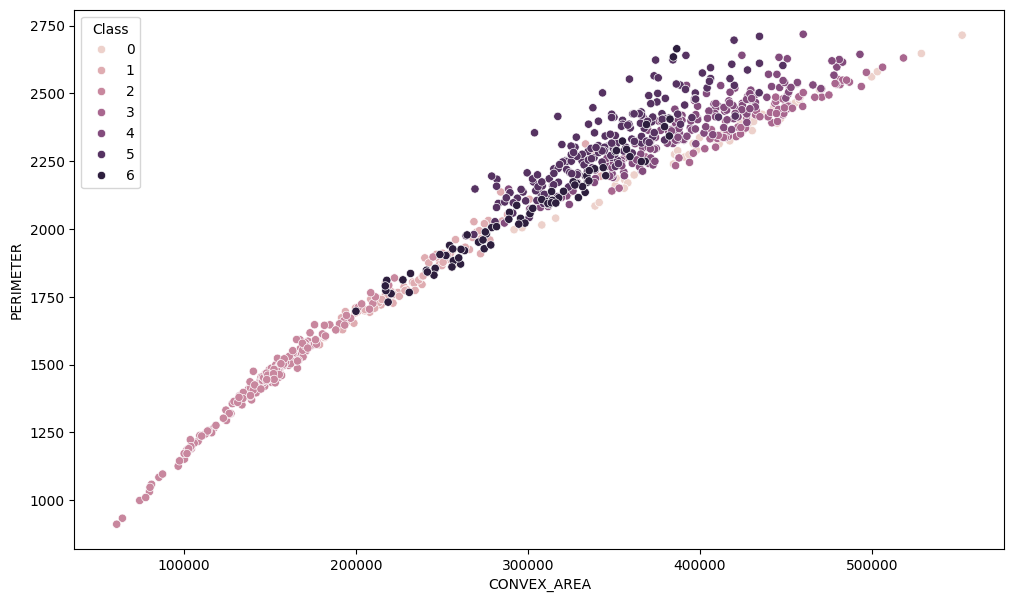

In [51]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="CONVEX_AREA" , y="PERIMETER", hue='Class', data= date_fruit)

Conclusion:-
1.normalization required.
2.scaling required.
3.feature removal required to control multicollinearity
4.outliers removal required.


6.check  target class is Imbalance or not

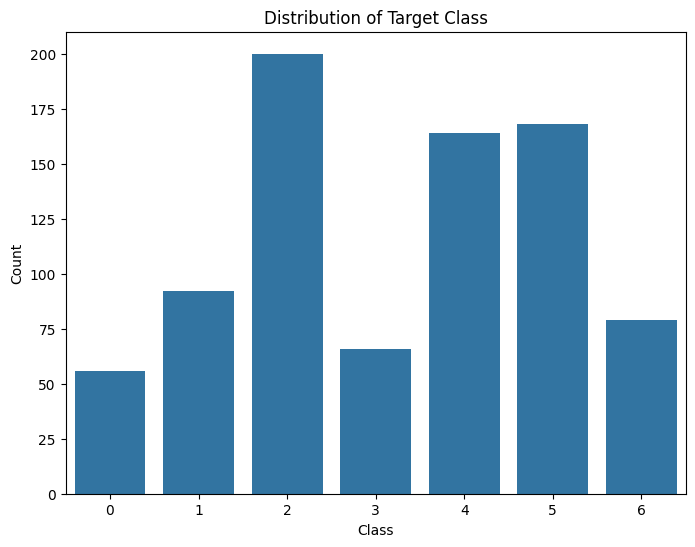

Class Distribution:
Class
2    200
5    168
4    164
1     92
6     79
3     66
0     56
Name: count, dtype: int64


In [52]:
class_distribution = date_fruit['Class'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=date_fruit)
plt.title('Distribution of Target Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

print("Class Distribution:")
print(class_distribution)

THis class is imbalance.this will automatically handled by catboost,xgboost,lightgbm or we will do it before manually it depends on results.

In [53]:
date_fruit.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')

In [54]:
date_fruits1=date_fruit[['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1','SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRB', 'SkewRR', 'SkewRG','SkewRB',"EntropyRR",'KurtosisRR', 'KurtosisRG', 'EntropyRG', 'ALLdaub4RR', 'Class']]

In [55]:
from sklearn.model_selection import train_test_split


X = date_fruits1.drop(columns=['Class'])  
y = date_fruits1['Class']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)



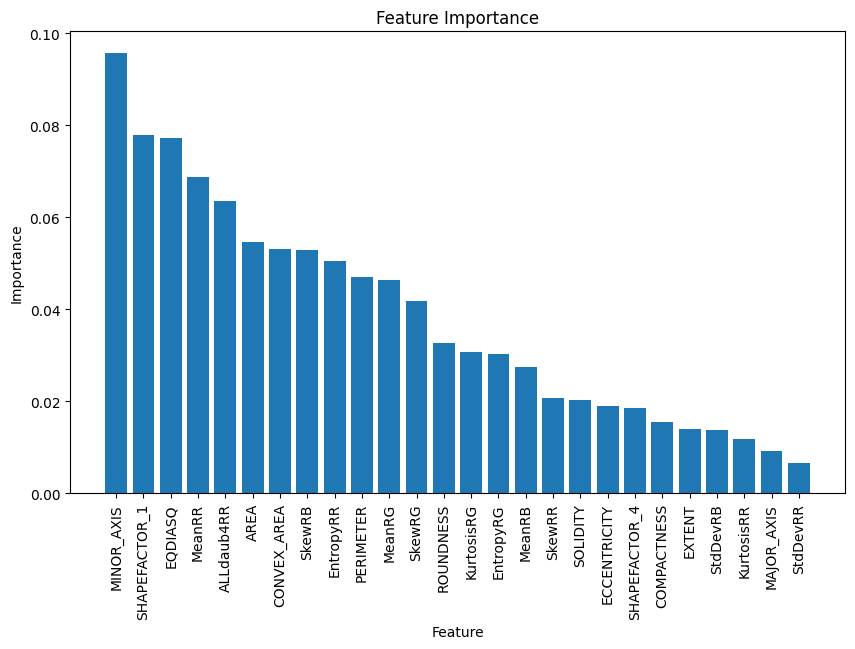

In [56]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
feature_importances = rf_classifier.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
feature_names = X_train.columns
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [57]:
y_pred = rf_classifier.predict(X_test)

In [58]:
from sklearn.metrics import classification_report
accuracy = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy:               precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       1.00      0.61      0.76        18
           2       0.95      1.00      0.98        40
           3       0.86      0.92      0.89        13
           4       0.97      1.00      0.99        33
           5       1.00      0.97      0.99        34
           6       0.68      0.94      0.79        16

    accuracy                           0.92       165
   macro avg       0.91      0.88      0.88       165
weighted avg       0.93      0.92      0.92       165



In [59]:
y_pred_=rf_classifier.predict(X_train)

In [60]:
accuracy_ = classification_report(y_train, y_pred_)
print("Accuracy:", accuracy_)

Accuracy:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        74
           2       1.00      1.00      1.00       160
           3       1.00      1.00      1.00        53
           4       1.00      1.00      1.00       131
           5       1.00      1.00      1.00       134
           6       1.00      1.00      1.00        63

    accuracy                           1.00       660
   macro avg       1.00      1.00      1.00       660
weighted avg       1.00      1.00      1.00       660



saving data to csv file

In [61]:
date_fruits1.to_csv('date_fruits1.csv', index=False)

<Figure size 1000x600 with 0 Axes>

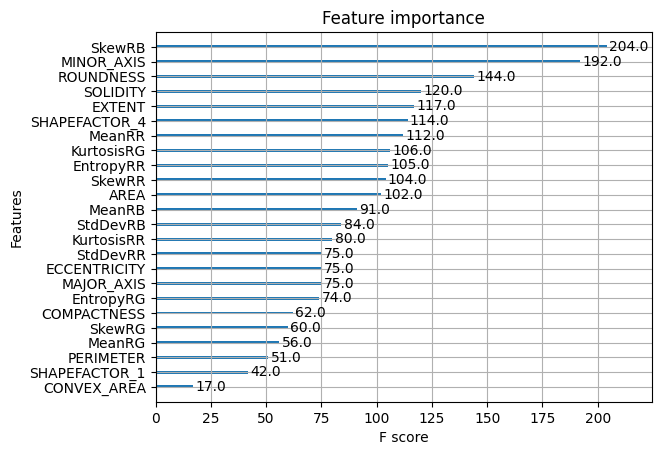

In [62]:
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
xgb_classifier = xgb.XGBClassifier(random_state=42)  
xgb_classifier.fit(X_train, y_train)
plt.figure(figsize=(10, 6))
plot_importance(xgb_classifier)  
plt.show()


In [63]:
y_pred2 = xgb_classifier.predict(X_test)
y_pred2_=xgb_classifier.predict(X_train)

In [64]:
accuracy2 = classification_report(y_test, y_pred2)
print("Accuracy:", accuracy2)
accuracy2_ = classification_report(y_train, y_pred2_)
print("Accuracy:", accuracy2_)

Accuracy:               precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.75      0.67      0.71        18
           2       0.93      0.97      0.95        40
           3       0.92      0.85      0.88        13
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        34
           6       0.76      0.81      0.79        16

    accuracy                           0.92       165
   macro avg       0.90      0.89      0.89       165
weighted avg       0.92      0.92      0.92       165

Accuracy:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        74
           2       1.00      1.00      1.00       160
           3       1.00      1.00      1.00        53
           4       1.00      1.00      1.00       131
           5       1.00      1.00      1.00       134
    

In [65]:
newdataset=pd.read_csv("date_fruits1.csv")

In [66]:
newdataset.head()

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0  422163   2378.908    837.8484    645.6693        0.6373  733.1539   
1  338136   2085.144    723.8198    595.2073        0.5690  656.1464   
2  526843   2647.394    940.7379    715.3638        0.6494  819.0222   
3  416063   2351.210    827.9804    645.2988        0.6266  727.8378   
4  347562   2160.354    763.9877    582.8359        0.6465  665.2291   

   SOLIDITY  CONVEX_AREA  EXTENT  ROUNDNESS  ...  StdDevRB  SkewRR  SkewRG  \
0    0.9947     424428.0  0.7831     0.9374  ...   30.1230 -0.5661 -0.0114   
1    0.9974     339014.0  0.7795     0.9773  ...   28.1229 -0.2328  0.1349   
2    0.9962     528876.0  0.7657     0.9446  ...   33.9053 -0.7152 -0.1059   
3    0.9948     418255.0  0.7759     0.9458  ...   30.3955  0.4584  1.2917   
4    0.9908     350797.0  0.7569     0.9358  ...   27.1741 -0.3552  0.2101   

   SkewRB    EntropyRR  KurtosisRR  KurtosisRG    EntropyRG  ALLdaub4RR  Class  
0  0.6019 -59191263232      3.2370      2.9574 -50714214400     58.7255      0  
1  0.4134 -34233065472      2.6228      2.6350 -37462601728     50.0259      0  
2  0.9183 -93948354560      3.7516      3.8611 -74738221056     65.4772      0  
3  1.8028 -32074307584      5.0401      8.6136 -32060925952     43.3900      0  
4  0.8865 -39980974080      2.7016      2.9761 -35980042240     52.7743      0  

[5 rows x 27 columns]

In [67]:
corr1=newdataset.corr()

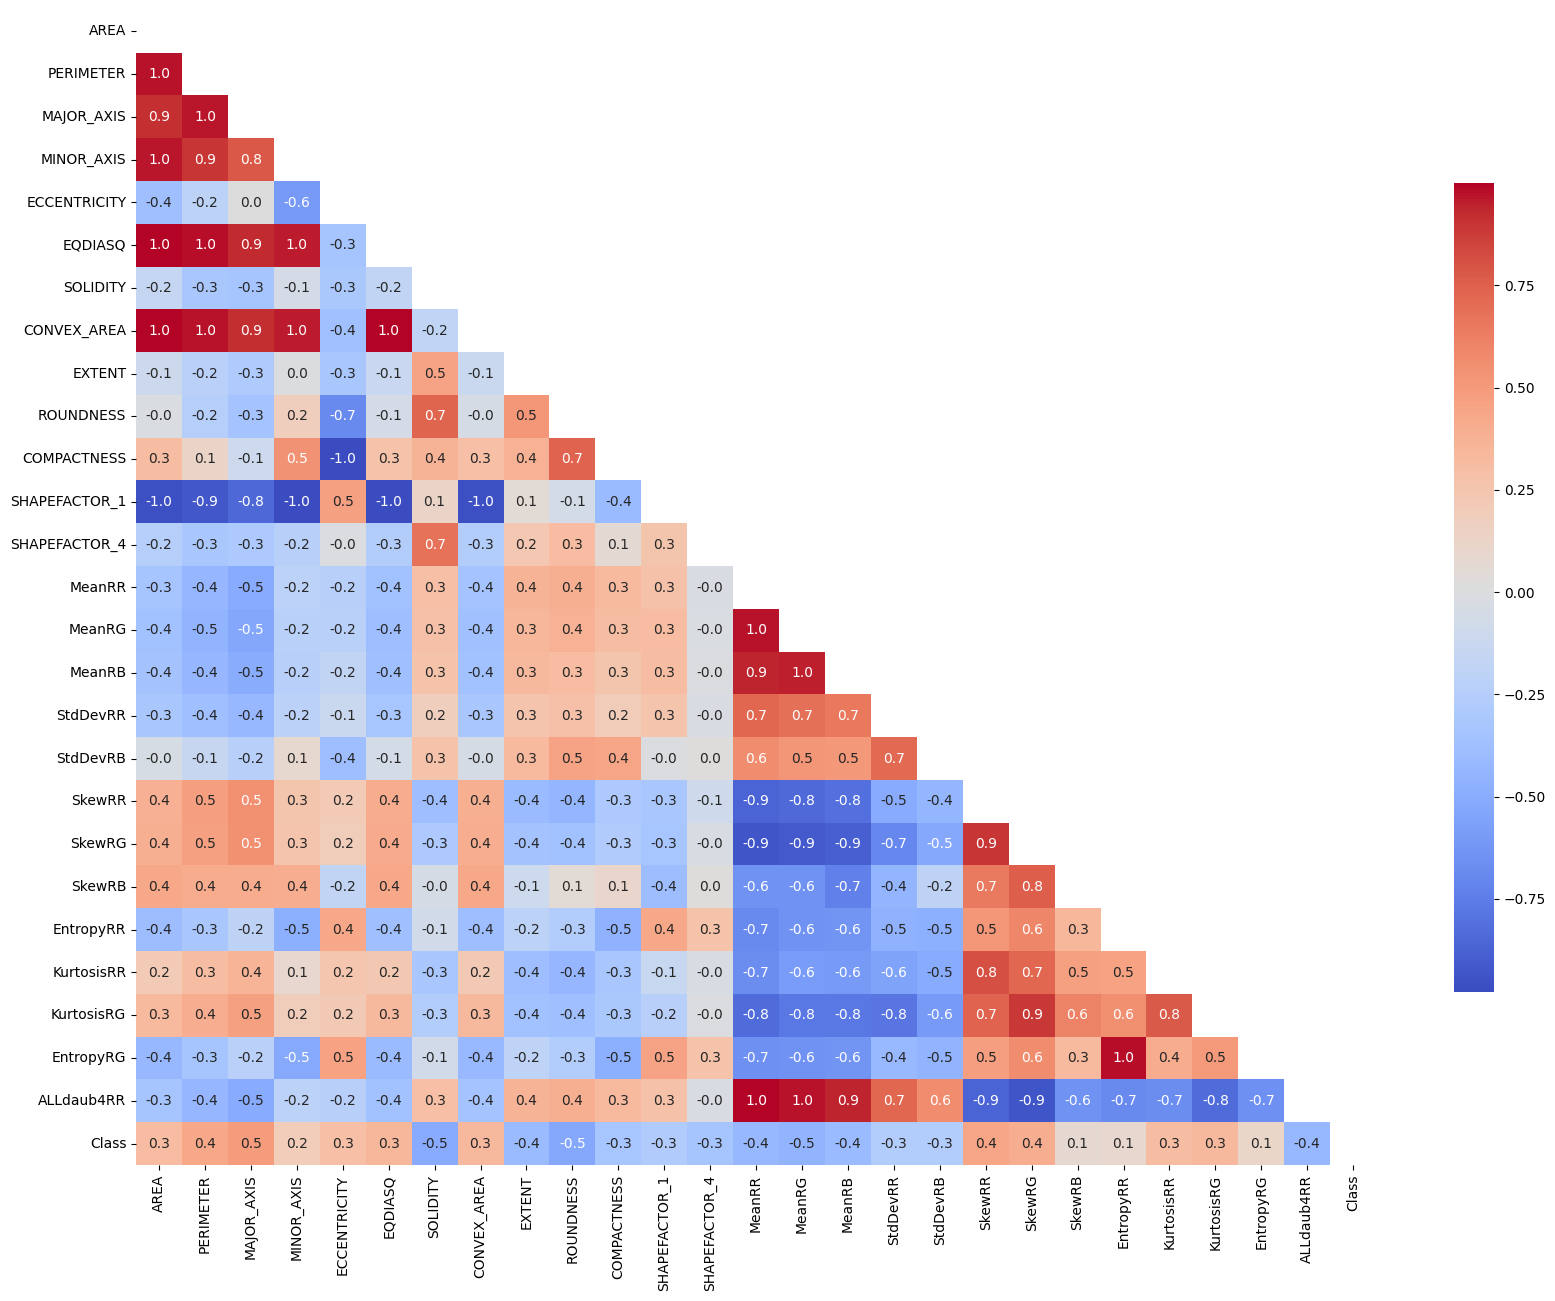

In [68]:
mask = np.triu(np.ones_like(corr1, dtype=bool))
plt.figure(figsize=(20, 15))
sns.heatmap(corr1, mask=mask, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'shrink': .7})

plt.show()

In [69]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.fit(X_train, y_train)

Learning rate set to 0.077468
0:	learn: 1.7260911	total: 66.4ms	remaining: 1m 6s
1:	learn: 1.5893062	total: 74.8ms	remaining: 37.3s
2:	learn: 1.4553405	total: 82.6ms	remaining: 27.4s
3:	learn: 1.3453929	total: 94.1ms	remaining: 23.4s
4:	learn: 1.2565049	total: 110ms	remaining: 21.9s
5:	learn: 1.1887280	total: 132ms	remaining: 21.8s
6:	learn: 1.1188692	total: 151ms	remaining: 21.4s
7:	learn: 1.0521167	total: 179ms	remaining: 22.3s
8:	learn: 0.9978427	total: 192ms	remaining: 21.1s
9:	learn: 0.9444219	total: 198ms	remaining: 19.6s
10:	learn: 0.8999316	total: 211ms	remaining: 19s
11:	learn: 0.8654444	total: 219ms	remaining: 18s
12:	learn: 0.8254175	total: 224ms	remaining: 17s
13:	learn: 0.7887616	total: 229ms	remaining: 16.2s
14:	learn: 0.7558085	total: 235ms	remaining: 15.5s
15:	learn: 0.7252626	total: 242ms	remaining: 14.9s
16:	learn: 0.6980051	total: 247ms	remaining: 14.3s
17:	learn: 0.6725132	total: 253ms	remaining: 13.8s
18:	learn: 0.6494378	total: 259ms	remaining: 13.4s
19:	learn: 0.

In [70]:
y_pred_cat = model.predict(X_test)


In [71]:
print(classification_report(y_pred_cat,y_test))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.67      0.92      0.77        13
           2       1.00      0.93      0.96        43
           3       0.92      0.92      0.92        13
           4       1.00      0.97      0.99        34
           5       1.00      1.00      1.00        34
           6       0.88      0.82      0.85        17

    accuracy                           0.94       165
   macro avg       0.91      0.93      0.91       165
weighted avg       0.95      0.94      0.94       165

